In [15]:
# Importing required libraries
import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam
from keras_visualizer import visualizer
from keras.callbacks import Callback
from keras.utils import to_categorical

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix
import pandas as pd

In [3]:
class LivePlot(Callback):
    def __init__(self):
        super(LivePlot, self).__init__()
        self.batch_count = 0
        self.epoch_count = 0
        self.batch_x = []
        self.epoch_x = []
        self.batch_acc = []
        self.batch_loss = []  # List for batch loss
        self.epoch_acc = []
        self.epoch_loss = []  # List for epoch loss
        self.epoch_val_acc = []
        self.epoch_val_loss = []

    def on_batch_end(self, batch, logs=None):
        self.batch_x.append(self.batch_count)
        self.batch_acc.append(logs['accuracy'])
        self.batch_loss.append(logs['loss'])  # Store batch loss
        self.batch_count += 1
        if self.to_plot():
            self.update_batch_plot()

    def update_batch_plot(self):
        plt.figure(figsize=(12, 6))

        plt.subplot(1, 2, 2)
        plt.plot(self.batch_x, self.batch_acc, label="accuracy")
        plt.title('Batch Accuracy')
        plt.xlabel('Batch')
        plt.ylabel('Accuracy')
        plt.legend()

        plt.subplot(1, 2, 1)
        plt.plot(self.batch_x, self.batch_loss, label="loss")  # Plot batch loss
        plt.title('Batch Loss')
        plt.xlabel('Batch')
        plt.ylabel('Loss')
        plt.legend()

        plt.show()

    def on_epoch_end(self, epoch, logs=None):
        self.batch_count = 0
        self.batch_x = []
        self.batch_acc = []
        self.batch_loss = []  # Clear batch loss for each epoch
        self.epoch_x.append(epoch)
        self.epoch_acc.append(logs['accuracy'])
        self.epoch_loss.append(logs['loss'])  # Store epoch loss
        self.epoch_val_acc.append(logs['val_accuracy'])
        self.epoch_val_loss.append(logs['val_loss'])
        self.update_epoch_plot()

    def update_epoch_plot(self):
        plt.figure(figsize=(12, 6))

        plt.subplot(1, 2, 2)
        plt.plot(self.epoch_x, self.epoch_acc, label="accuracy")
        plt.plot(self.epoch_x, self.epoch_val_acc, label="val_accuracy")
        plt.title('Epoch Accuracy')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.legend()

        plt.subplot(1, 2, 1)
        plt.plot(self.epoch_x, self.epoch_loss, label="loss")  # Plot epoch loss
        plt.plot(self.epoch_x, self.epoch_val_loss, label="val_loss")
        plt.title('Epoch Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()

        plt.show()

    def to_plot(self):
        number = self.batch_count

        while number / 10 > 1:
            number /= 10

        return number % 1 == 0


plot_losses = LivePlot()

In [4]:
# Loading the Fashion-MNIST dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [5]:
# Reshape the images
# we want our images to be one channel and 28x28. Reshape them like in mnist, but before you do,
# use train_images.shape to see what they were originally

# Normalizing pixel values between 0 and 1 by dividing by 255

# One-hot encoding the labels
num_classes = 10

In [1]:
# Building the ConvNet model
model = Sequential()
# model.add a Conv2D layer. The arguments, in order:
#    32: the number of ouput channels (remember that vgg16 went from 224x224x3 to 224x224x64? 64 is the number of output channels in that example
#    (3, 3): the size of the kernel
#    activation="relu"
#    input_shape=(28,28,1)
# add a MaxPoolingLayer
#    (2, 2): the size of the kernel to average
# add another conv layer. this time we want 64 output channels. Same kernel size and activation. We don't need another input_size
# add another max pooling like the last one
# add another conv layer like the last one

# Adding ~~Dense layers on top~~ the juge layers
# add a Flatten layer. No arguments. This will flatten it out to a 1d vector
# add a Dense layer. 64 channels, activation is relu
# now we need our probability distribution. Add another Dense layer. The number of channels is the number of classes. Activation is softmax

# Compiling the model
model.compile(optimizer=Adam(),
              loss=categorical_crossentropy,
              metrics=['accuracy'])

NameError: name 'Sequential' is not defined

In [7]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

Epoch 1/5


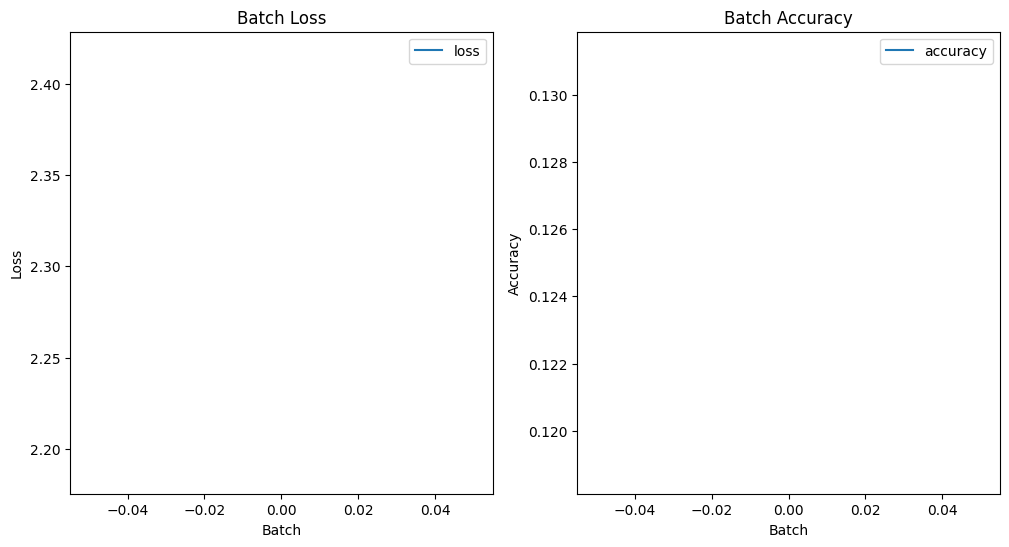

   1/1875 [..............................] - ETA: 36:56 - loss: 2.3020 - accuracy: 0.1250

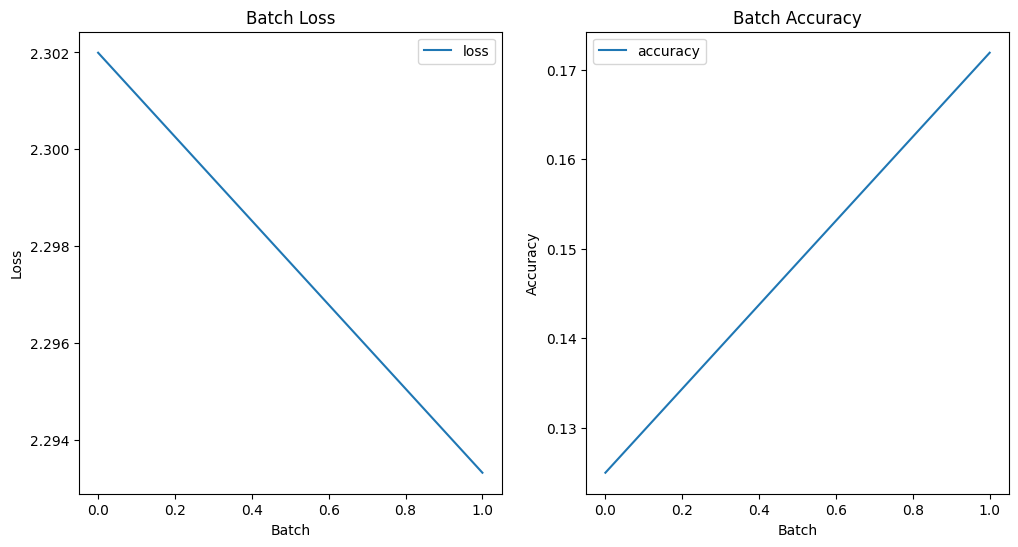

   2/1875 [..............................] - ETA: 15:07 - loss: 2.2933 - accuracy: 0.1719

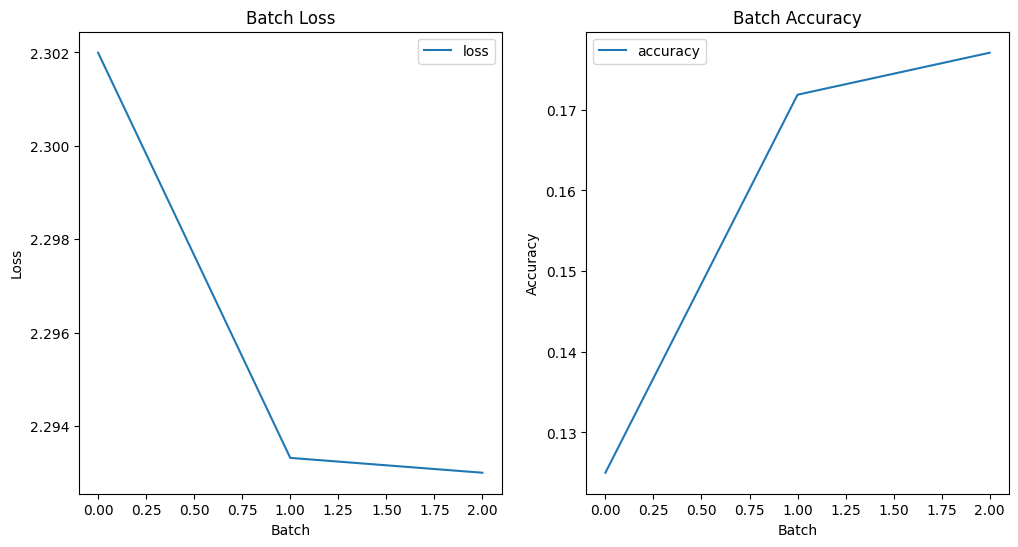

   3/1875 [..............................] - ETA: 15:36 - loss: 2.2930 - accuracy: 0.1771

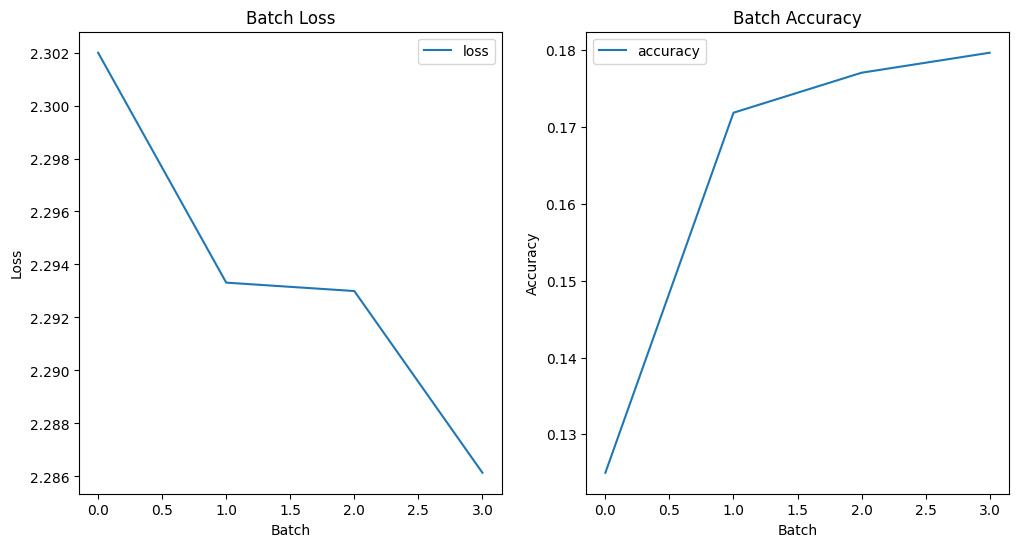

   4/1875 [..............................] - ETA: 16:14 - loss: 2.2861 - accuracy: 0.1797

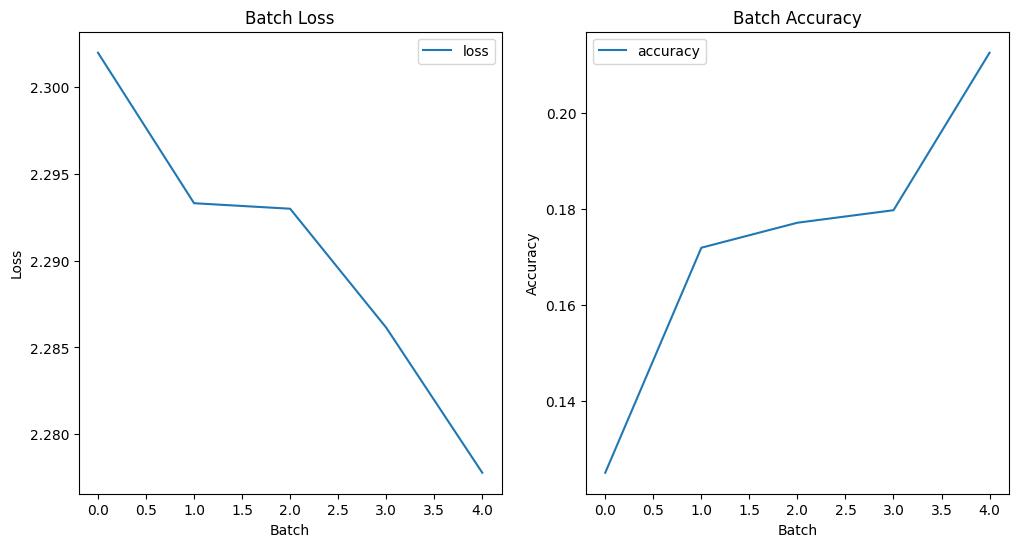

   5/1875 [..............................] - ETA: 16:21 - loss: 2.2778 - accuracy: 0.2125

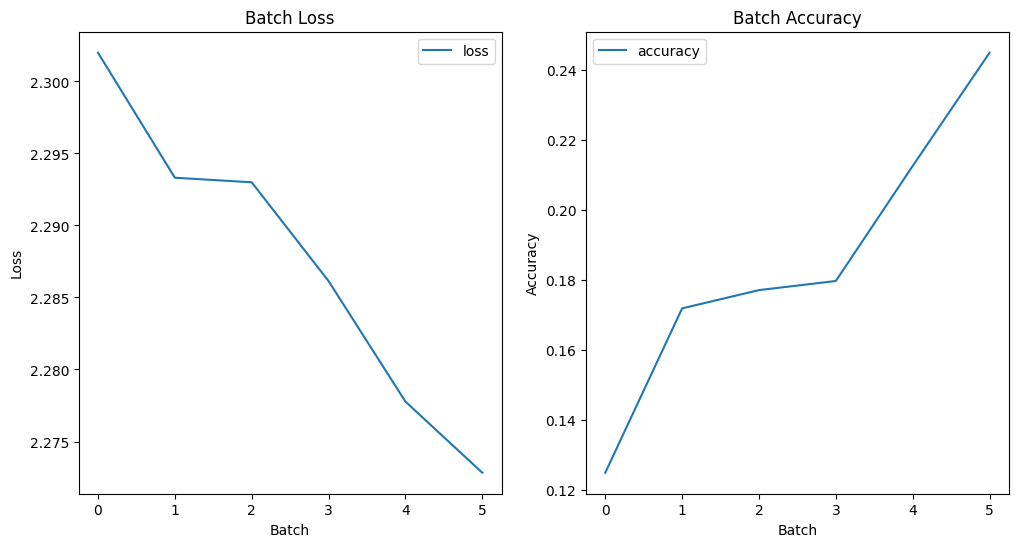

   6/1875 [..............................] - ETA: 16:35 - loss: 2.2728 - accuracy: 0.2448

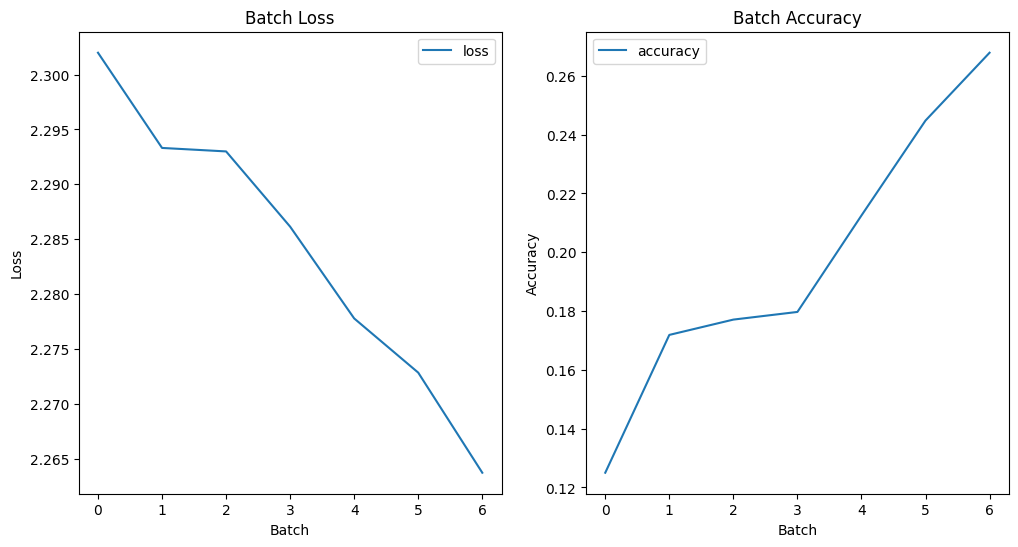

   7/1875 [..............................] - ETA: 17:57 - loss: 2.2637 - accuracy: 0.2679

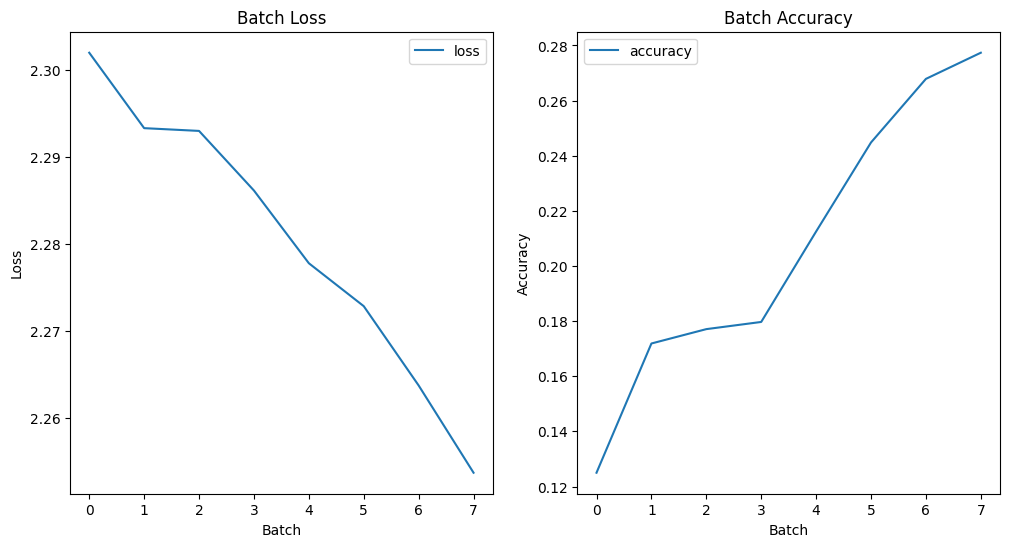

   8/1875 [..............................] - ETA: 17:51 - loss: 2.2537 - accuracy: 0.2773

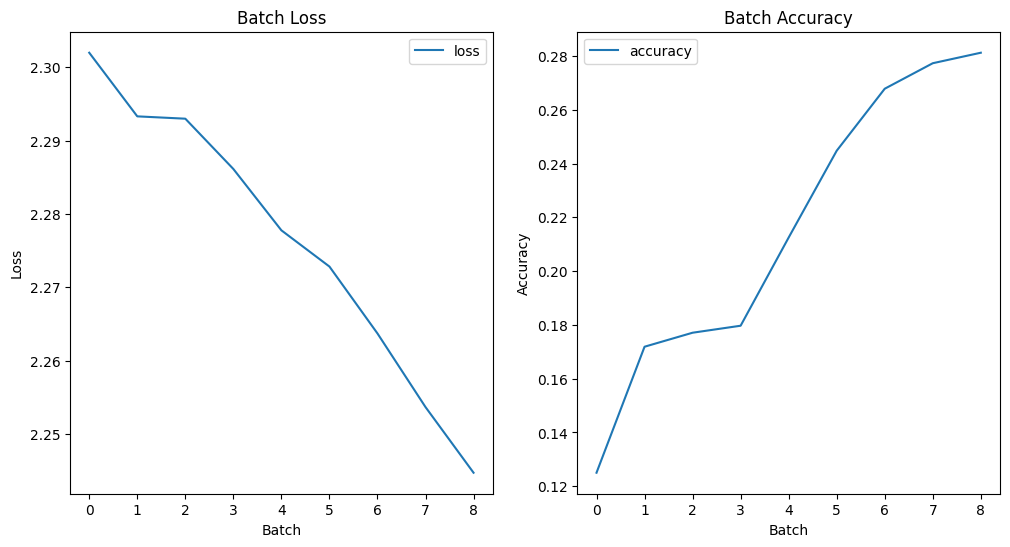

   9/1875 [..............................] - ETA: 17:50 - loss: 2.2447 - accuracy: 0.2812

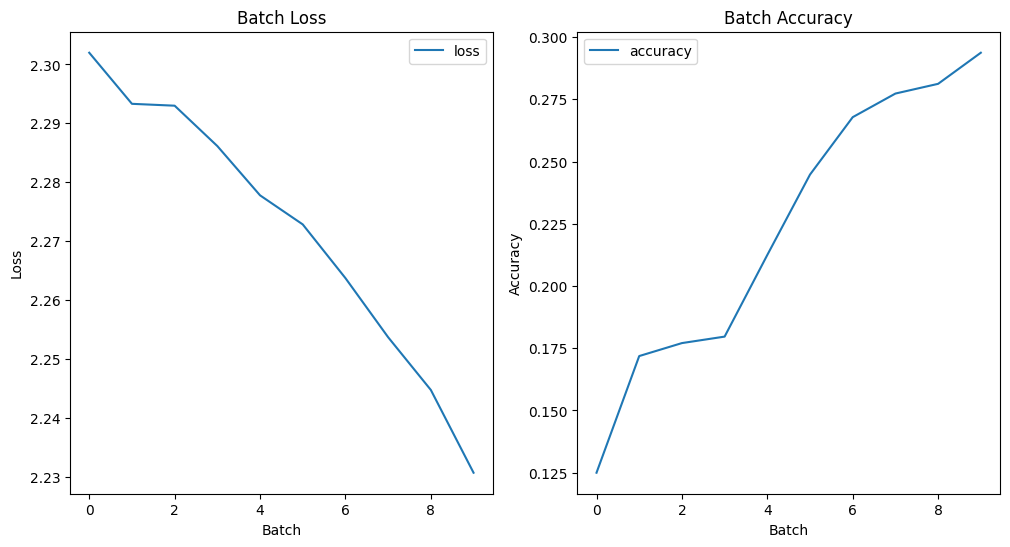

  18/1875 [..............................] - ETA: 9:52 - loss: 2.0888 - accuracy: 0.3403 

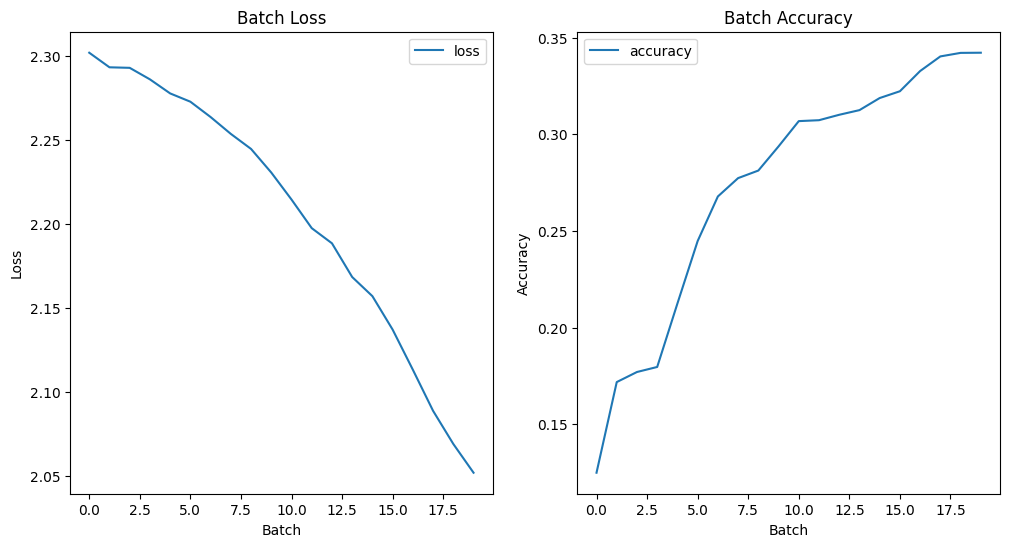

  29/1875 [..............................] - ETA: 7:02 - loss: 1.8458 - accuracy: 0.3922

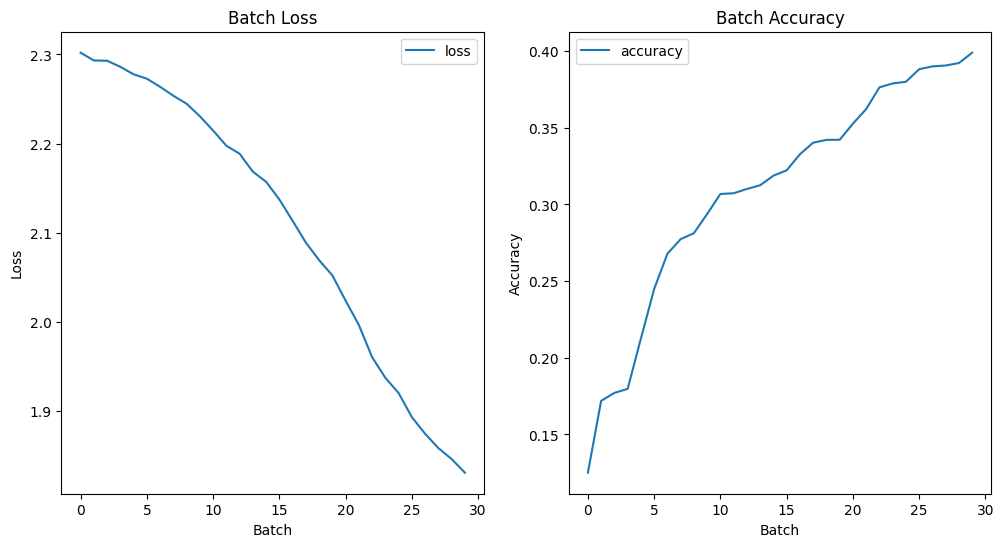

  39/1875 [..............................] - ETA: 6:13 - loss: 1.6739 - accuracy: 0.4431

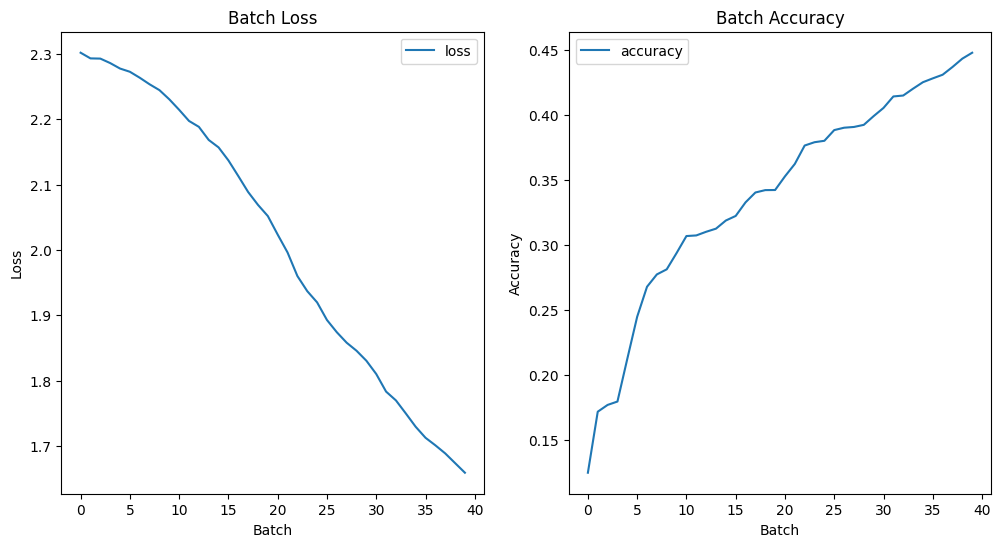

  49/1875 [..............................] - ETA: 5:46 - loss: 1.5554 - accuracy: 0.4796

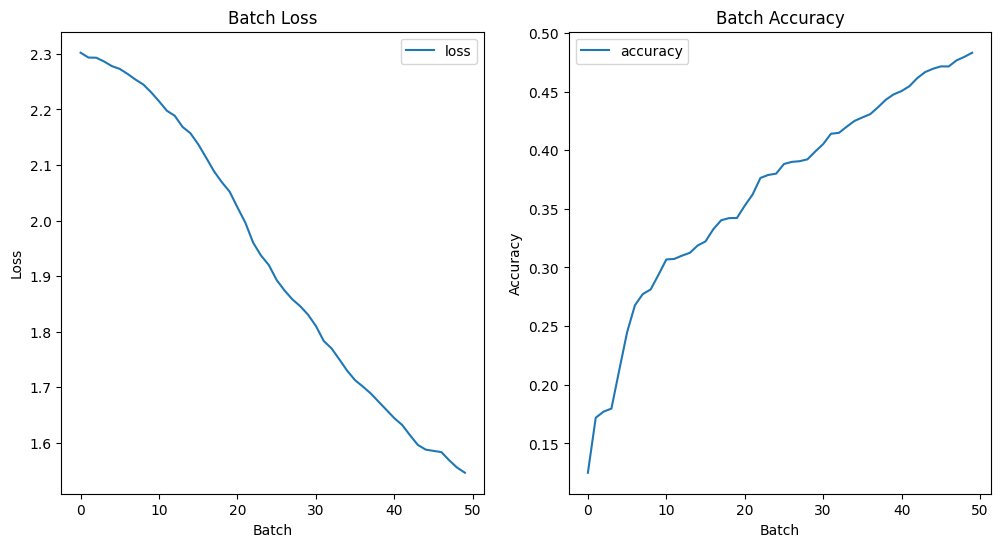

  59/1875 [..............................] - ETA: 5:28 - loss: 1.4543 - accuracy: 0.5085

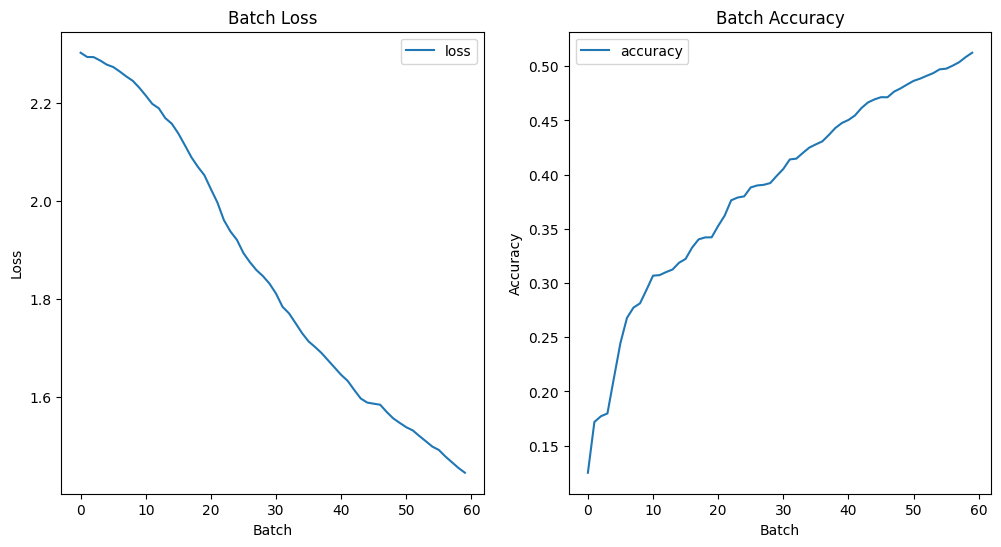

  68/1875 [>.............................] - ETA: 5:19 - loss: 1.3674 - accuracy: 0.5409

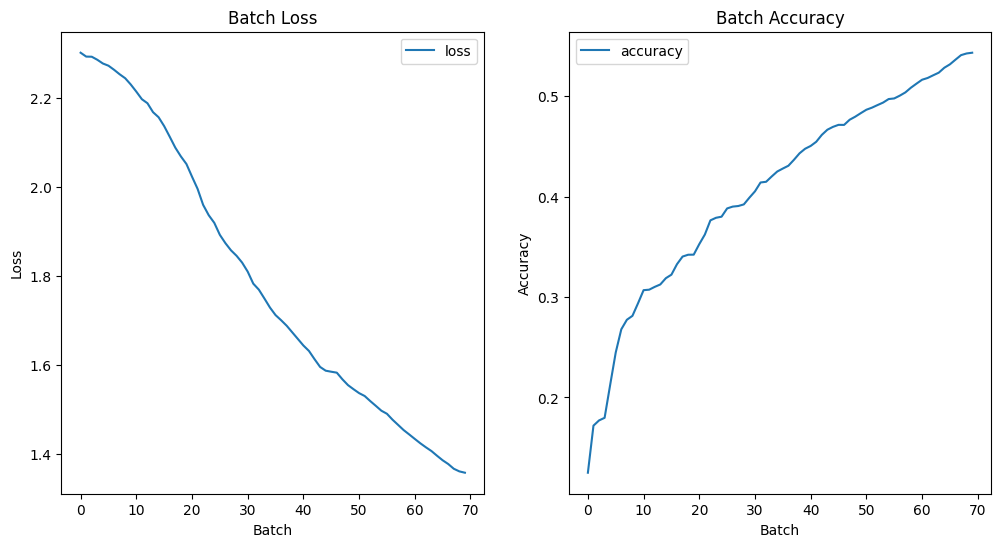

  78/1875 [>.............................] - ETA: 4:57 - loss: 1.3088 - accuracy: 0.5569

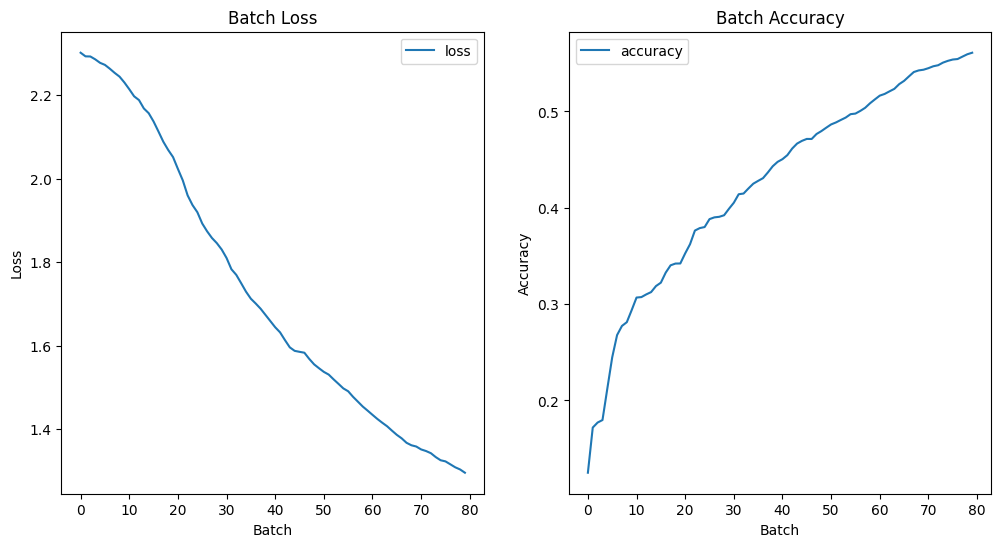

  89/1875 [>.............................] - ETA: 4:39 - loss: 1.2506 - accuracy: 0.5748

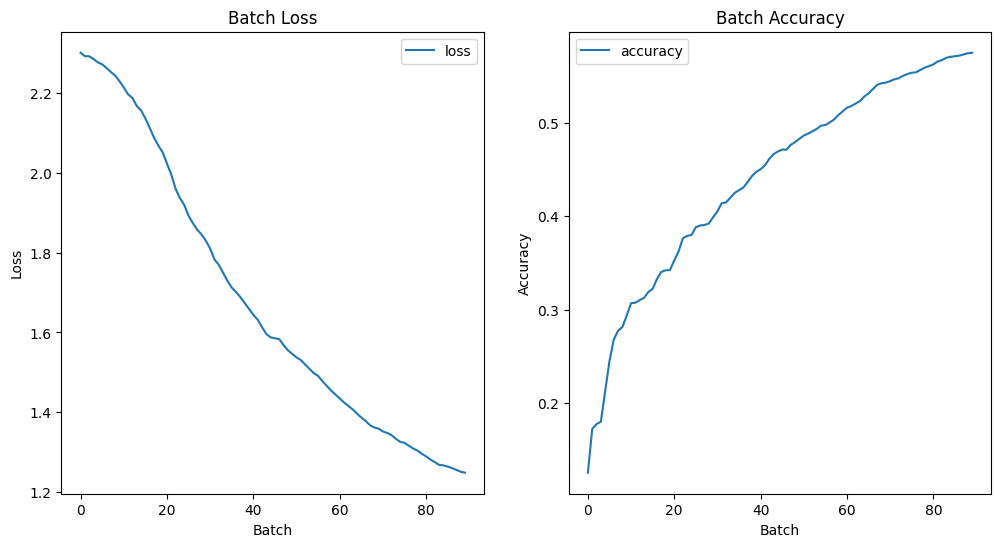

  99/1875 [>.............................] - ETA: 4:26 - loss: 1.2026 - accuracy: 0.5900

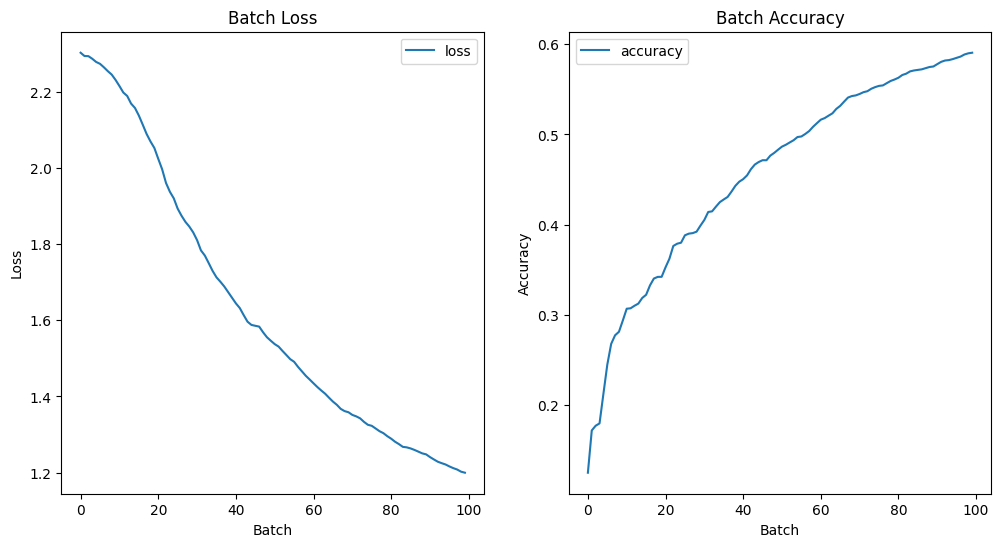

 198/1875 [==>...........................] - ETA: 2:43 - loss: 0.9485 - accuracy: 0.6638

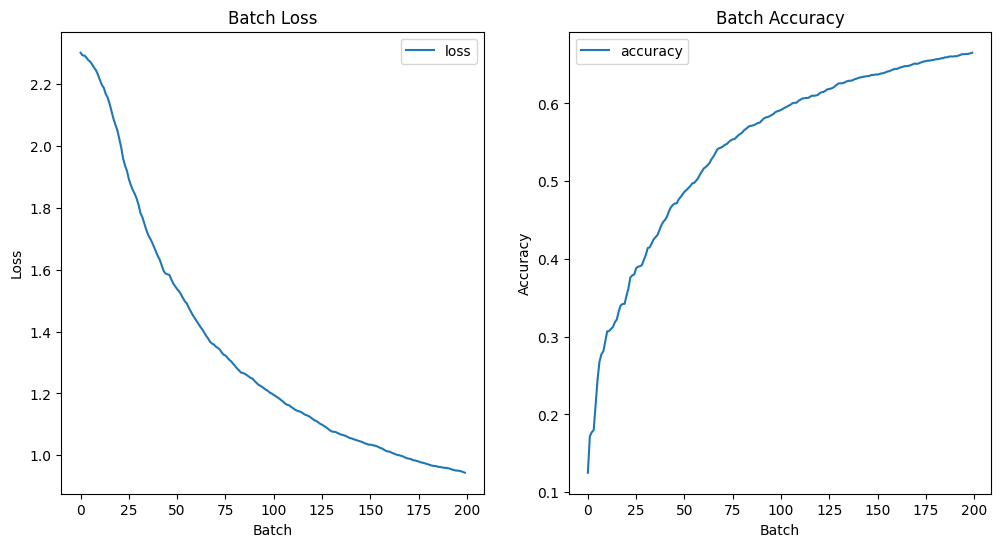

 299/1875 [===>..........................] - ETA: 2:10 - loss: 0.8336 - accuracy: 0.6989

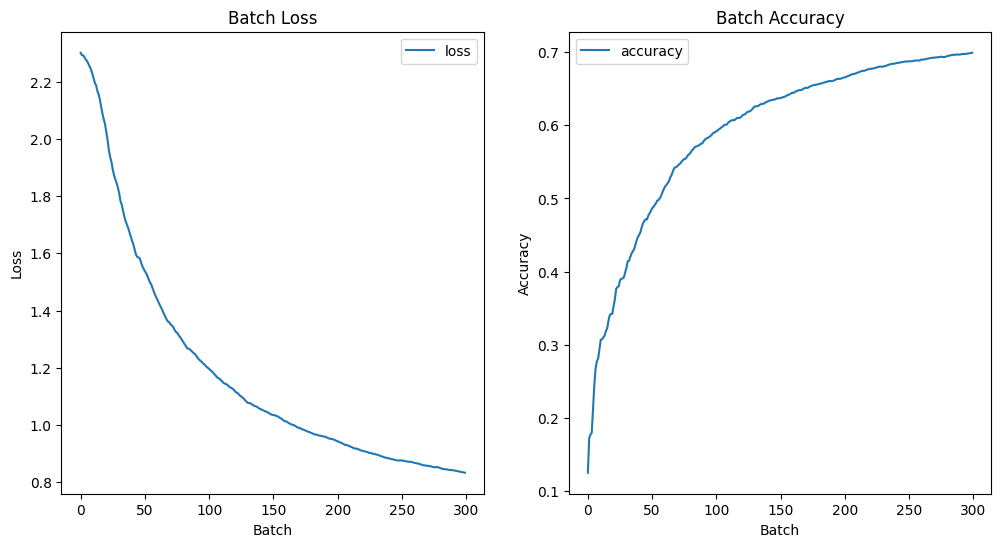

 398/1875 [=====>........................] - ETA: 1:55 - loss: 0.7623 - accuracy: 0.7208

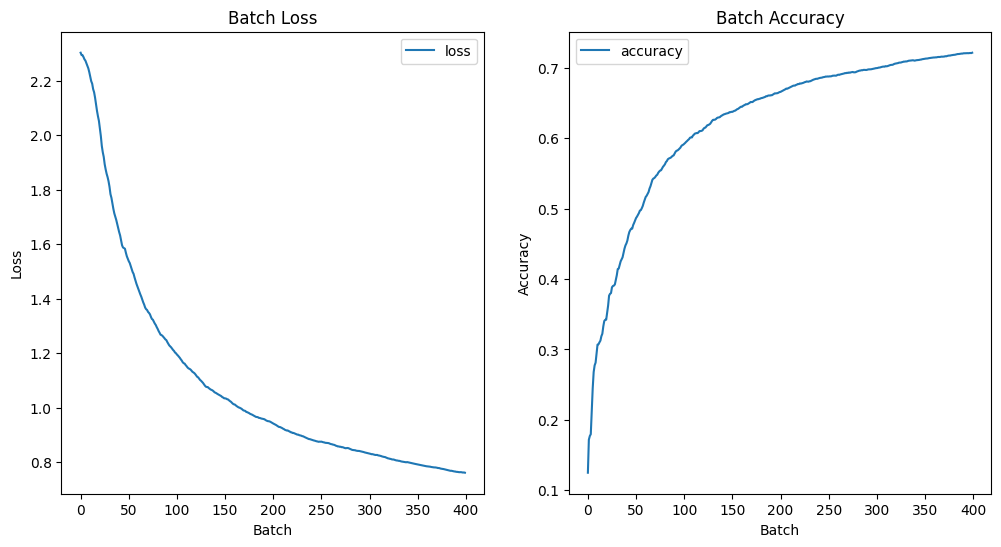

 499/1875 [======>.......................] - ETA: 1:41 - loss: 0.7147 - accuracy: 0.7380

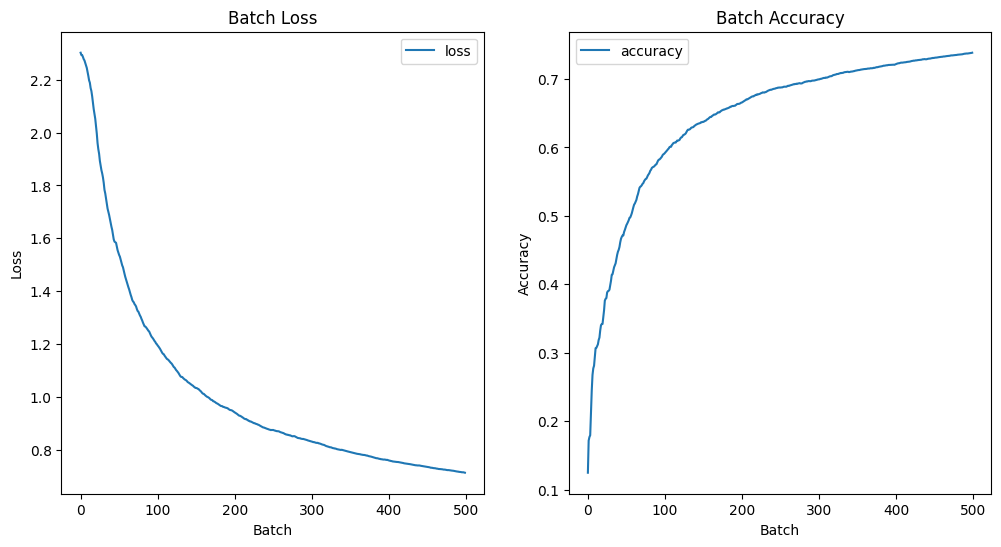

 599/1875 [========>.....................] - ETA: 1:28 - loss: 0.6801 - accuracy: 0.7506

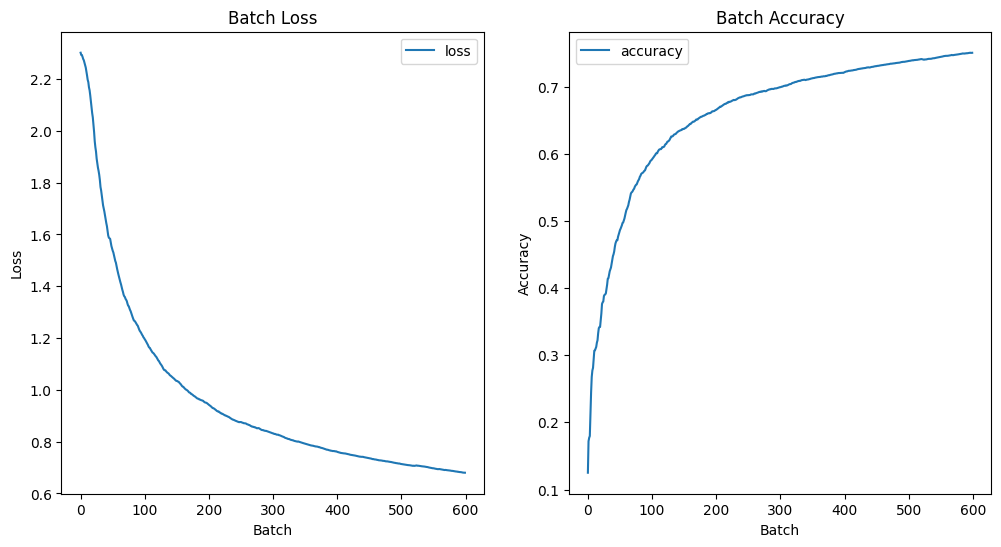

 699/1875 [==========>...................] - ETA: 1:22 - loss: 0.6466 - accuracy: 0.7624

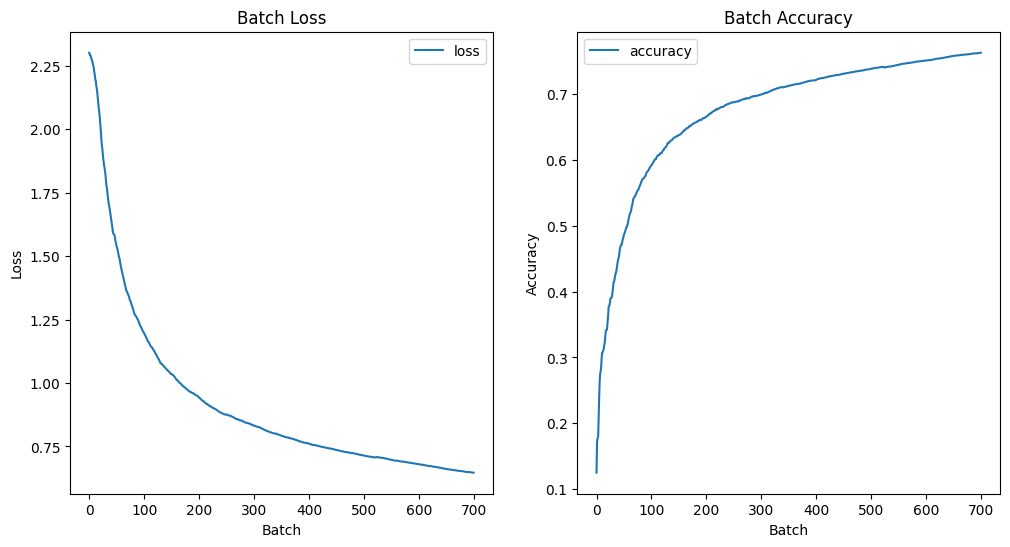

 799/1875 [===========>..................] - ETA: 1:12 - loss: 0.6224 - accuracy: 0.7713

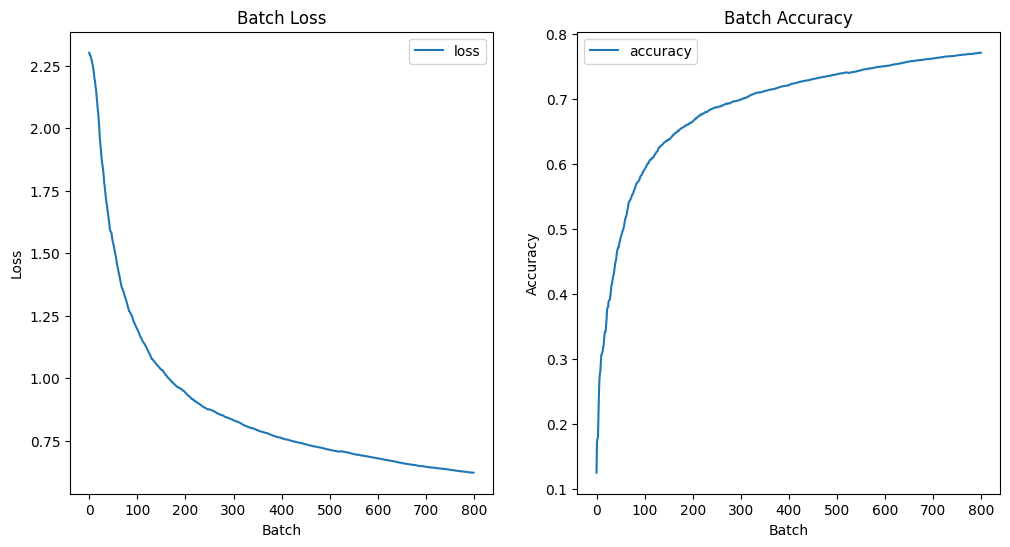

 899/1875 [=============>................] - ETA: 1:03 - loss: 0.6043 - accuracy: 0.7784

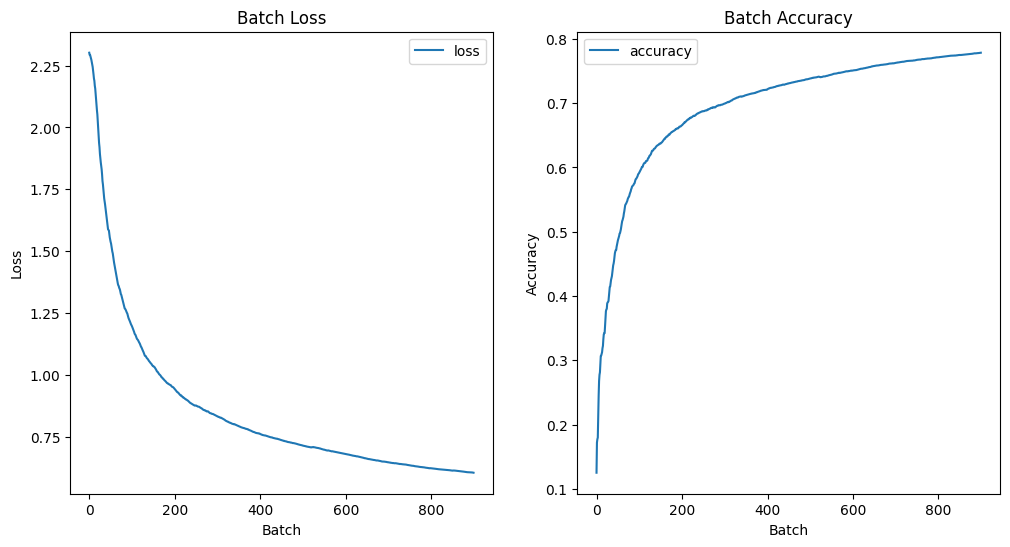

 999/1875 [==============>...............] - ETA: 57s - loss: 0.5884 - accuracy: 0.7835

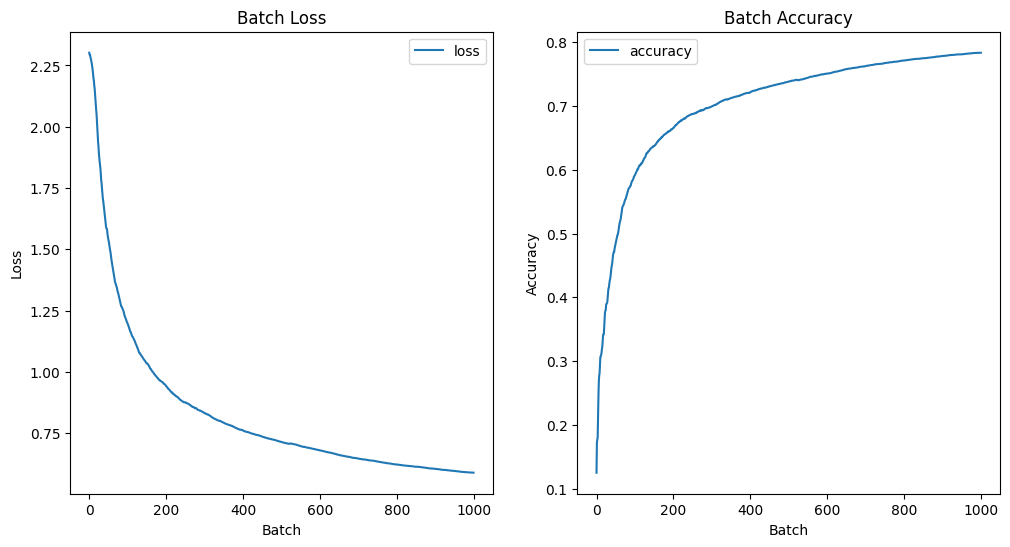

1875/1875 [==============================] - ETA: 0s - loss: 0.4912 - accuracy: 0.8208

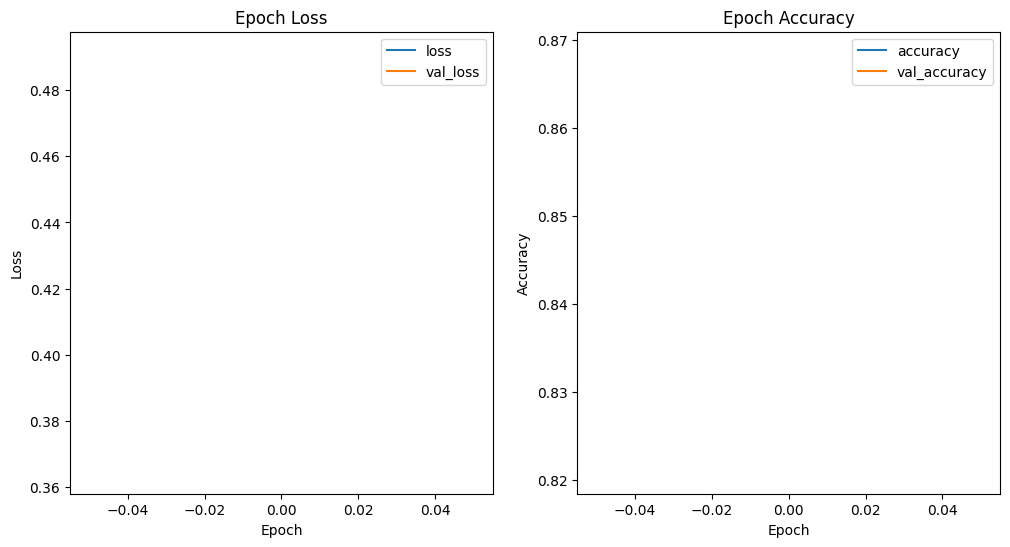

1875/1875 [==============================] - 120s 63ms/step - loss: 0.4912 - accuracy: 0.8208 - val_loss: 0.3644 - val_accuracy: 0.8685
Epoch 2/5


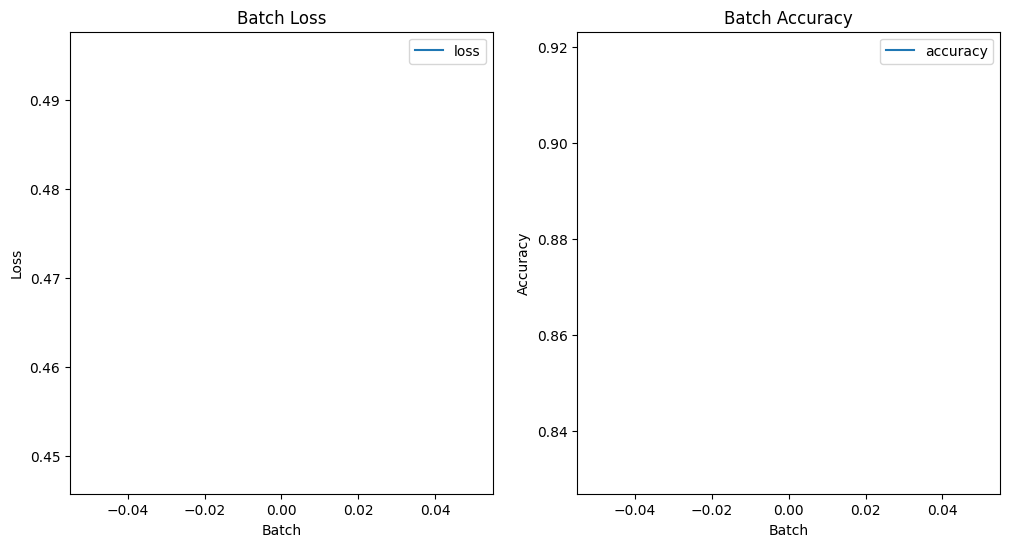

   1/1875 [..............................] - ETA: 15:10 - loss: 0.4717 - accuracy: 0.8750

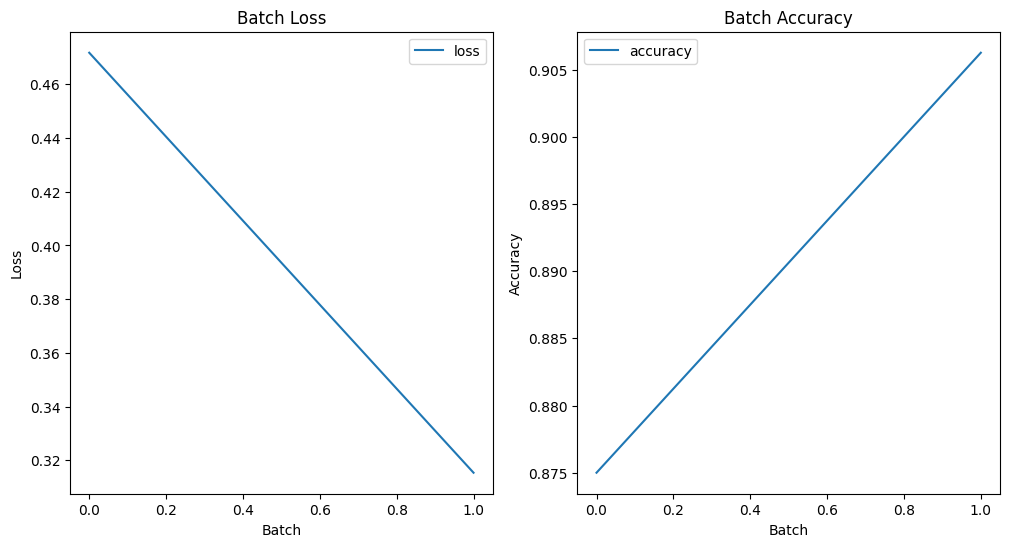

   2/1875 [..............................] - ETA: 16:02 - loss: 0.3154 - accuracy: 0.9062

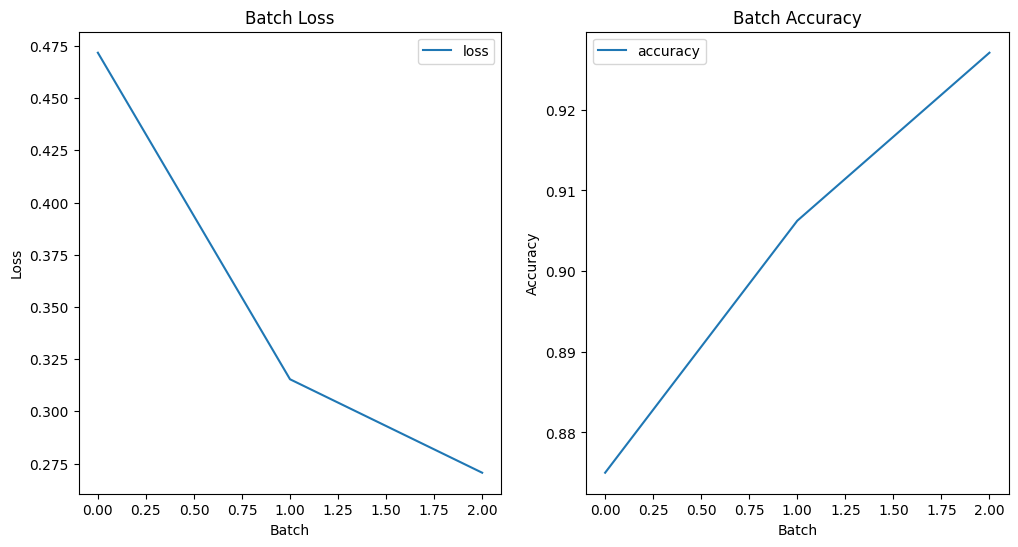

   3/1875 [..............................] - ETA: 16:35 - loss: 0.2706 - accuracy: 0.9271

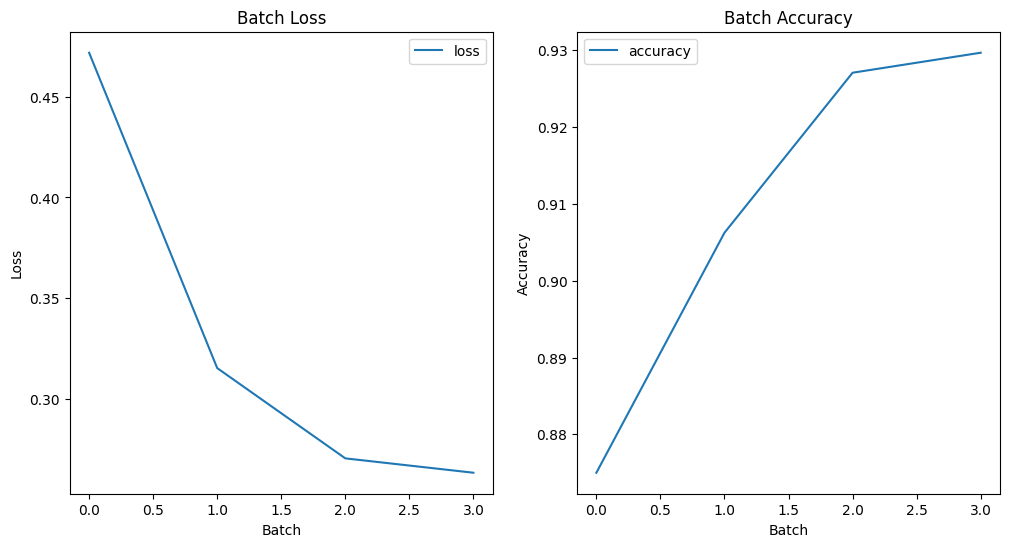

   4/1875 [..............................] - ETA: 16:20 - loss: 0.2635 - accuracy: 0.9297

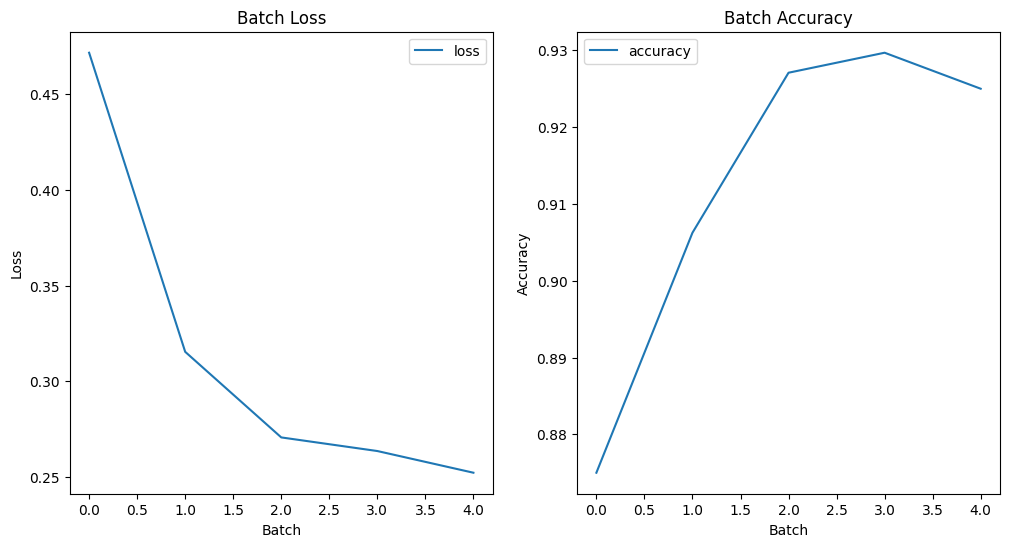

   5/1875 [..............................] - ETA: 16:22 - loss: 0.2522 - accuracy: 0.9250

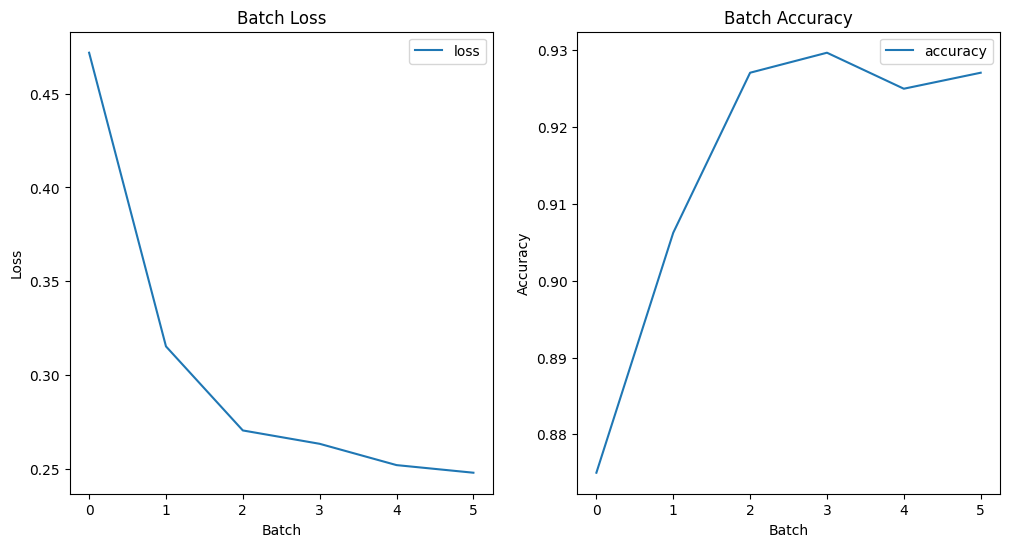

   6/1875 [..............................] - ETA: 16:10 - loss: 0.2481 - accuracy: 0.9271

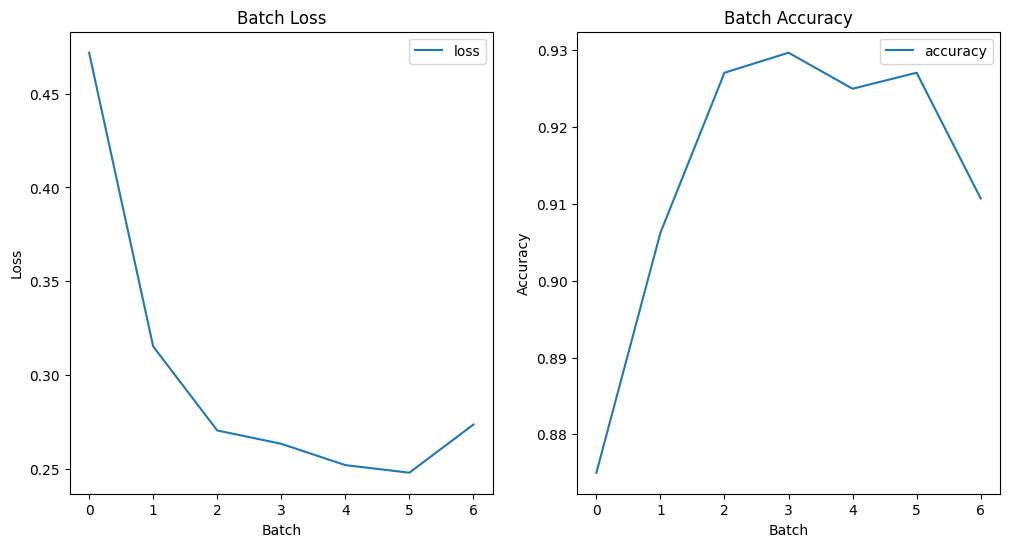

   7/1875 [..............................] - ETA: 16:14 - loss: 0.2737 - accuracy: 0.9107

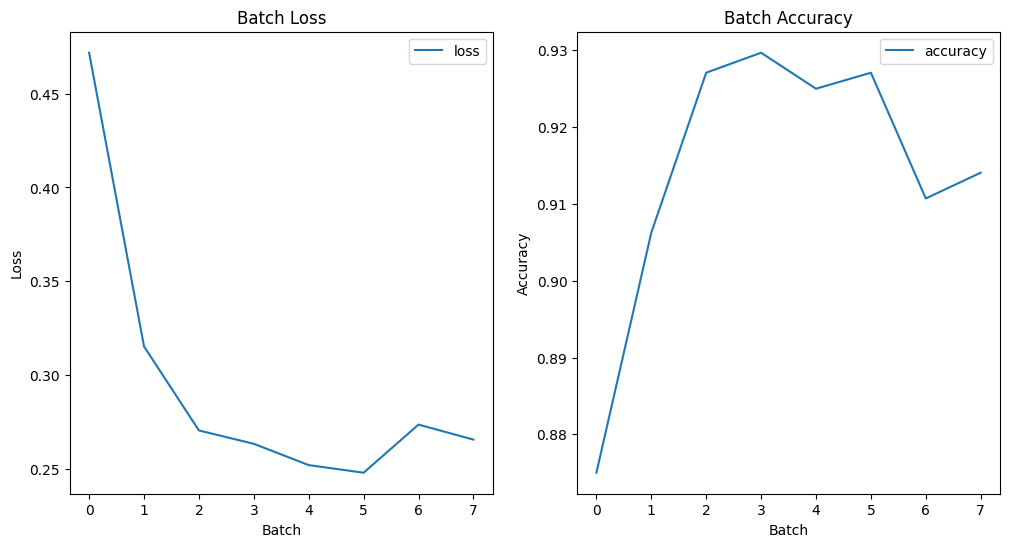

   8/1875 [..............................] - ETA: 16:39 - loss: 0.2657 - accuracy: 0.9141

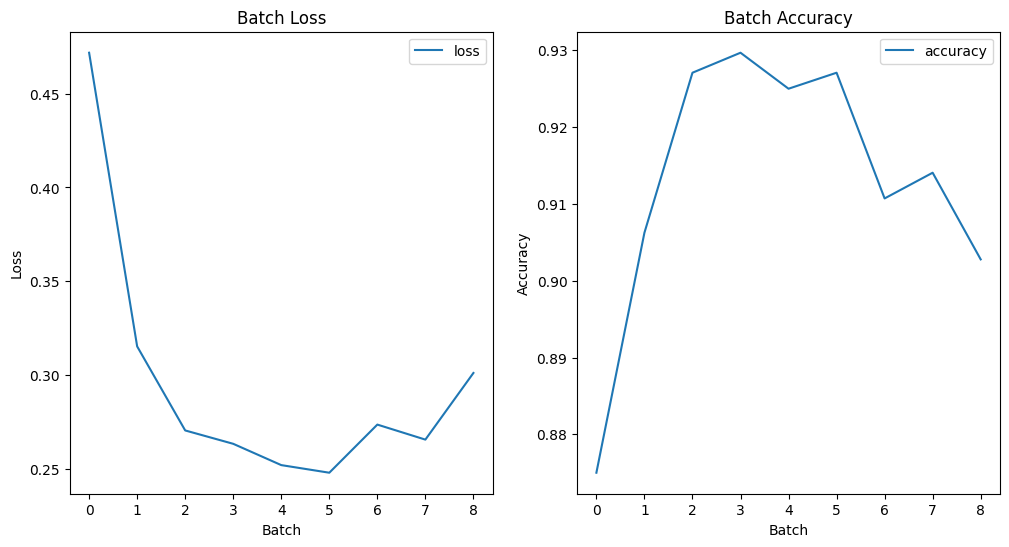

   9/1875 [..............................] - ETA: 17:40 - loss: 0.3012 - accuracy: 0.9028

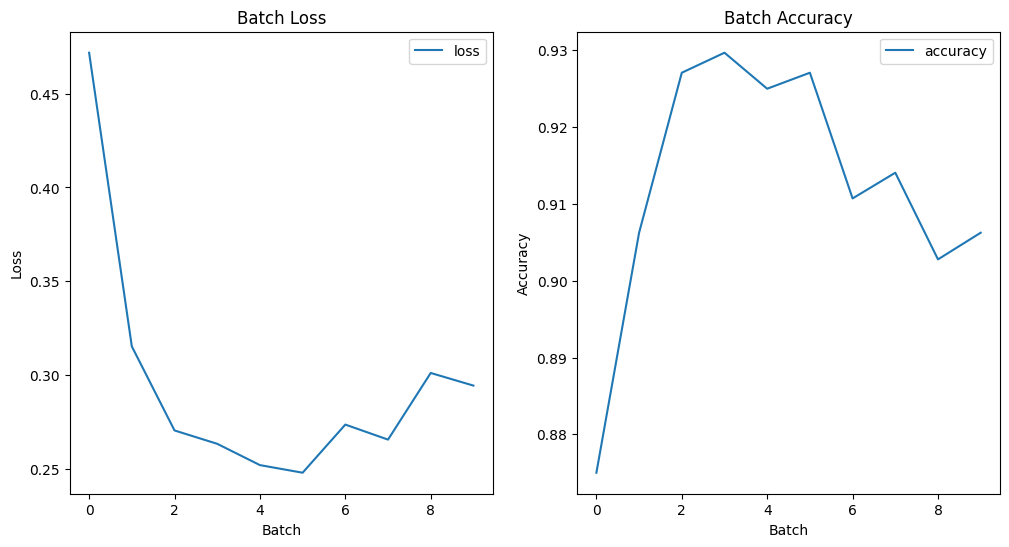

  19/1875 [..............................] - ETA: 9:57 - loss: 0.3240 - accuracy: 0.8832 

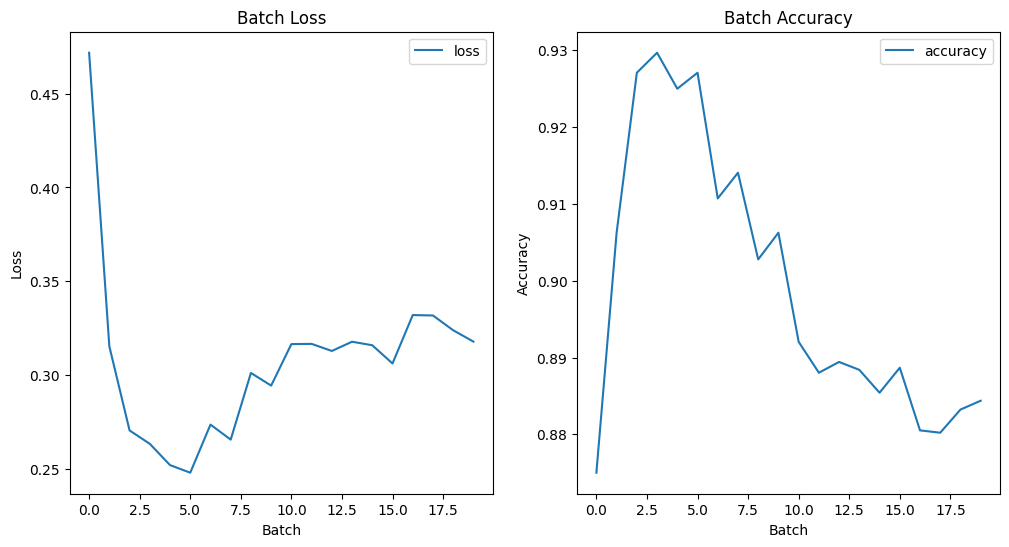

  29/1875 [..............................] - ETA: 8:23 - loss: 0.3287 - accuracy: 0.8836

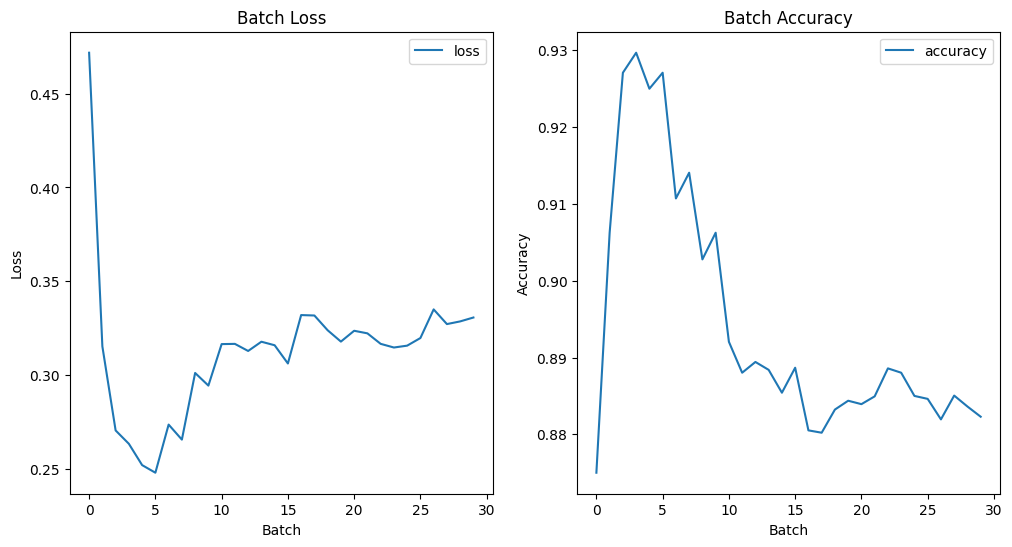

  39/1875 [..............................] - ETA: 7:14 - loss: 0.3378 - accuracy: 0.8774

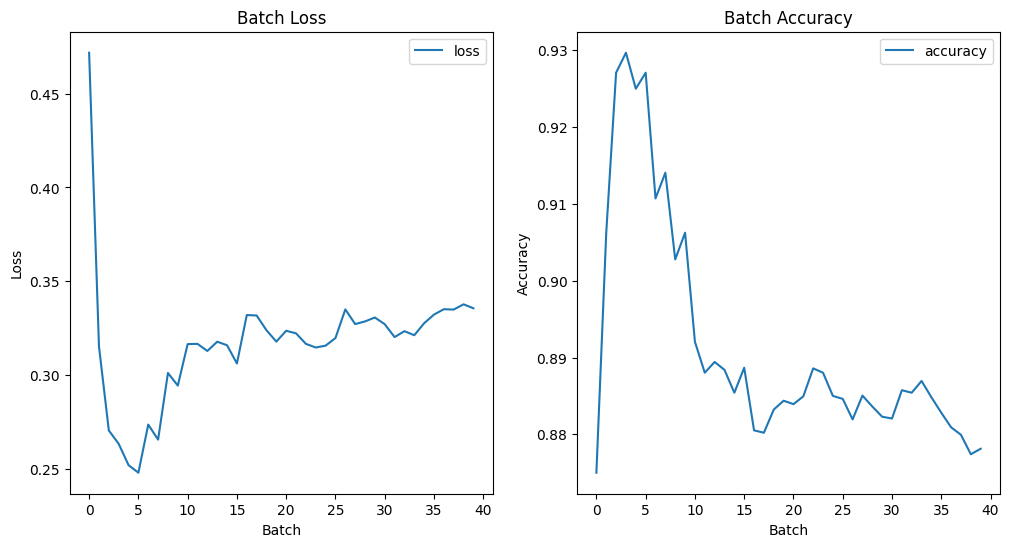

  49/1875 [..............................] - ETA: 6:37 - loss: 0.3316 - accuracy: 0.8820

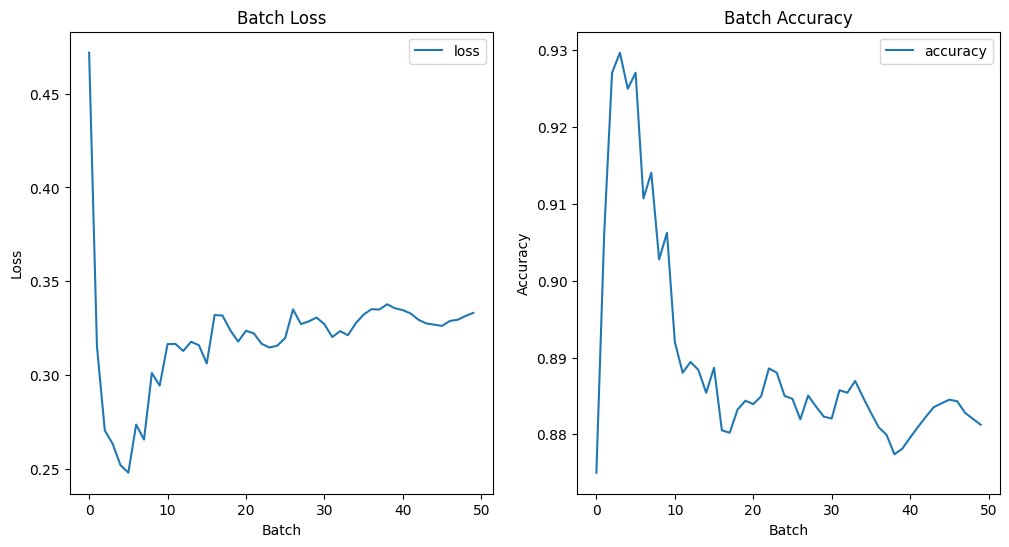

  59/1875 [..............................] - ETA: 5:59 - loss: 0.3337 - accuracy: 0.8819

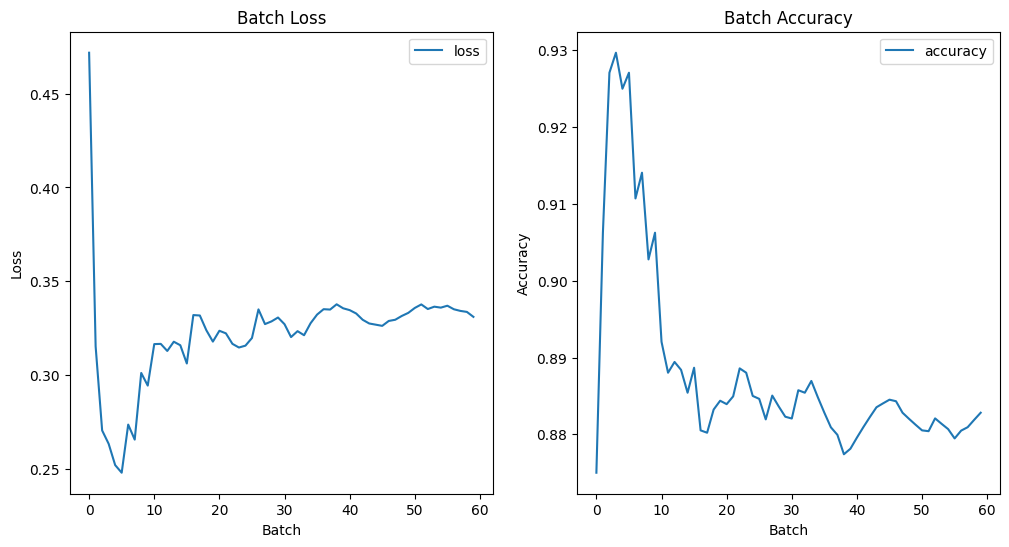

  69/1875 [>.............................] - ETA: 5:32 - loss: 0.3423 - accuracy: 0.8768

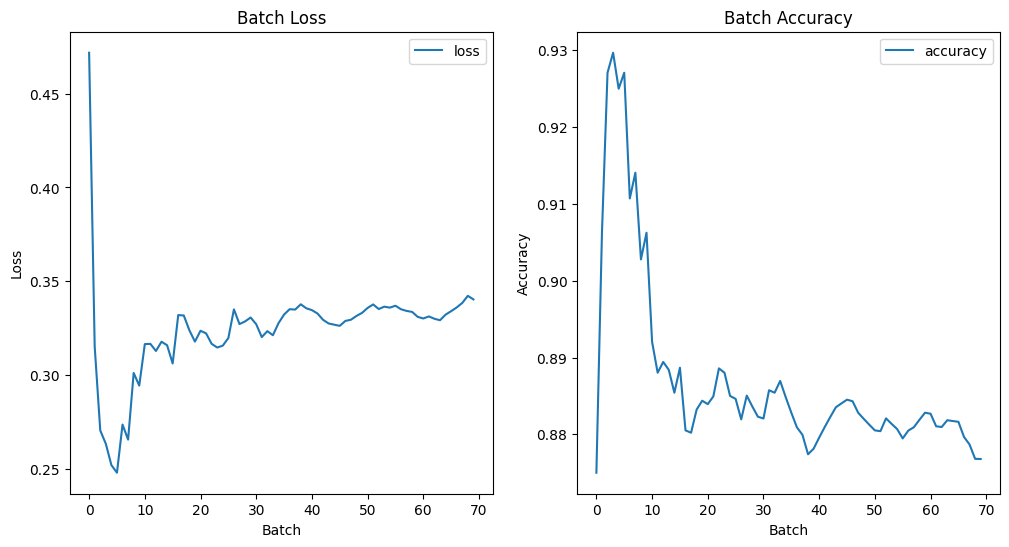

  79/1875 [>.............................] - ETA: 5:12 - loss: 0.3332 - accuracy: 0.8794

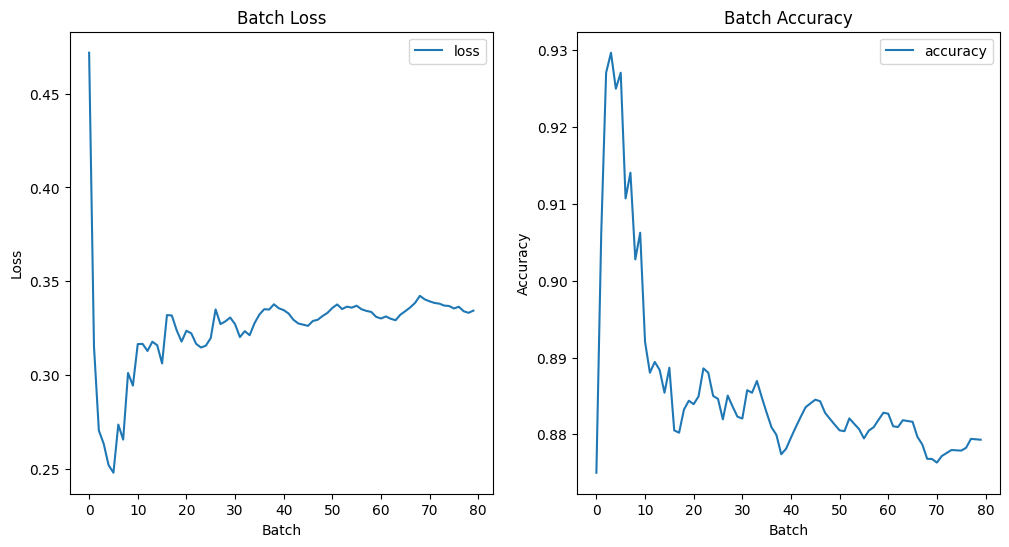

  89/1875 [>.............................] - ETA: 5:06 - loss: 0.3360 - accuracy: 0.8806

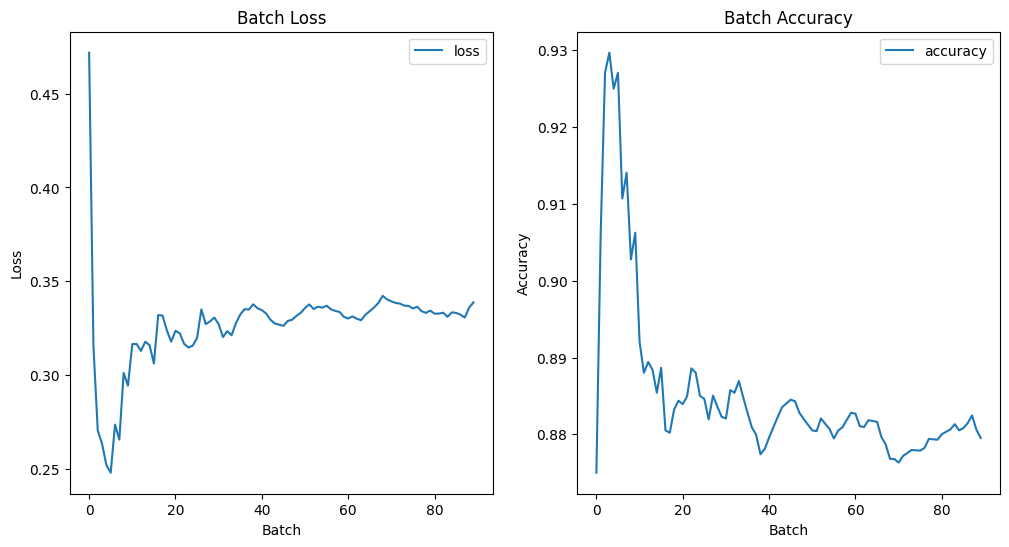

  99/1875 [>.............................] - ETA: 5:05 - loss: 0.3391 - accuracy: 0.8794

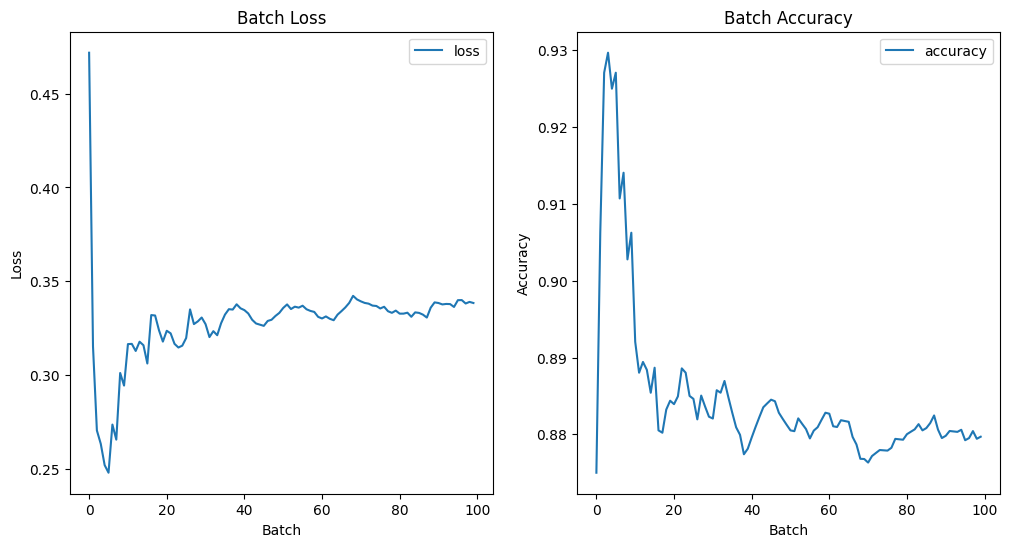

 199/1875 [==>...........................] - ETA: 3:18 - loss: 0.3511 - accuracy: 0.8715

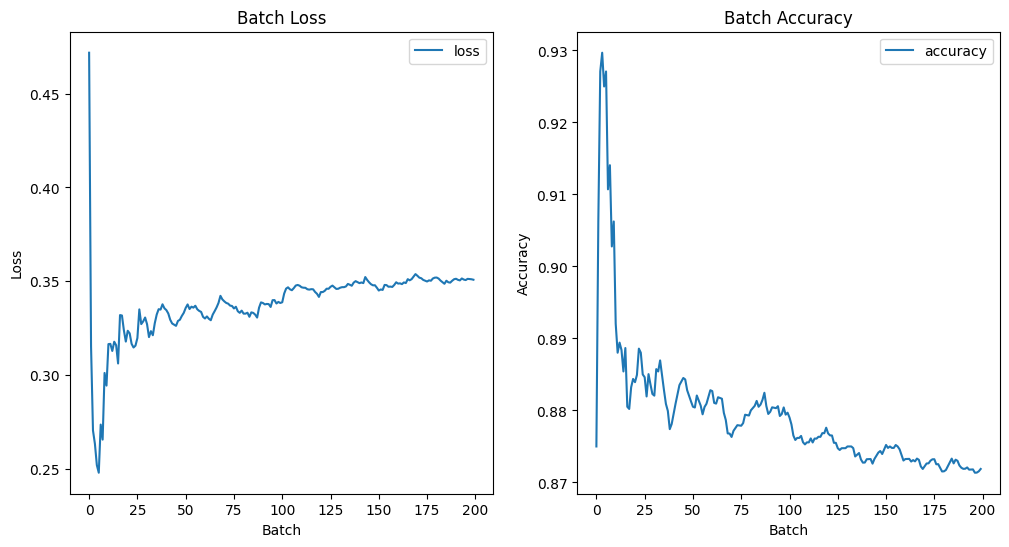

 299/1875 [===>..........................] - ETA: 2:40 - loss: 0.3515 - accuracy: 0.8711

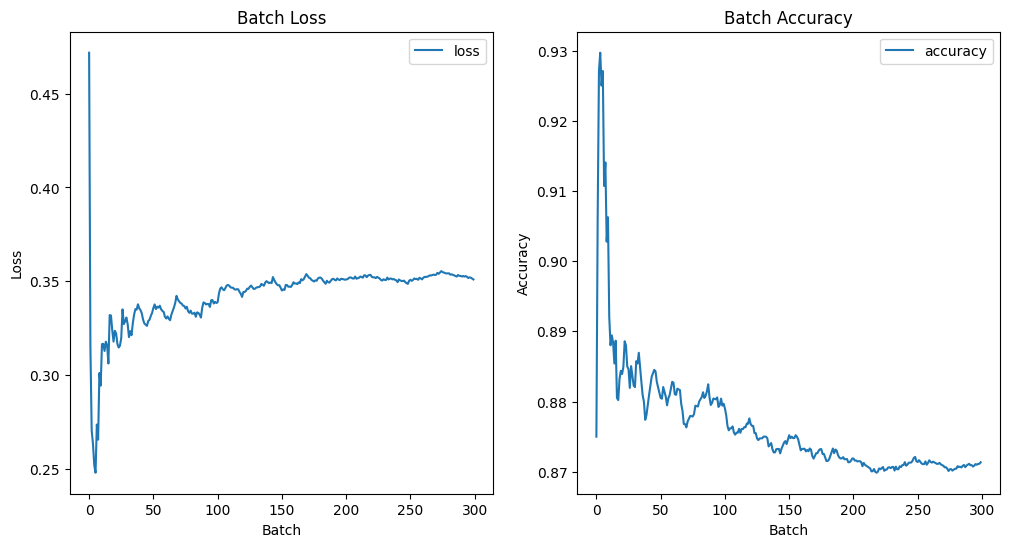

 399/1875 [=====>........................] - ETA: 2:18 - loss: 0.3477 - accuracy: 0.8719

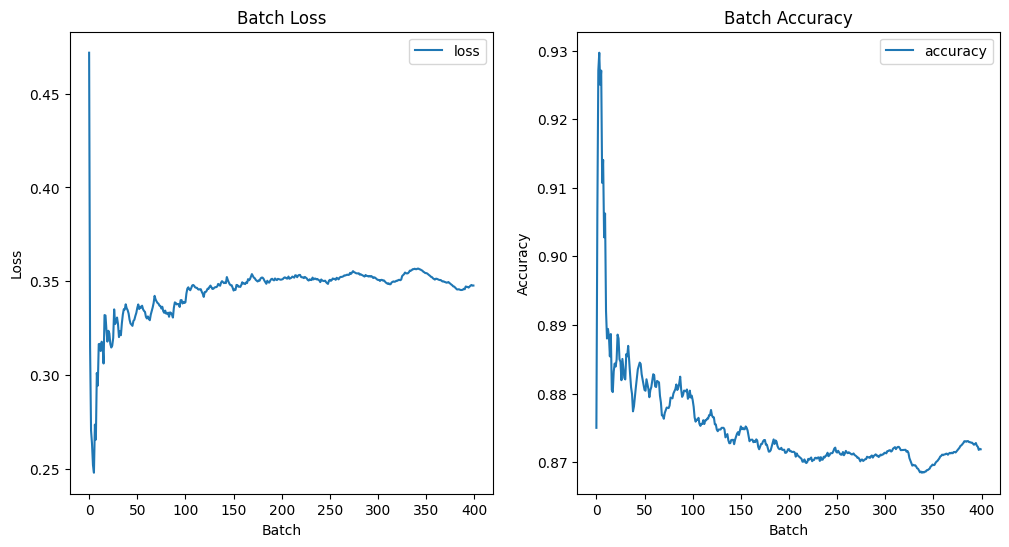

 499/1875 [======>.......................] - ETA: 2:01 - loss: 0.3444 - accuracy: 0.8734

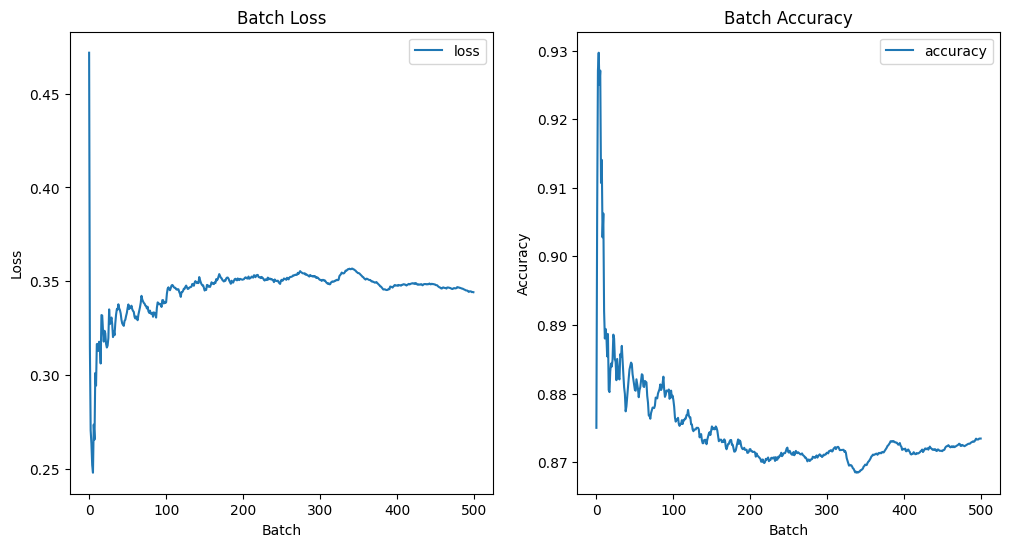

 599/1875 [========>.....................] - ETA: 1:49 - loss: 0.3401 - accuracy: 0.8757

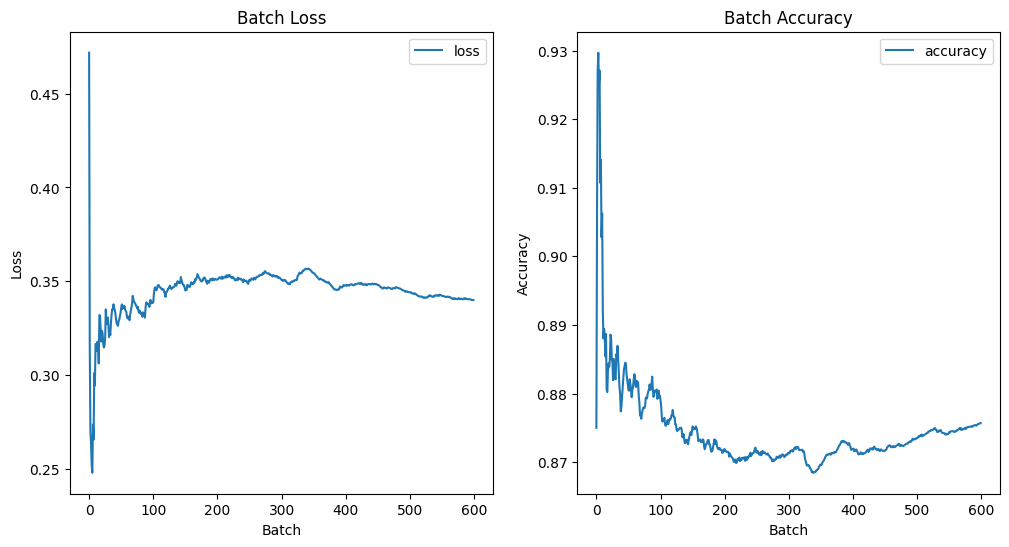

 699/1875 [==========>...................] - ETA: 1:37 - loss: 0.3358 - accuracy: 0.8776

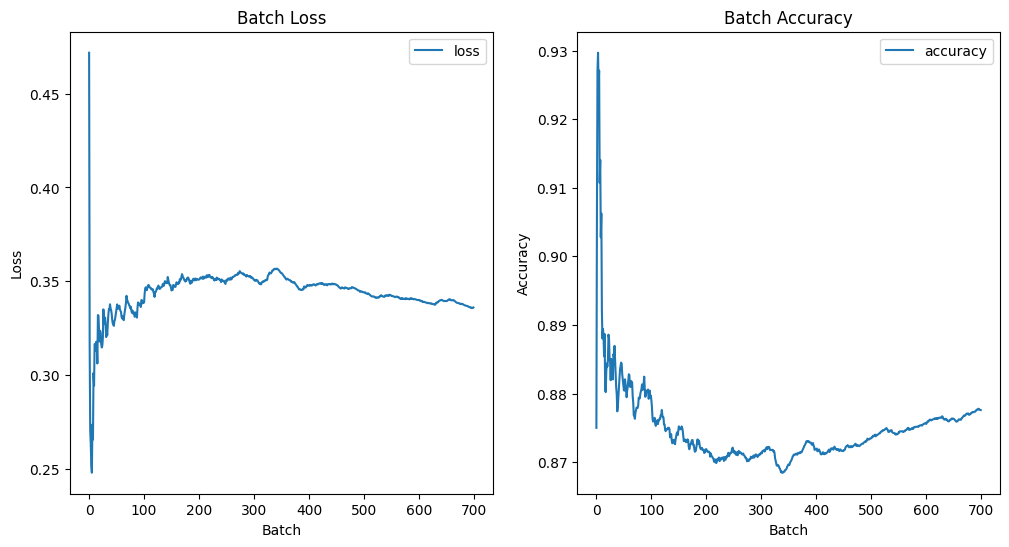

 799/1875 [===========>..................] - ETA: 1:26 - loss: 0.3339 - accuracy: 0.8788

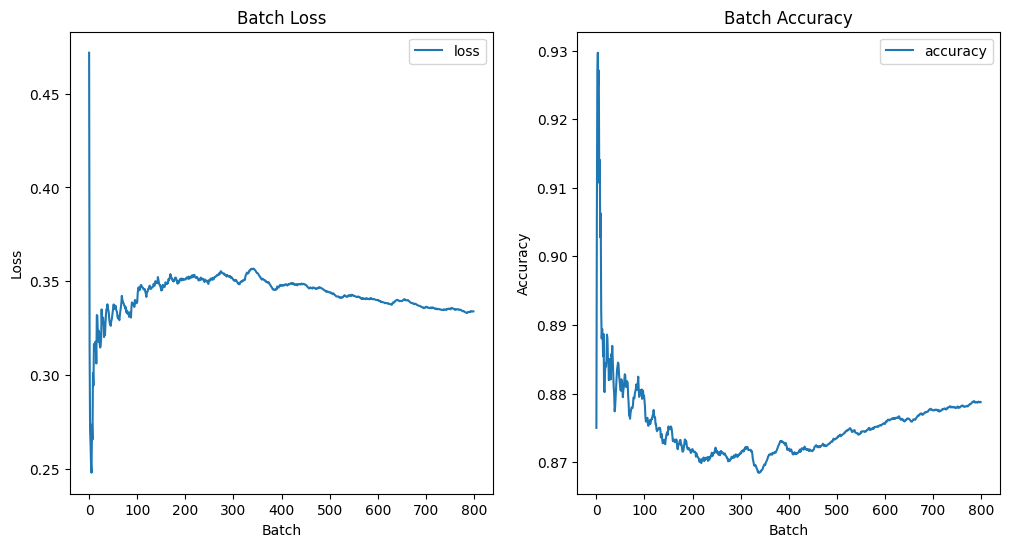

 899/1875 [=============>................] - ETA: 1:17 - loss: 0.3344 - accuracy: 0.8789

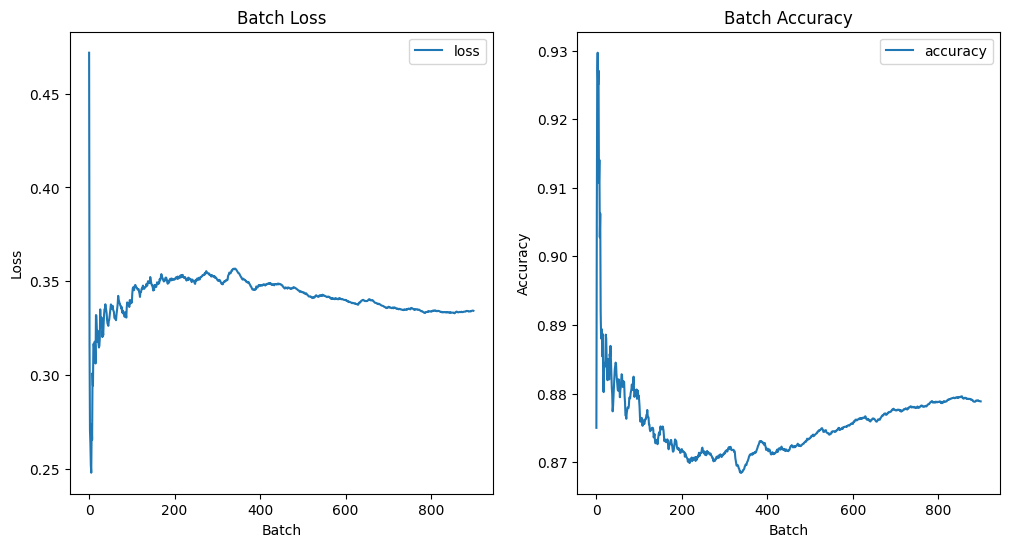

 999/1875 [==============>...............] - ETA: 1:08 - loss: 0.3319 - accuracy: 0.8797

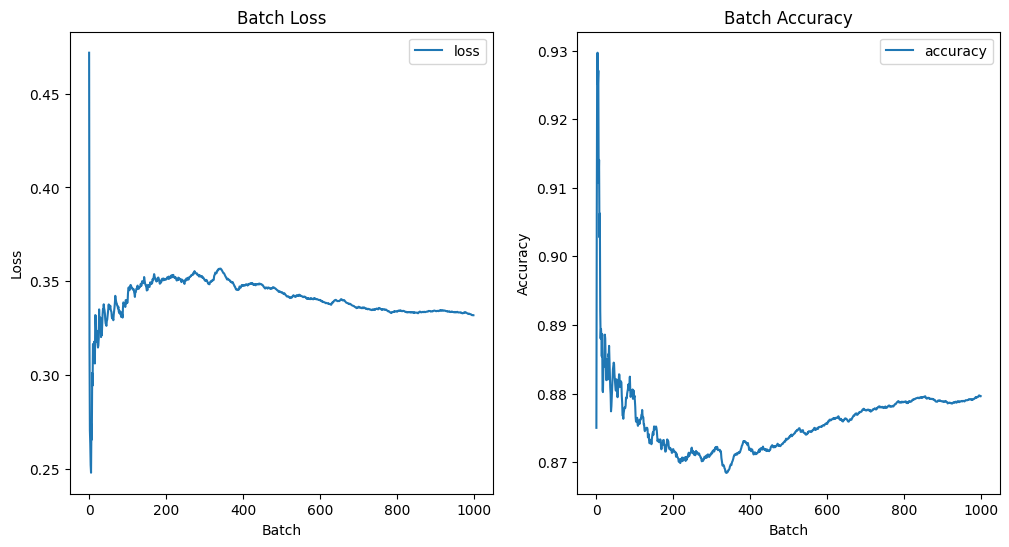

1875/1875 [==============================] - ETA: 0s - loss: 0.3226 - accuracy: 0.8827

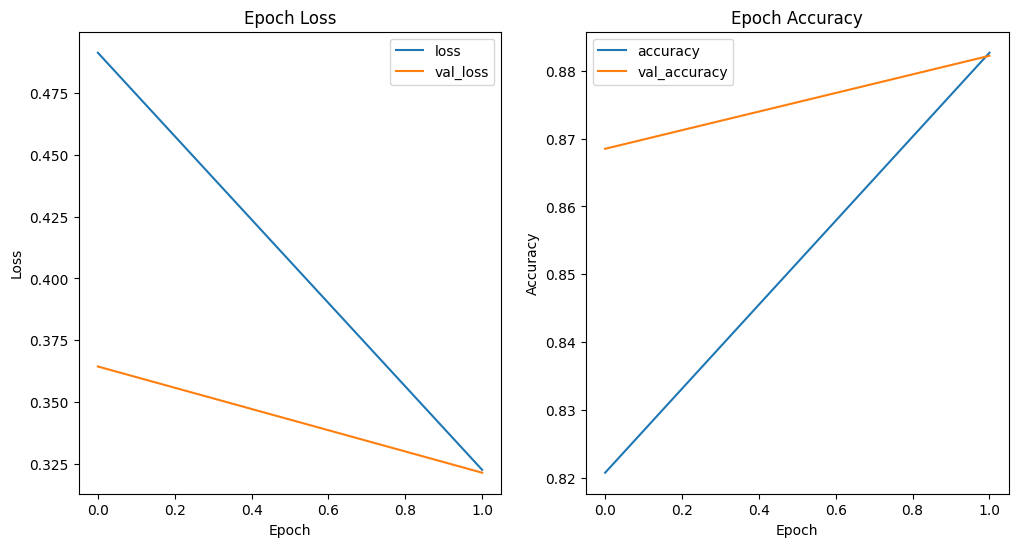

1875/1875 [==============================] - 144s 76ms/step - loss: 0.3226 - accuracy: 0.8827 - val_loss: 0.3215 - val_accuracy: 0.8822
Epoch 3/5


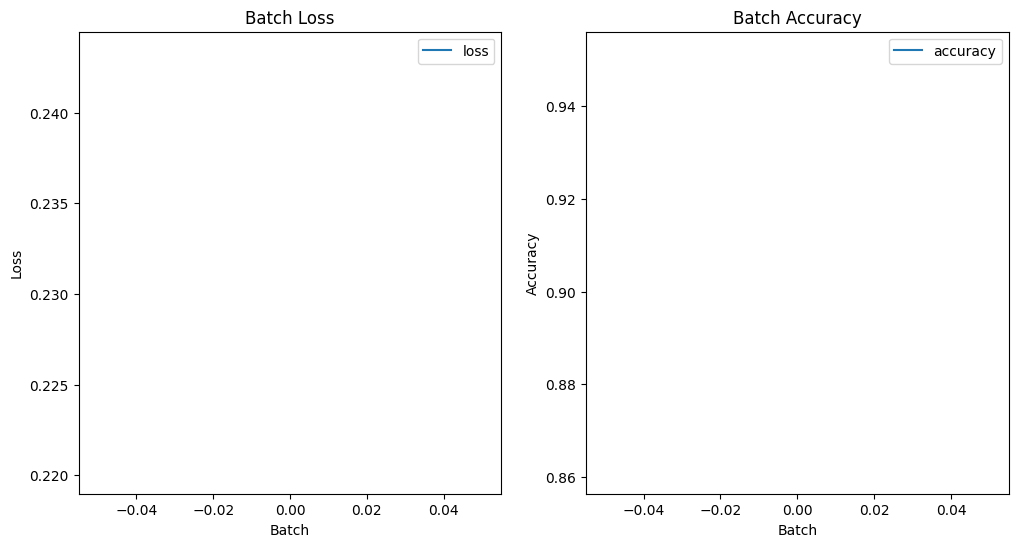

   1/1875 [..............................] - ETA: 19:44 - loss: 0.2317 - accuracy: 0.9062

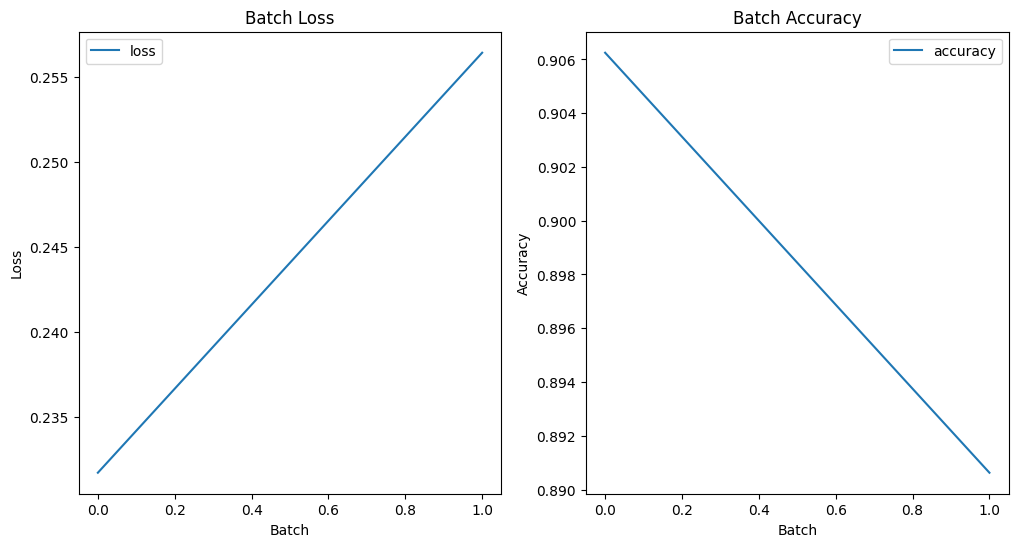

   2/1875 [..............................] - ETA: 23:28 - loss: 0.2564 - accuracy: 0.8906

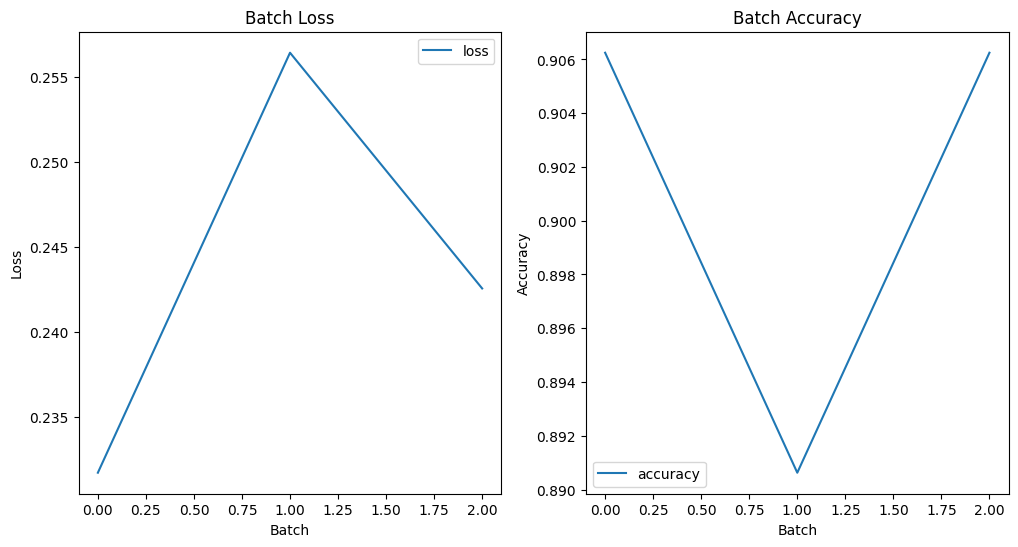

   3/1875 [..............................] - ETA: 24:32 - loss: 0.2425 - accuracy: 0.9062

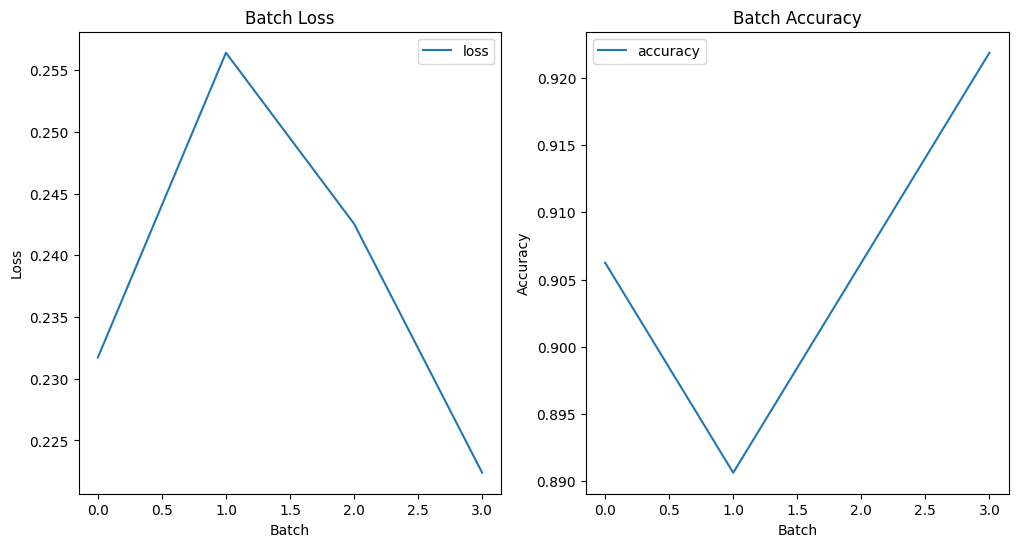

   4/1875 [..............................] - ETA: 24:36 - loss: 0.2224 - accuracy: 0.9219

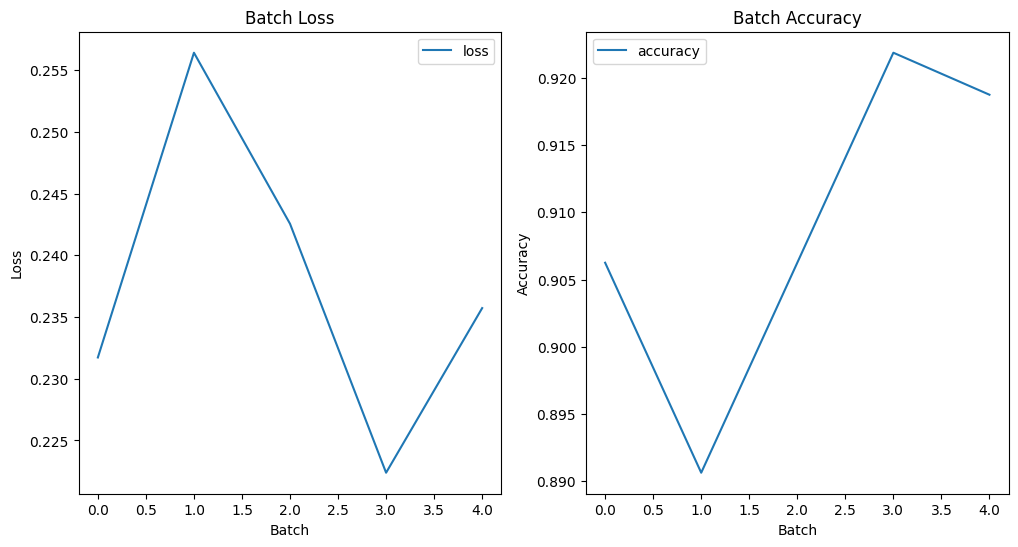

   5/1875 [..............................] - ETA: 24:40 - loss: 0.2357 - accuracy: 0.9187

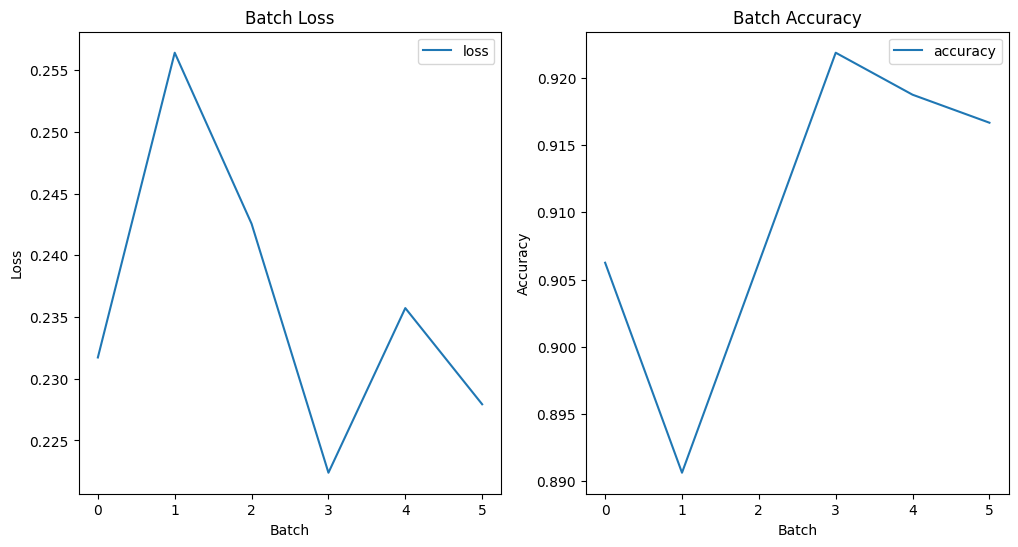

   6/1875 [..............................] - ETA: 24:27 - loss: 0.2279 - accuracy: 0.9167

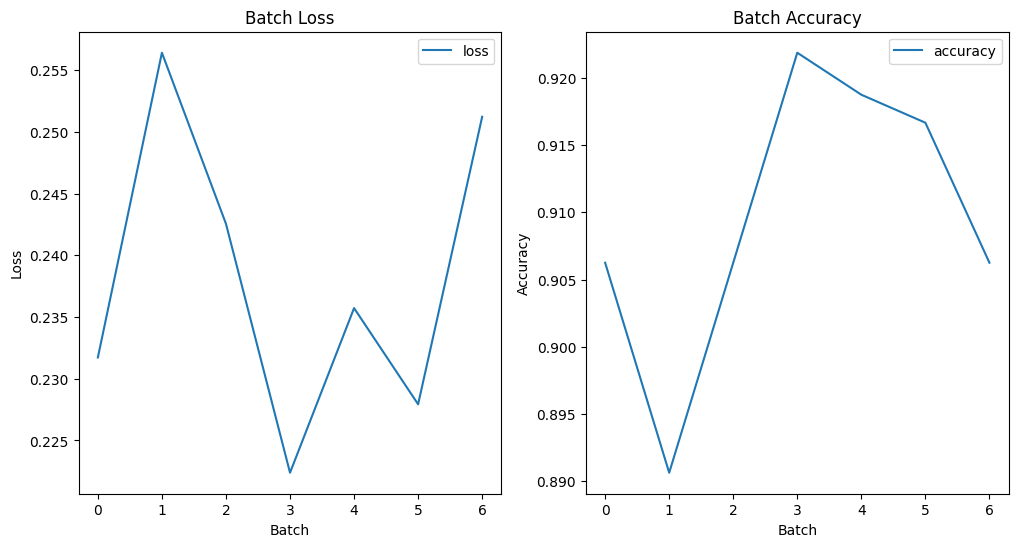

   7/1875 [..............................] - ETA: 24:15 - loss: 0.2512 - accuracy: 0.9062

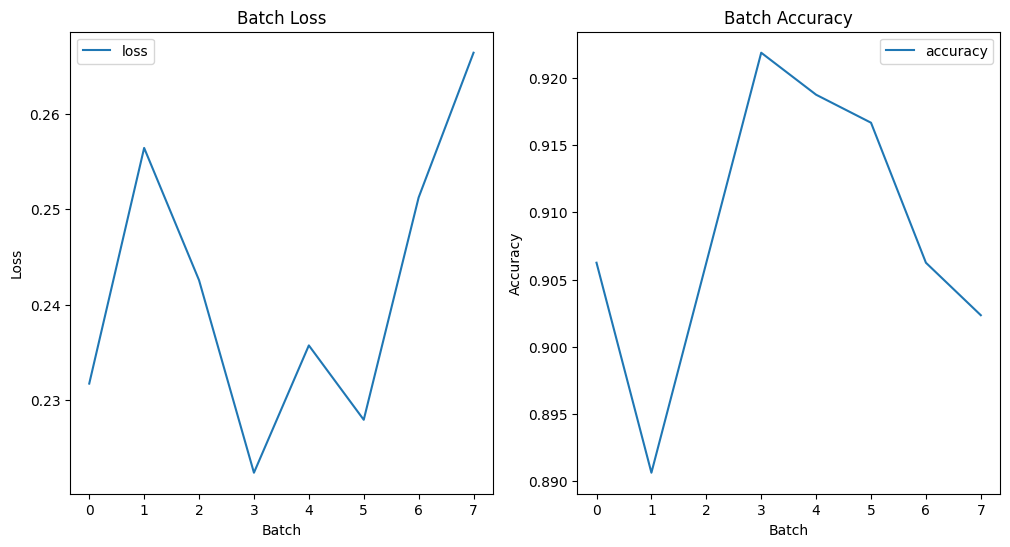

   8/1875 [..............................] - ETA: 24:21 - loss: 0.2664 - accuracy: 0.9023

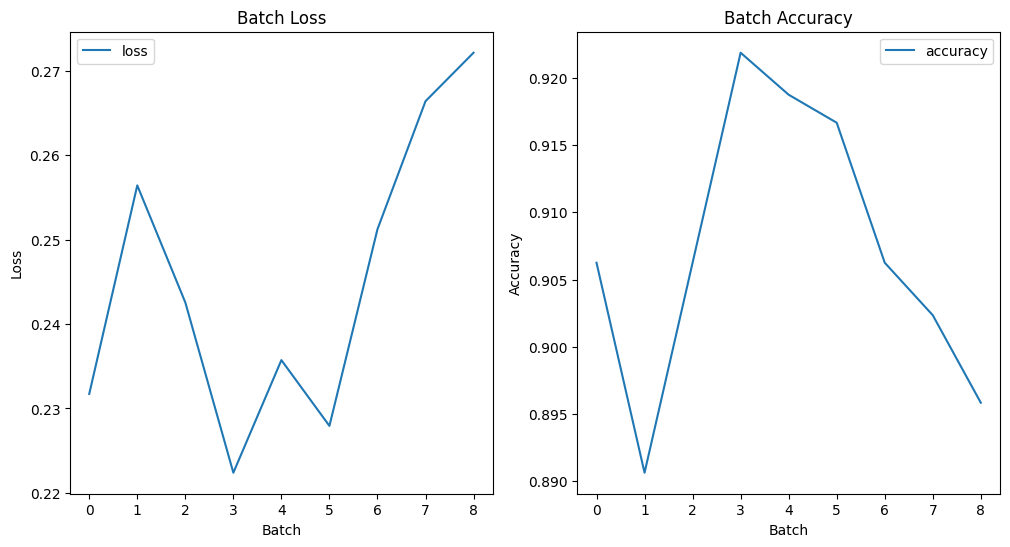

   9/1875 [..............................] - ETA: 24:32 - loss: 0.2721 - accuracy: 0.8958

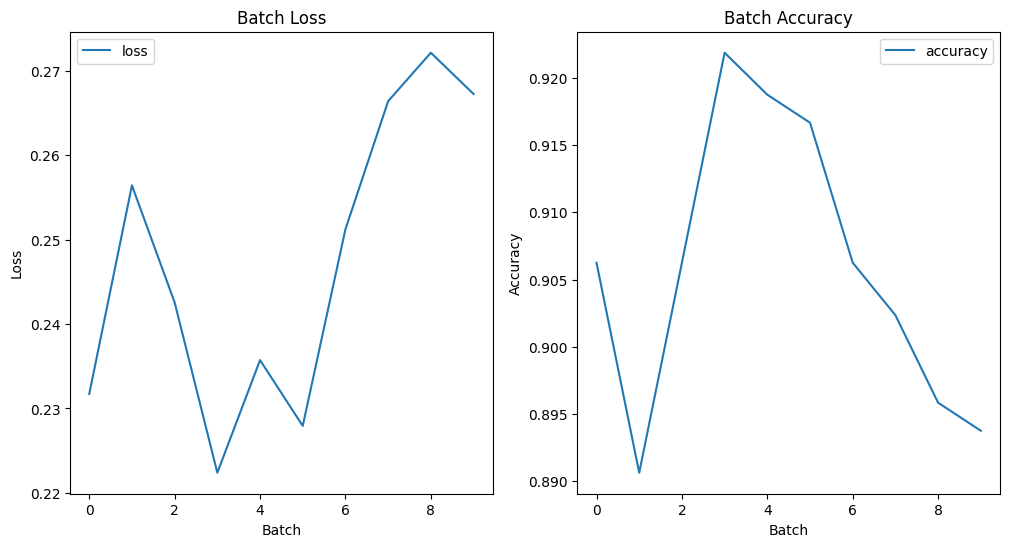

  19/1875 [..............................] - ETA: 13:04 - loss: 0.2883 - accuracy: 0.8947

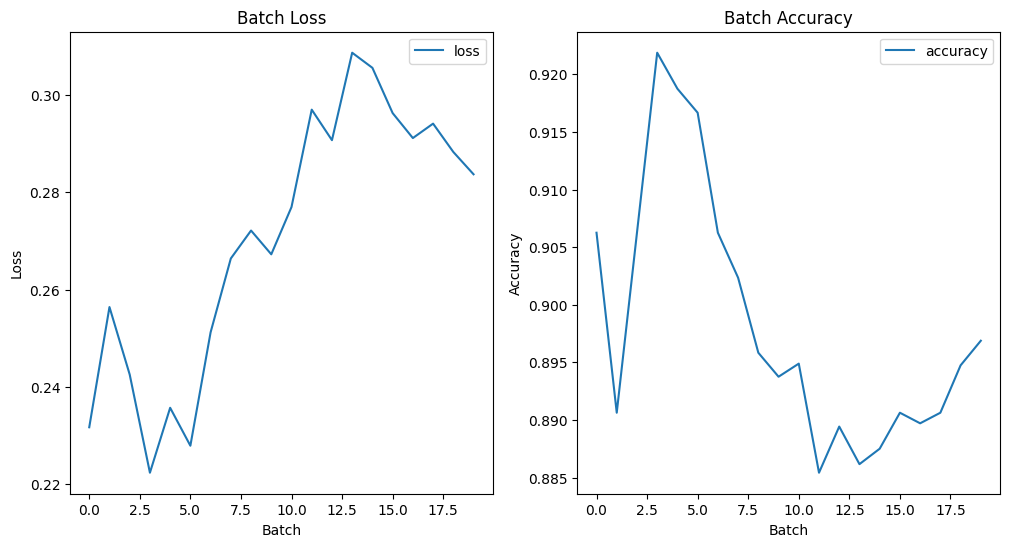

  29/1875 [..............................] - ETA: 9:56 - loss: 0.3027 - accuracy: 0.8869 

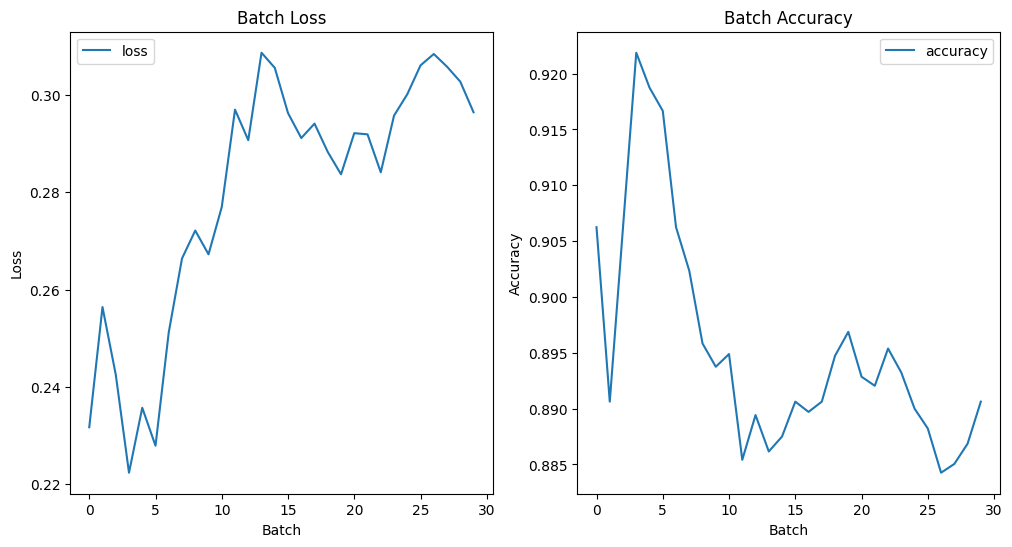

  39/1875 [..............................] - ETA: 8:23 - loss: 0.2946 - accuracy: 0.8878

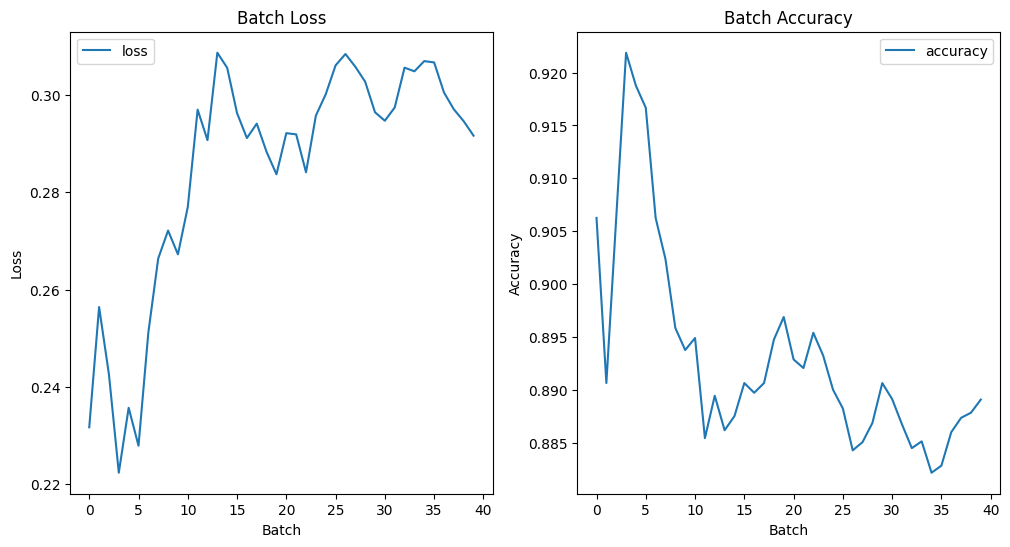

  49/1875 [..............................] - ETA: 7:39 - loss: 0.2905 - accuracy: 0.8903

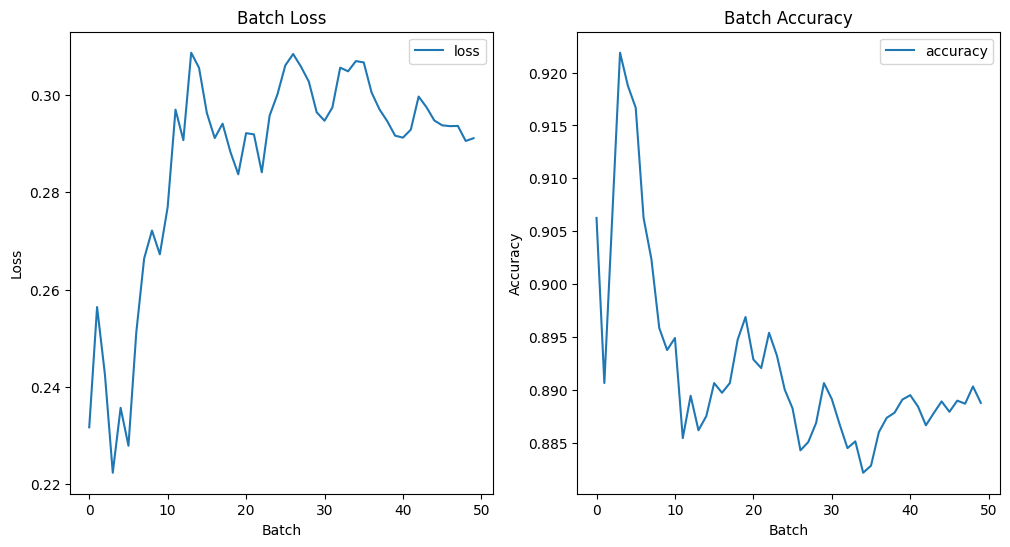

  59/1875 [..............................] - ETA: 7:07 - loss: 0.2824 - accuracy: 0.8930

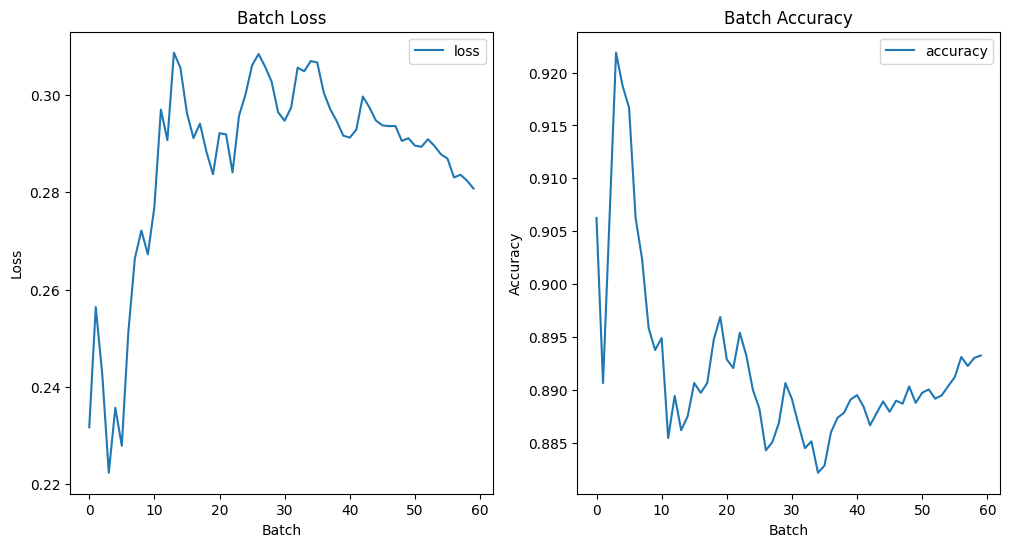

  69/1875 [>.............................] - ETA: 6:58 - loss: 0.2865 - accuracy: 0.8918

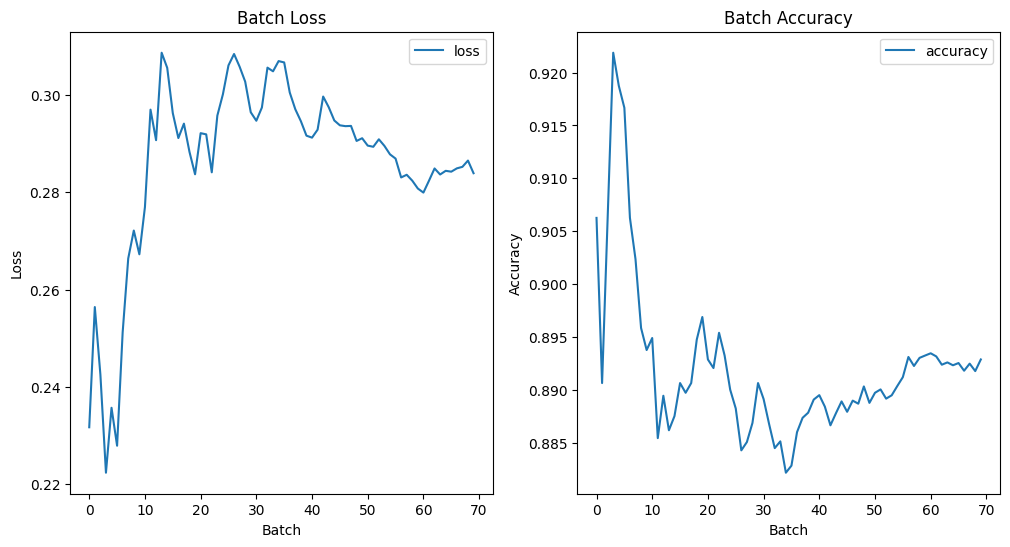

  79/1875 [>.............................] - ETA: 6:33 - loss: 0.2804 - accuracy: 0.8956

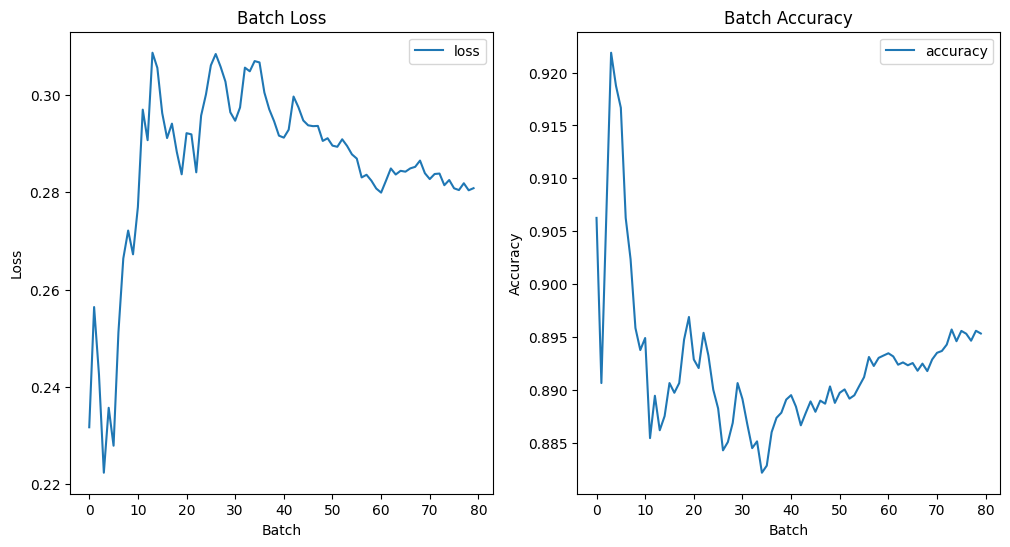

  89/1875 [>.............................] - ETA: 6:13 - loss: 0.2717 - accuracy: 0.8996

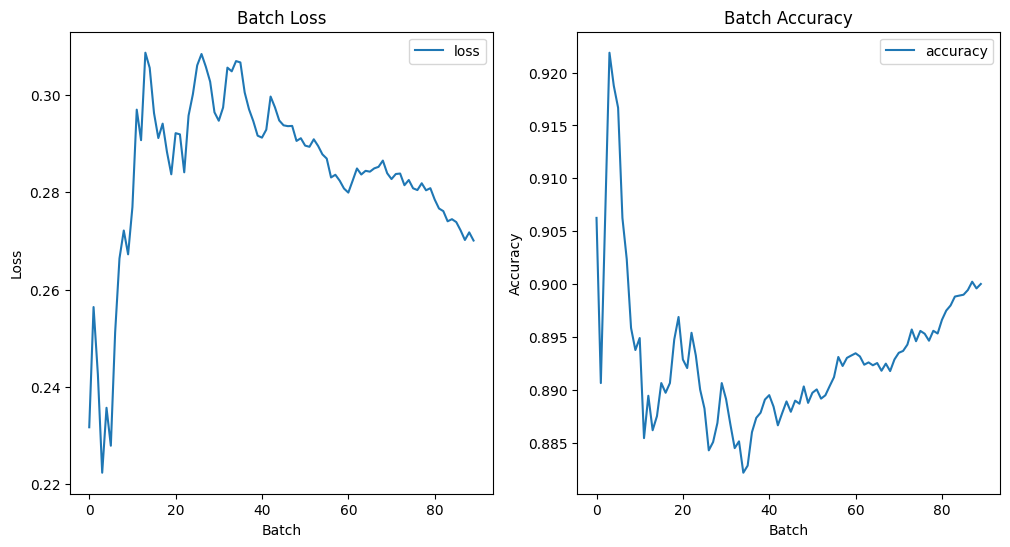

  99/1875 [>.............................] - ETA: 5:56 - loss: 0.2725 - accuracy: 0.8996

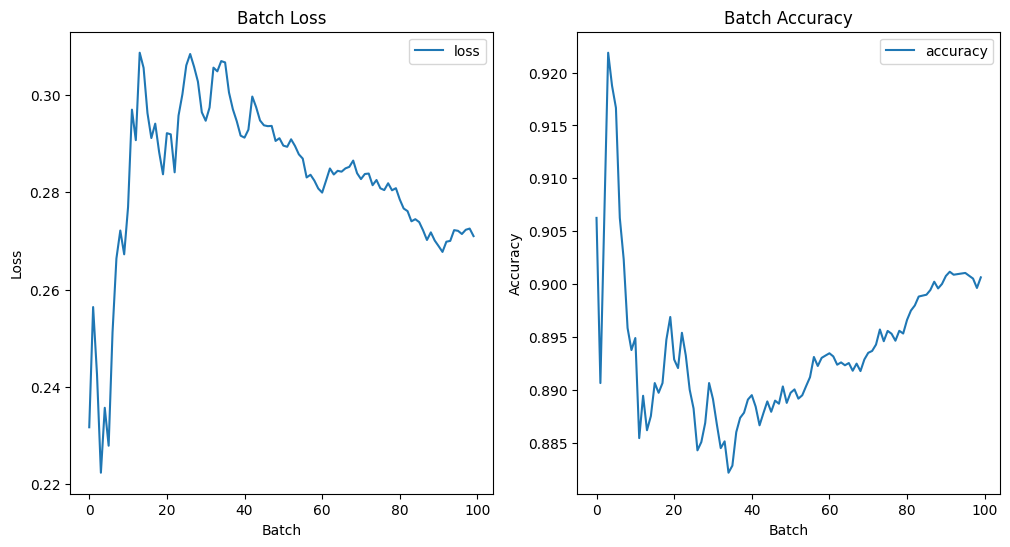

 199/1875 [==>...........................] - ETA: 3:43 - loss: 0.2808 - accuracy: 0.8997

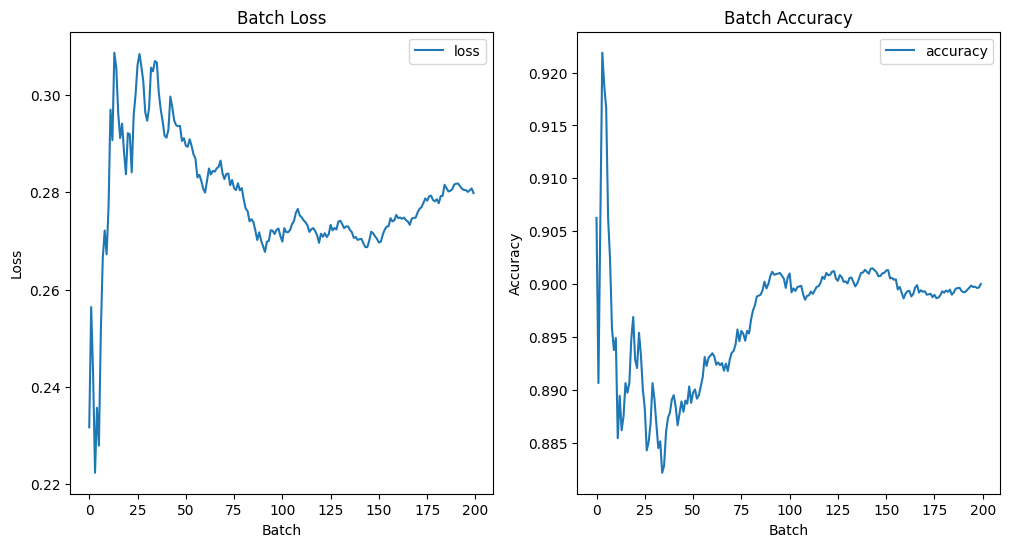

 299/1875 [===>..........................] - ETA: 2:57 - loss: 0.2802 - accuracy: 0.8985

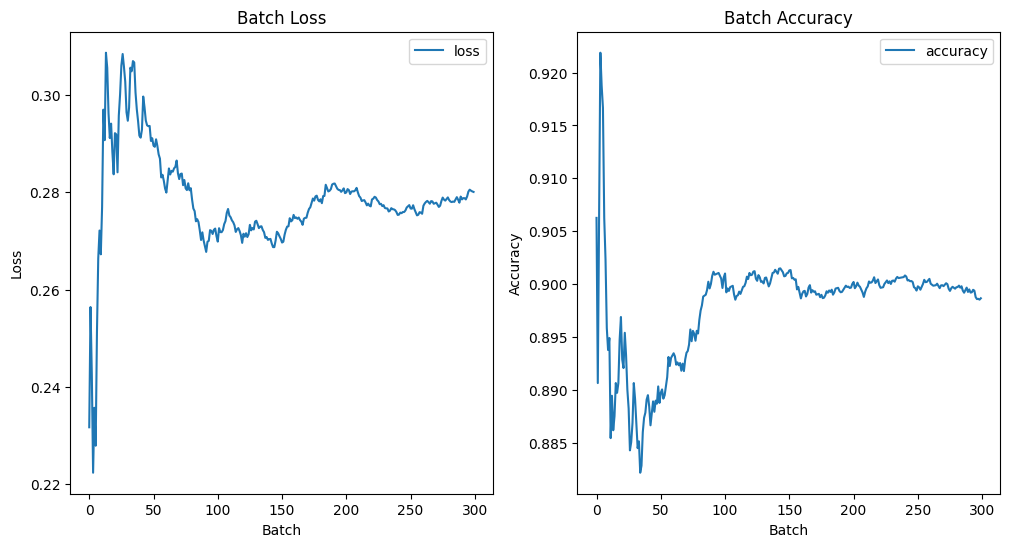

 399/1875 [=====>........................] - ETA: 2:30 - loss: 0.2819 - accuracy: 0.8971

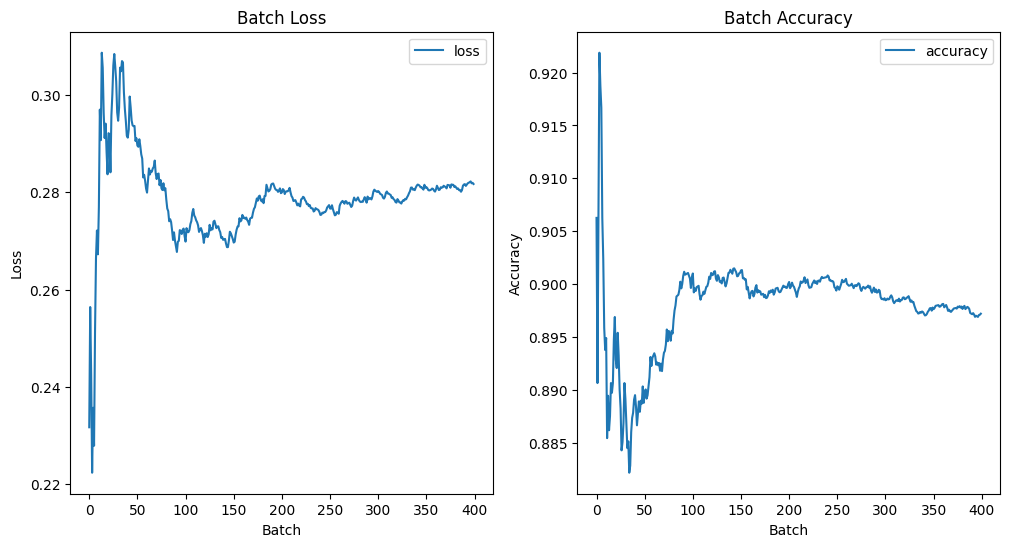

 499/1875 [======>.......................] - ETA: 2:10 - loss: 0.2809 - accuracy: 0.8989

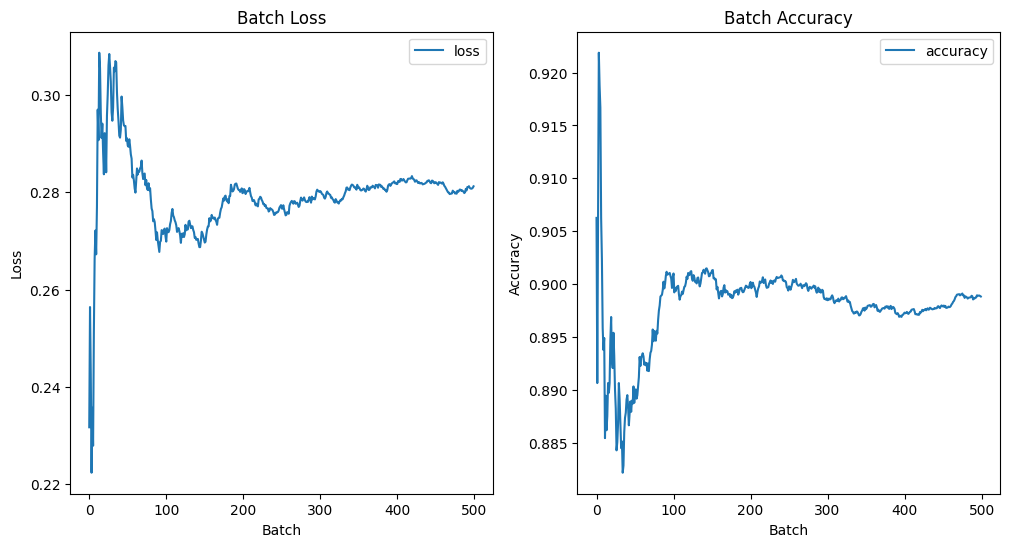

 599/1875 [========>.....................] - ETA: 1:56 - loss: 0.2824 - accuracy: 0.8982

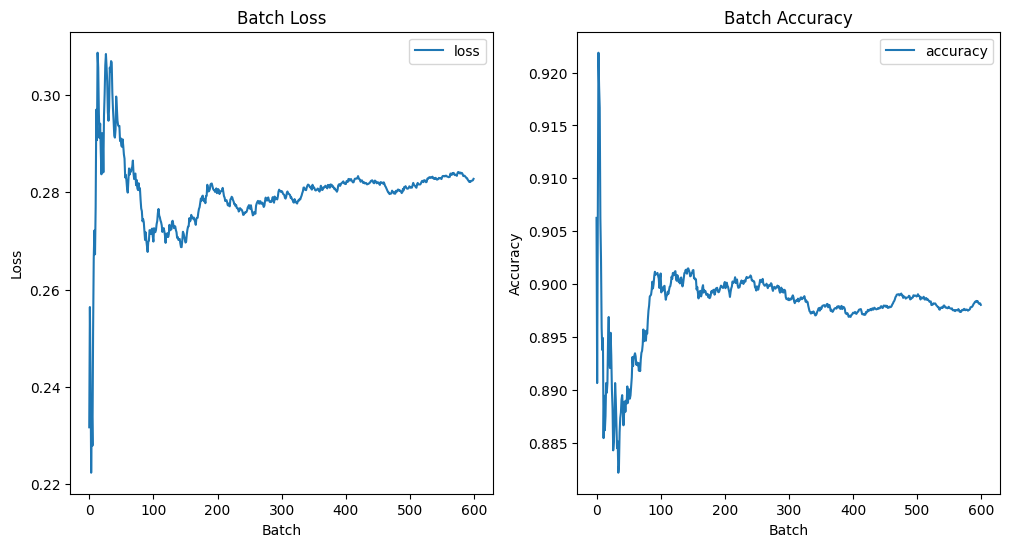

 699/1875 [==========>...................] - ETA: 1:43 - loss: 0.2854 - accuracy: 0.8971

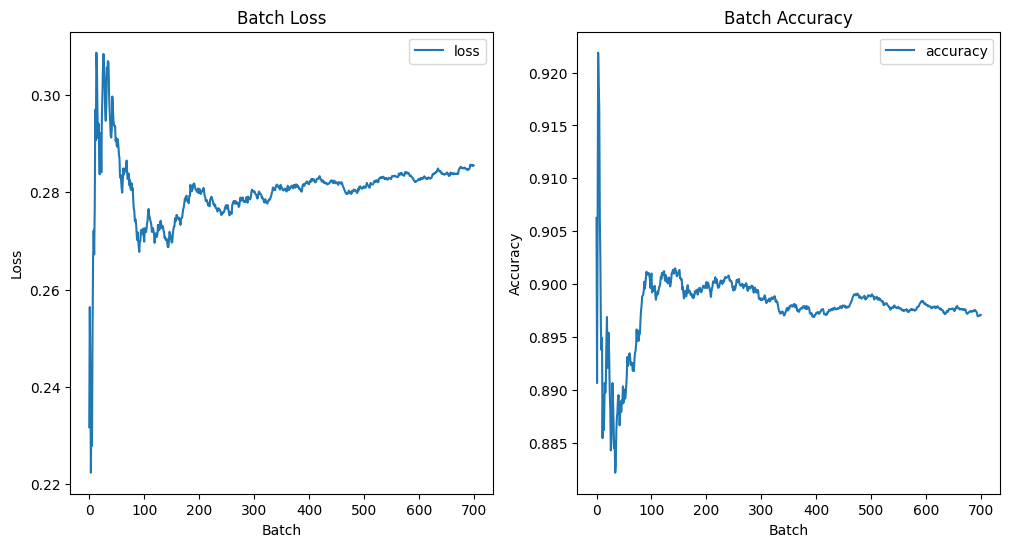

 799/1875 [===========>..................] - ETA: 1:31 - loss: 0.2814 - accuracy: 0.8982

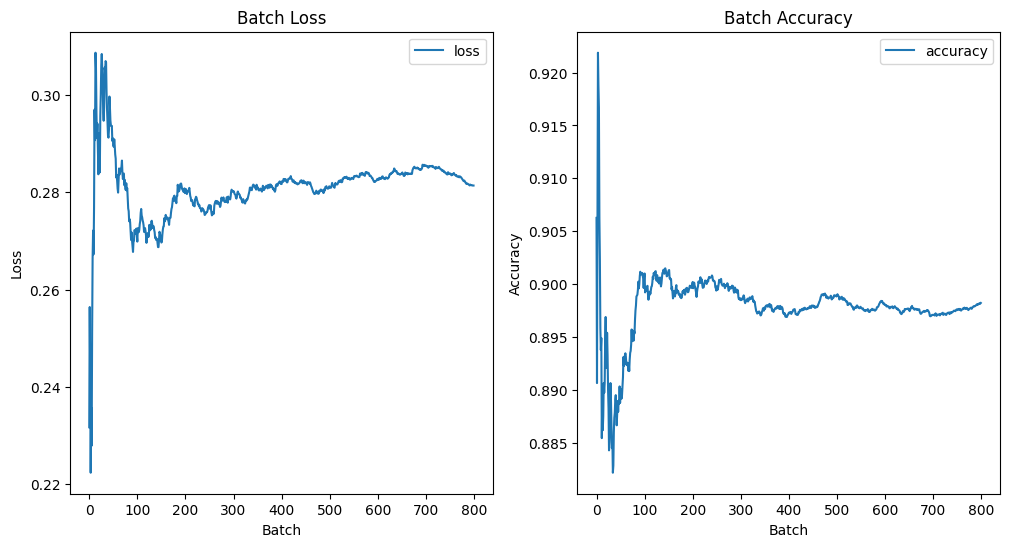

 899/1875 [=============>................] - ETA: 1:21 - loss: 0.2849 - accuracy: 0.8958

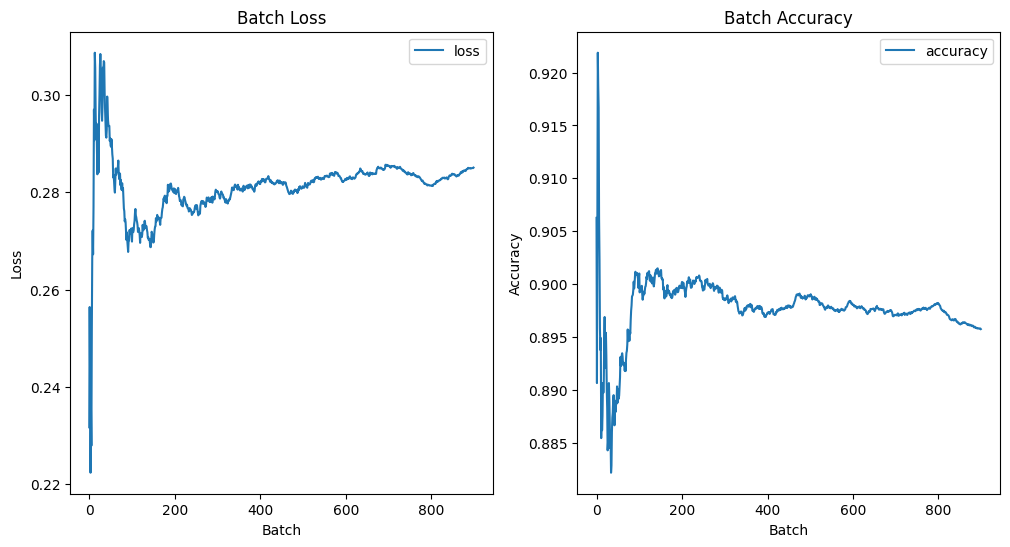

 999/1875 [==============>...............] - ETA: 1:11 - loss: 0.2818 - accuracy: 0.8971

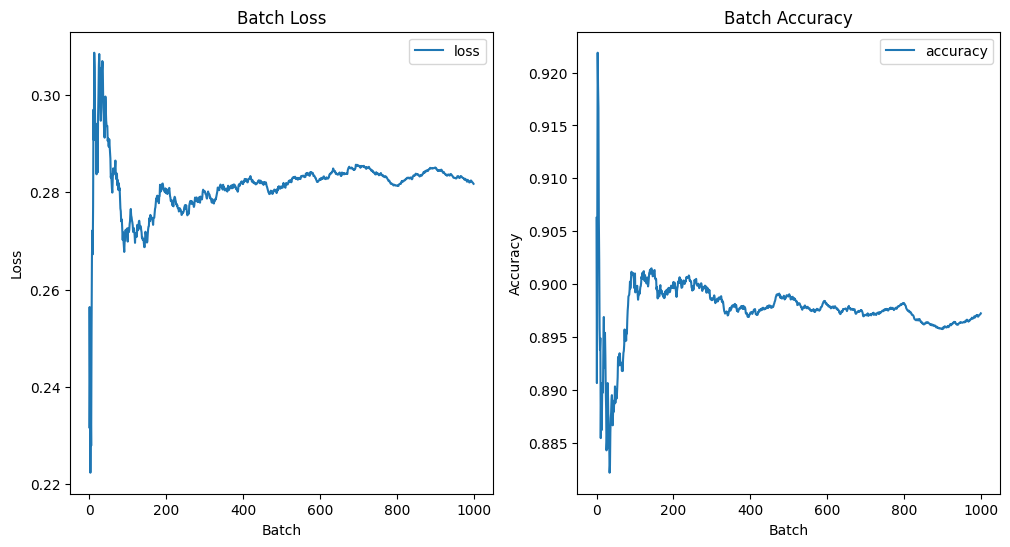

1875/1875 [==============================] - ETA: 0s - loss: 0.2764 - accuracy: 0.8993

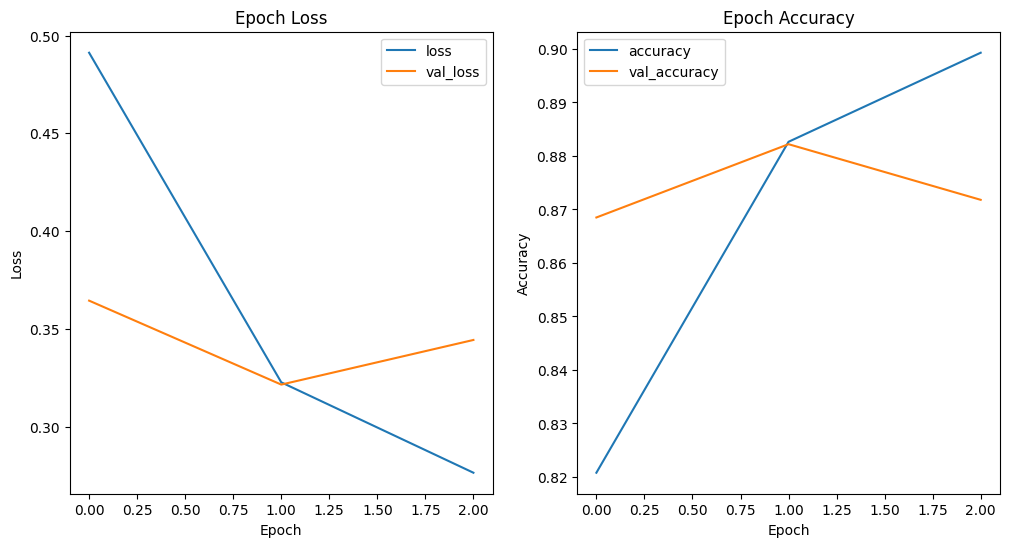

1875/1875 [==============================] - 142s 76ms/step - loss: 0.2764 - accuracy: 0.8993 - val_loss: 0.3443 - val_accuracy: 0.8718
Epoch 4/5


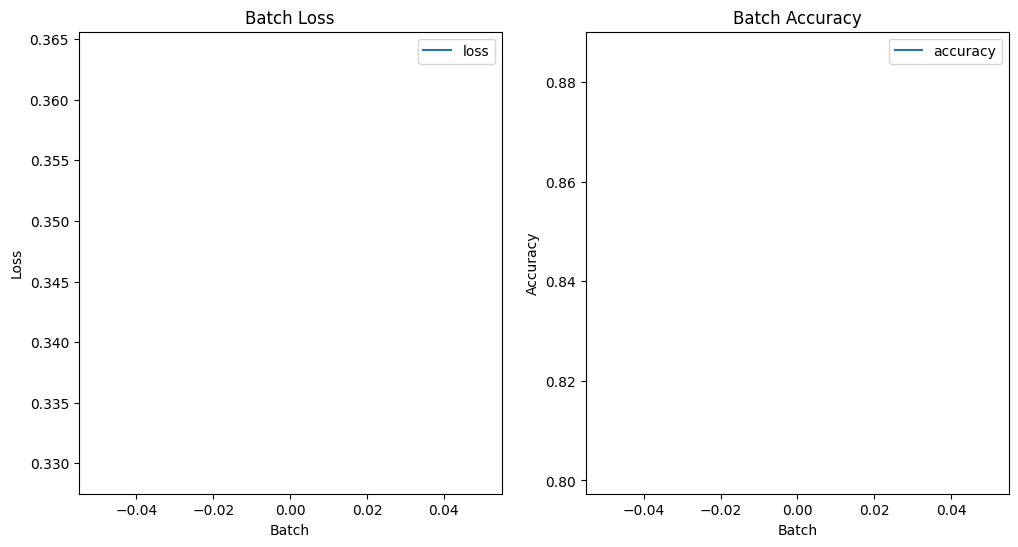

   1/1875 [..............................] - ETA: 25:23 - loss: 0.3465 - accuracy: 0.8438

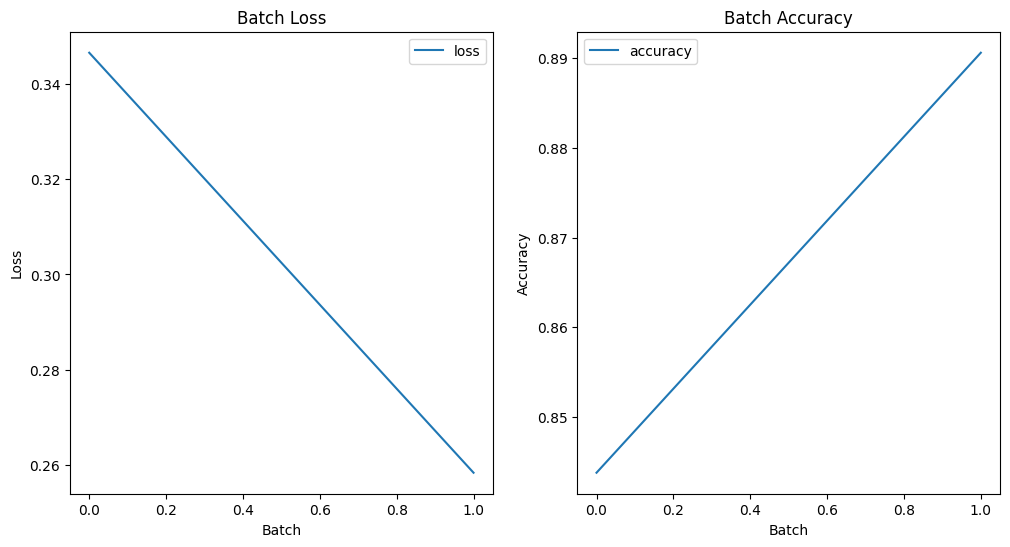

   2/1875 [..............................] - ETA: 28:33 - loss: 0.2584 - accuracy: 0.8906

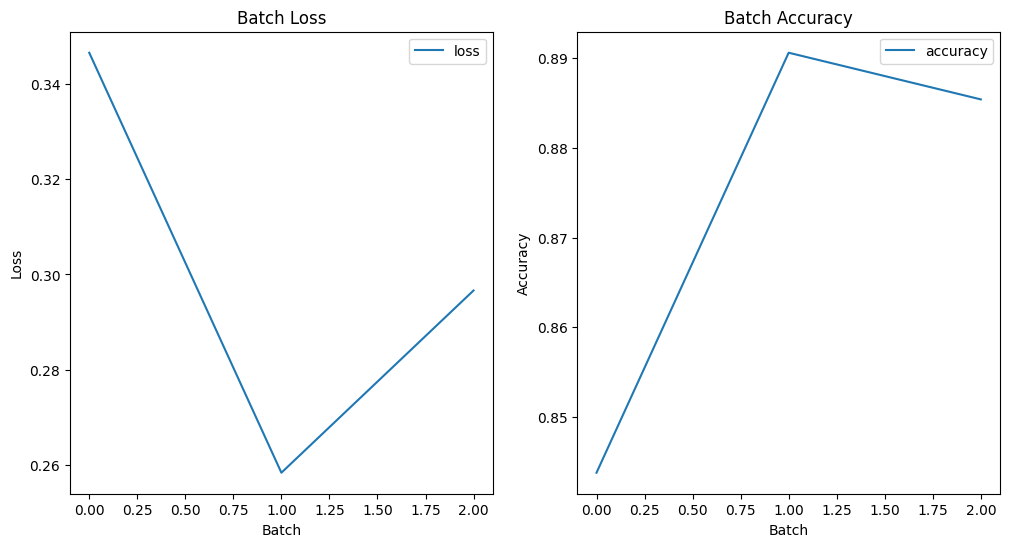

   3/1875 [..............................] - ETA: 35:35 - loss: 0.2966 - accuracy: 0.8854

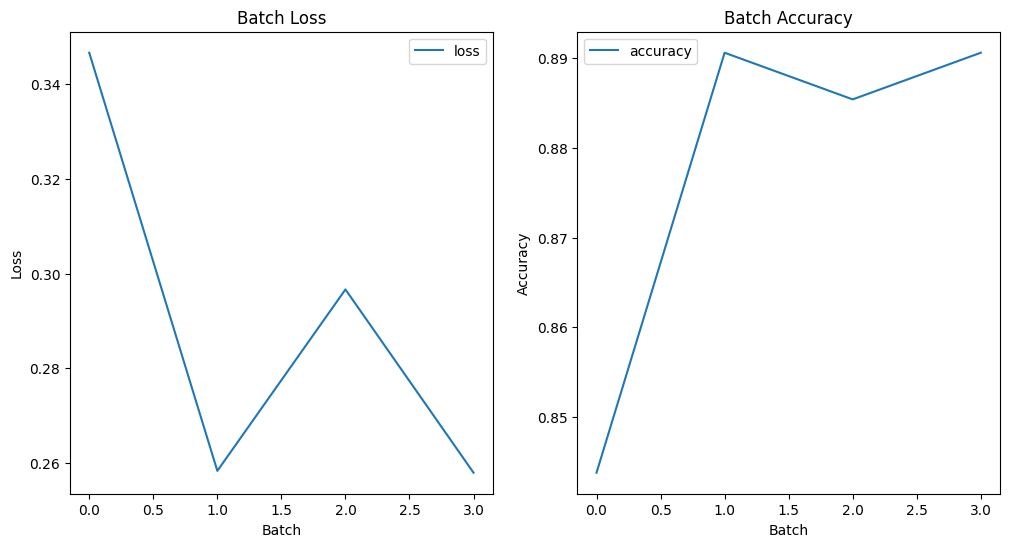

   4/1875 [..............................] - ETA: 30:48 - loss: 0.2580 - accuracy: 0.8906

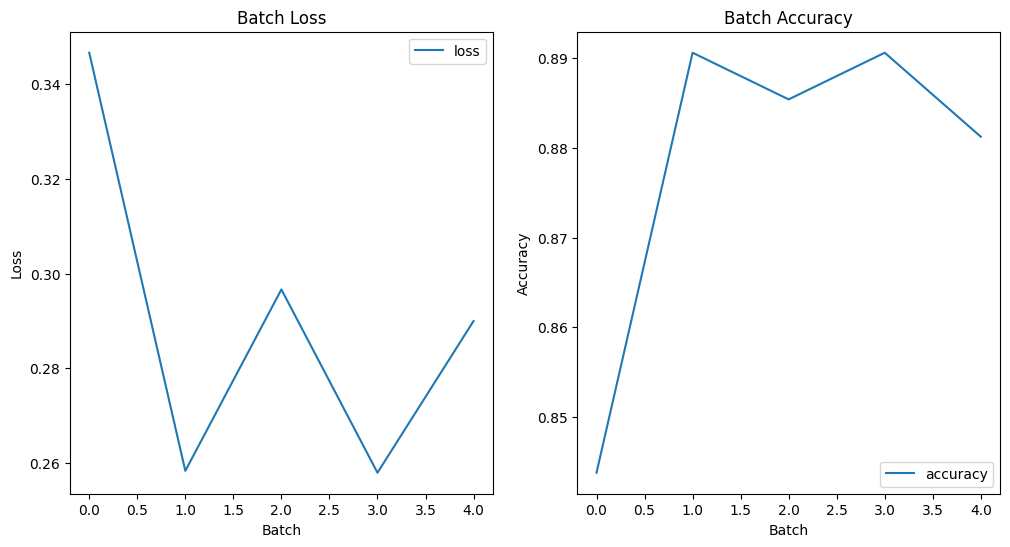

   5/1875 [..............................] - ETA: 29:23 - loss: 0.2900 - accuracy: 0.8813

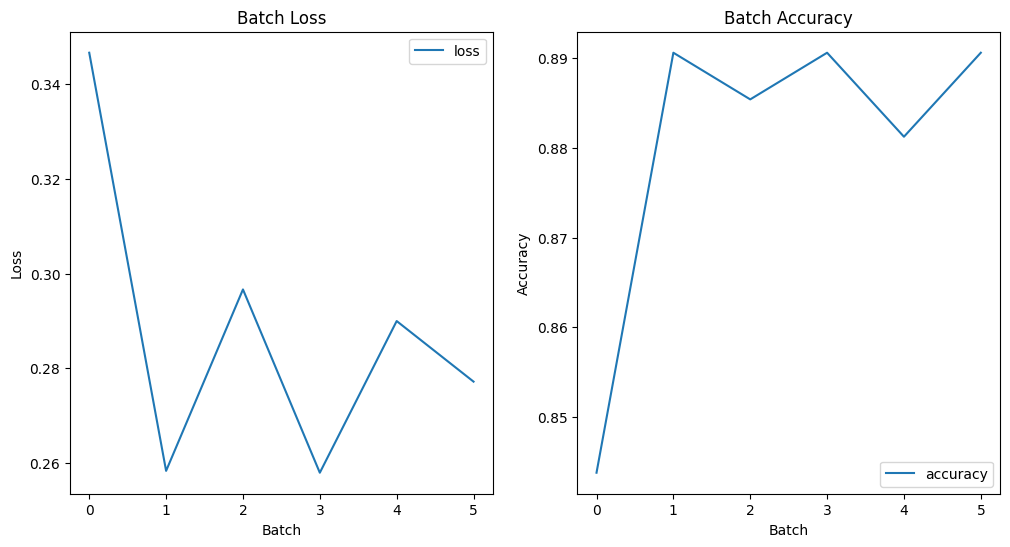

   6/1875 [..............................] - ETA: 28:09 - loss: 0.2772 - accuracy: 0.8906

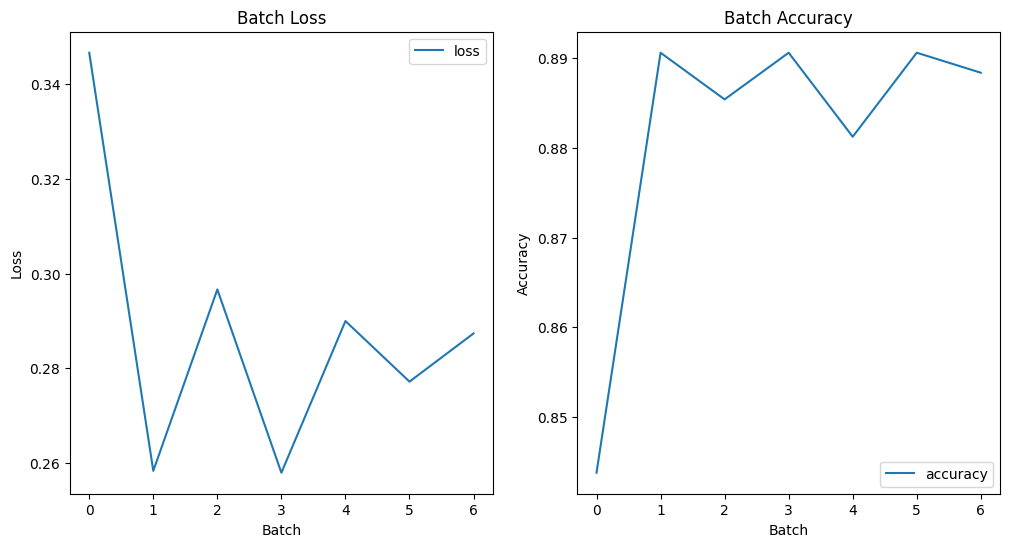

   7/1875 [..............................] - ETA: 27:22 - loss: 0.2874 - accuracy: 0.8884

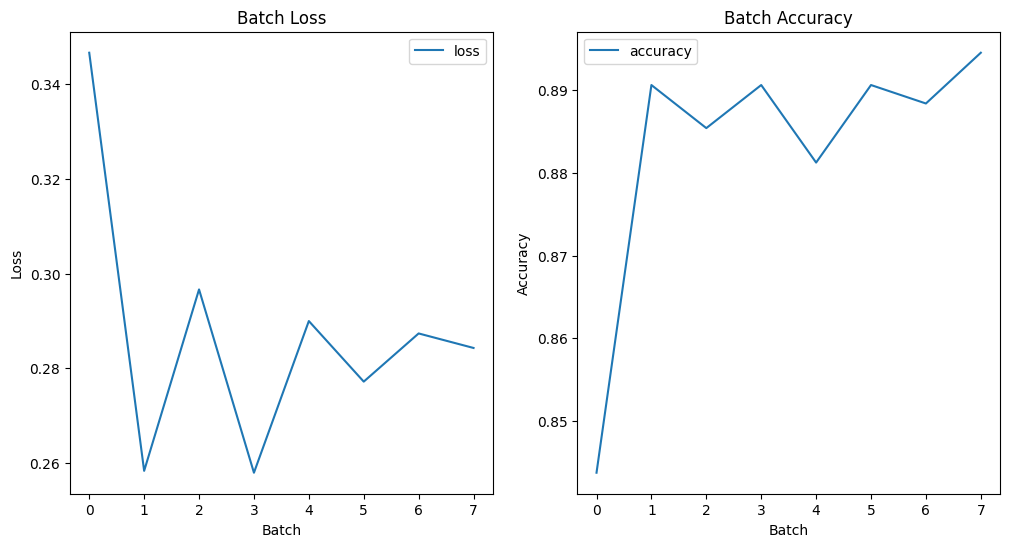

   8/1875 [..............................] - ETA: 26:42 - loss: 0.2843 - accuracy: 0.8945

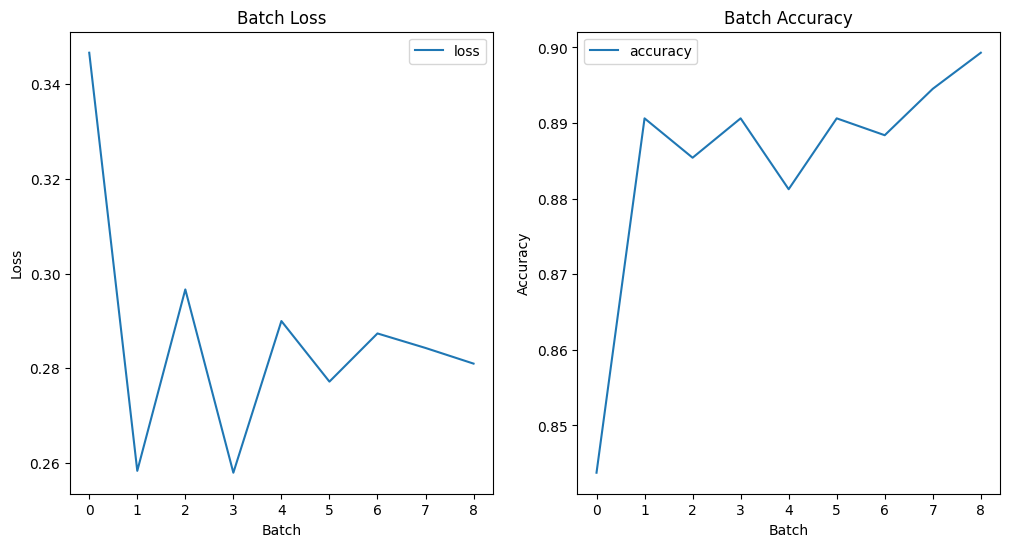

   9/1875 [..............................] - ETA: 26:21 - loss: 0.2810 - accuracy: 0.8993

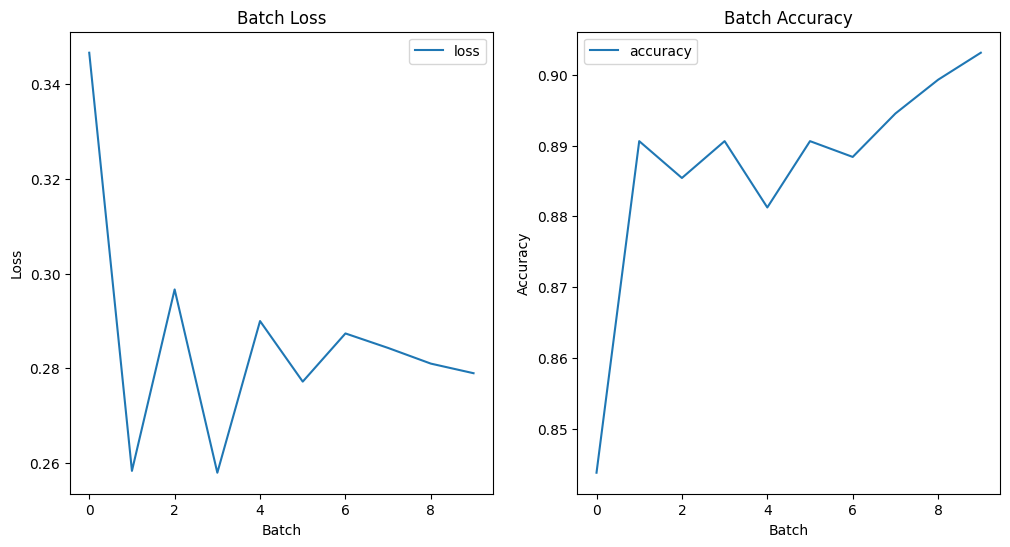

  19/1875 [..............................] - ETA: 13:48 - loss: 0.2626 - accuracy: 0.9013

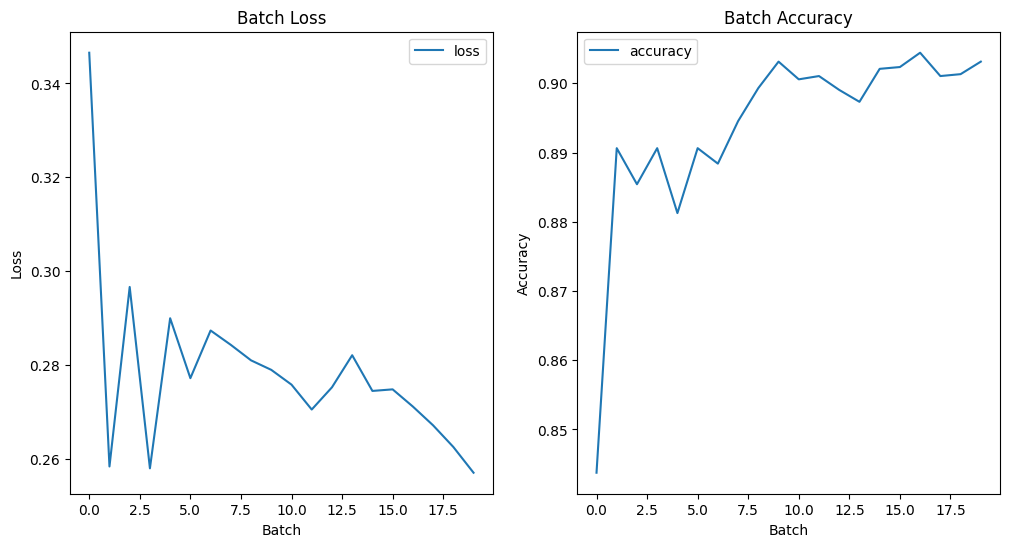

  29/1875 [..............................] - ETA: 10:17 - loss: 0.2665 - accuracy: 0.8966

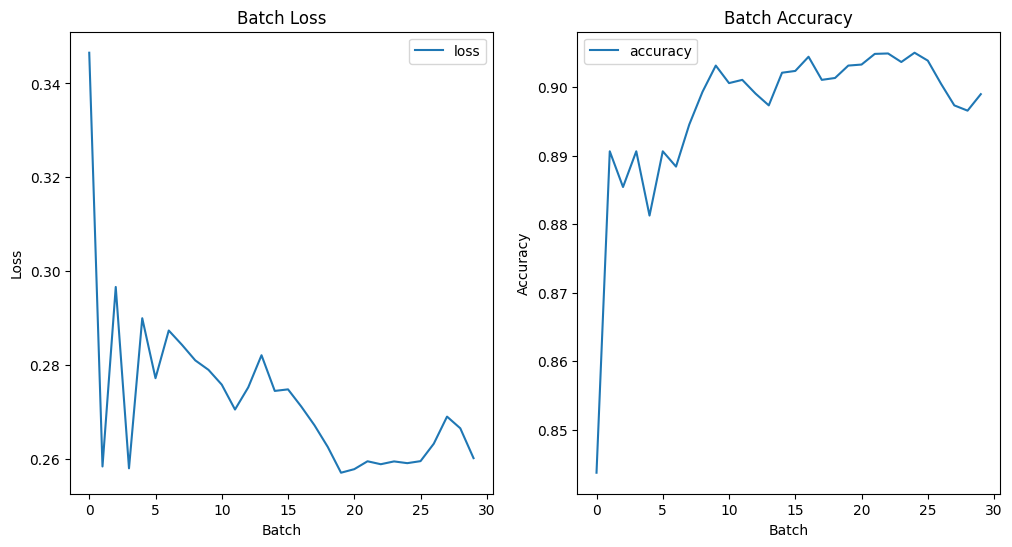

  39/1875 [..............................] - ETA: 8:35 - loss: 0.2453 - accuracy: 0.9071

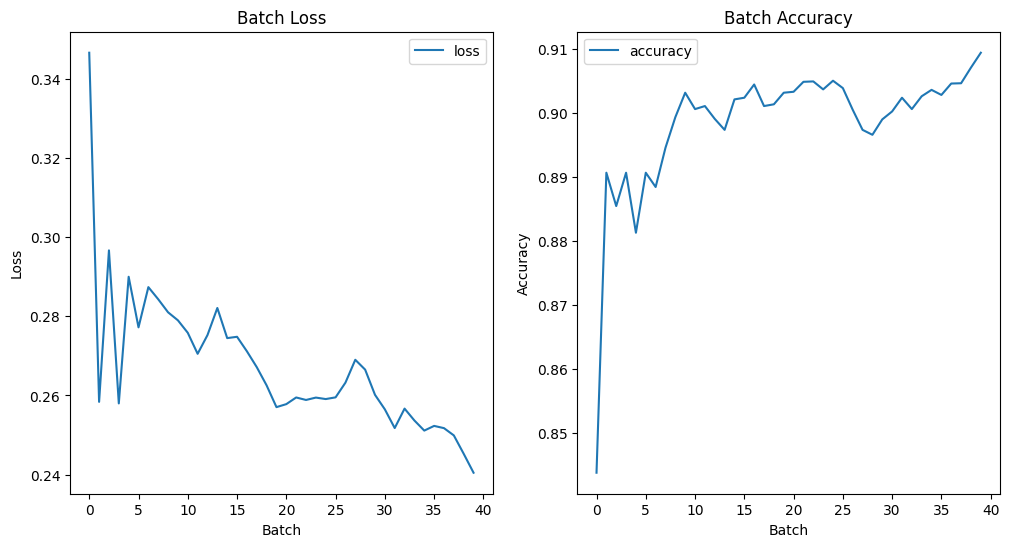

  49/1875 [..............................] - ETA: 7:37 - loss: 0.2489 - accuracy: 0.9088

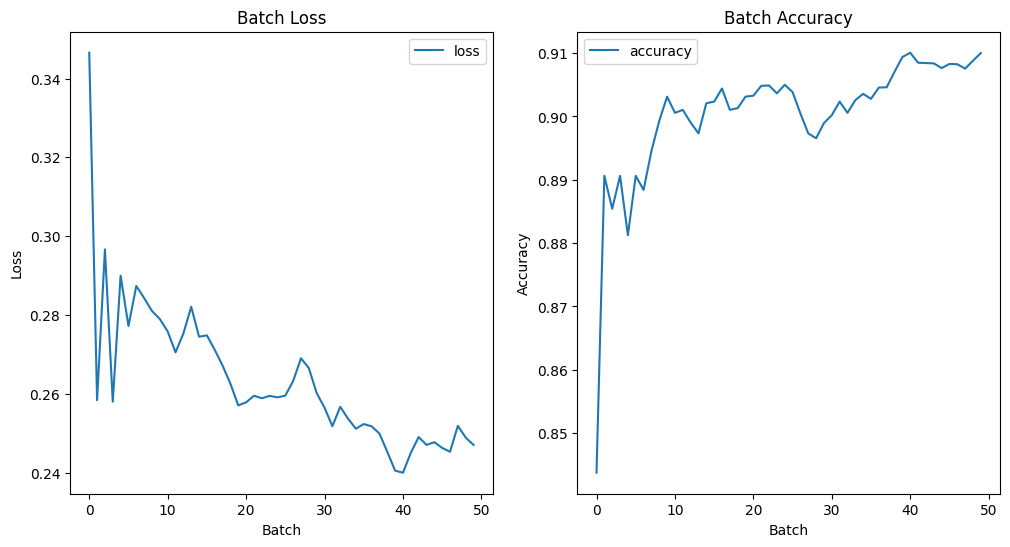

  59/1875 [..............................] - ETA: 7:00 - loss: 0.2374 - accuracy: 0.9084

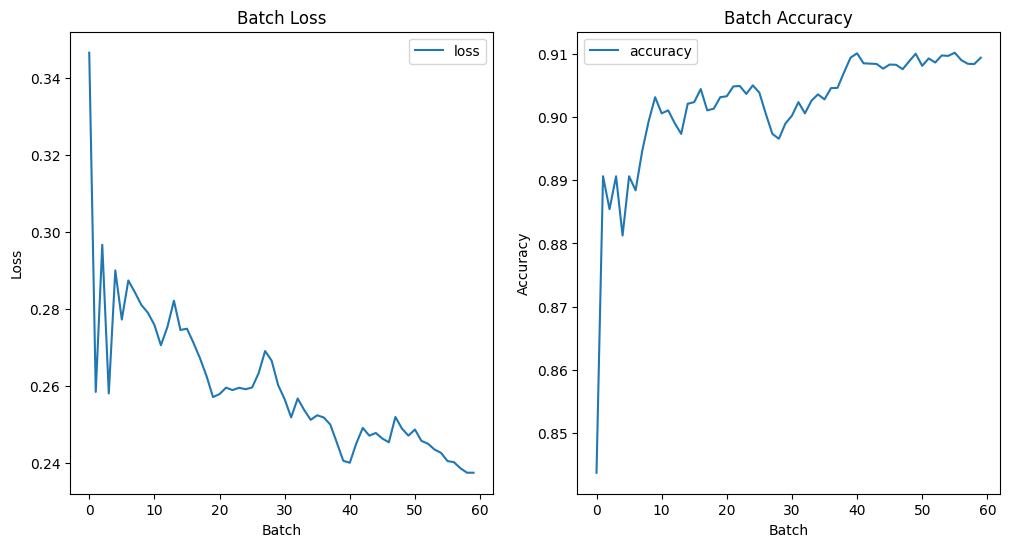

  69/1875 [>.............................] - ETA: 6:34 - loss: 0.2421 - accuracy: 0.9112

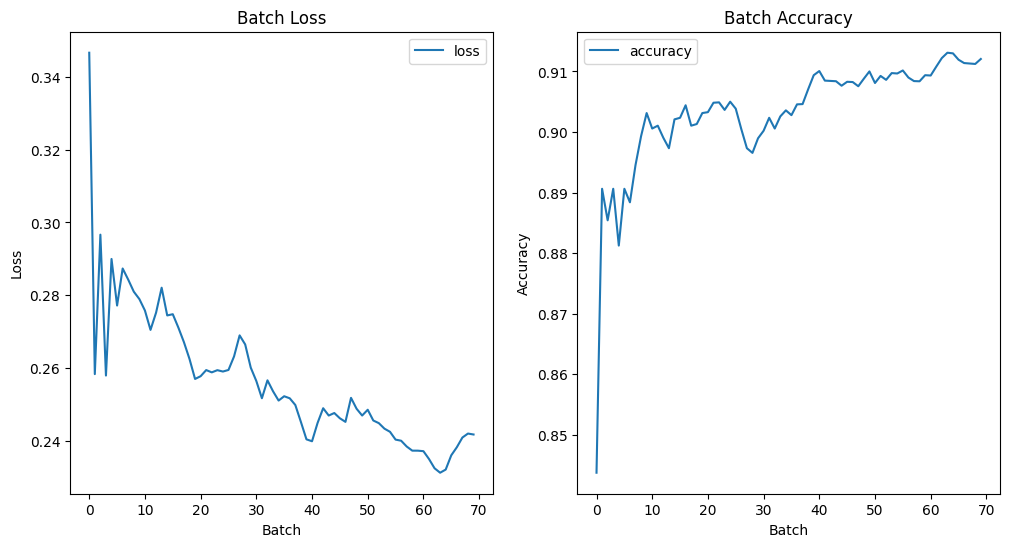

  79/1875 [>.............................] - ETA: 6:17 - loss: 0.2354 - accuracy: 0.9165

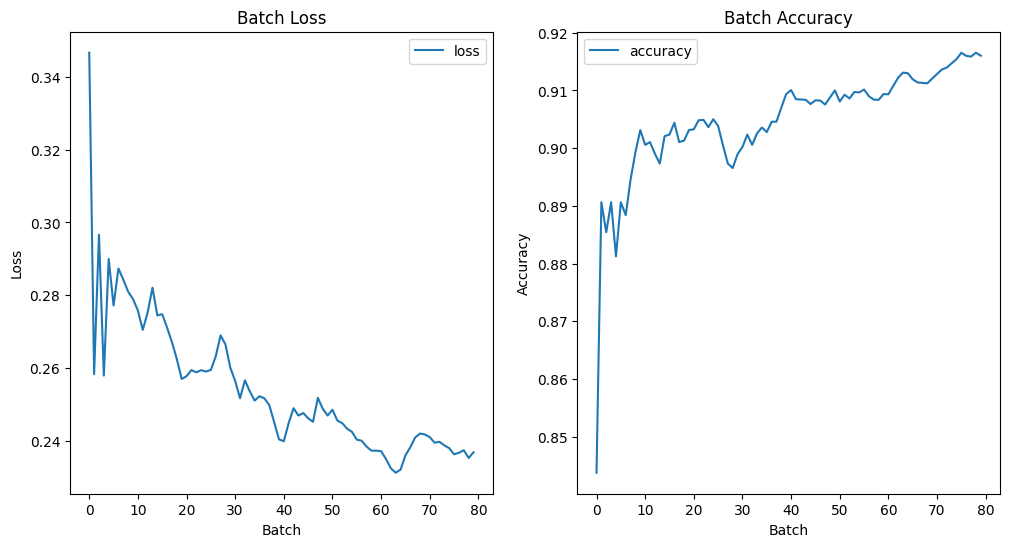

  89/1875 [>.............................] - ETA: 6:02 - loss: 0.2335 - accuracy: 0.9161

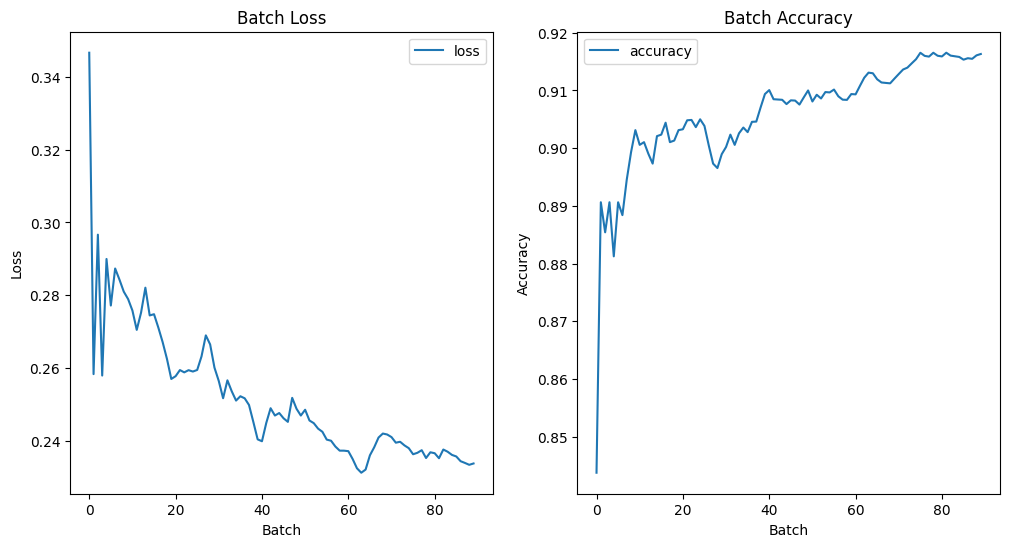

  99/1875 [>.............................] - ETA: 5:49 - loss: 0.2339 - accuracy: 0.9154

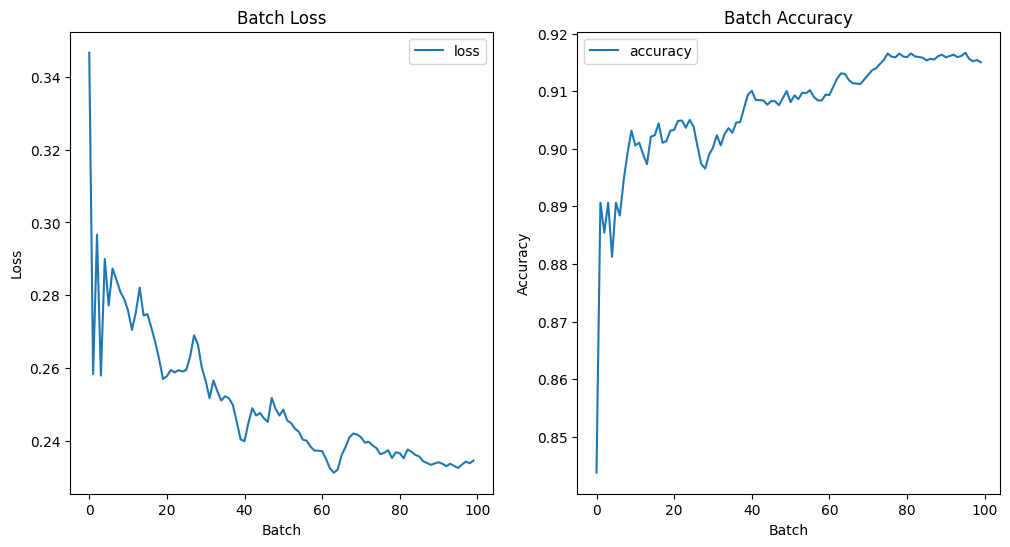

 199/1875 [==>...........................] - ETA: 3:44 - loss: 0.2439 - accuracy: 0.9106

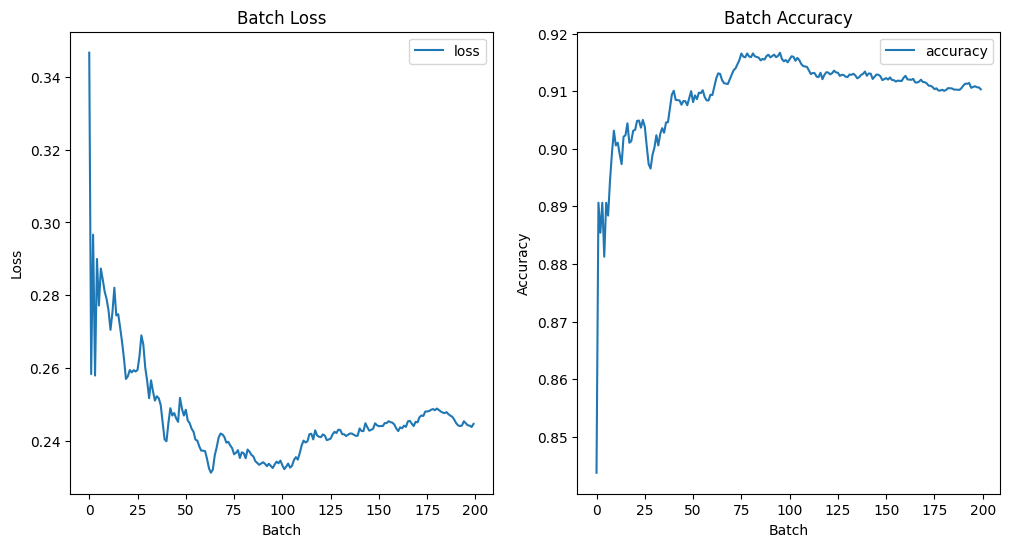

 299/1875 [===>..........................] - ETA: 2:57 - loss: 0.2479 - accuracy: 0.9096

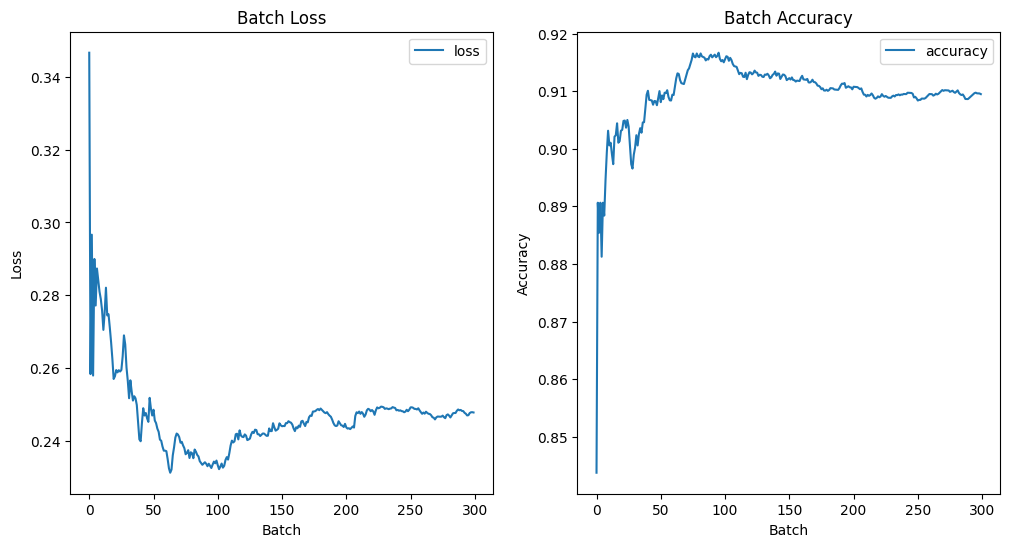

 399/1875 [=====>........................] - ETA: 2:31 - loss: 0.2447 - accuracy: 0.9110

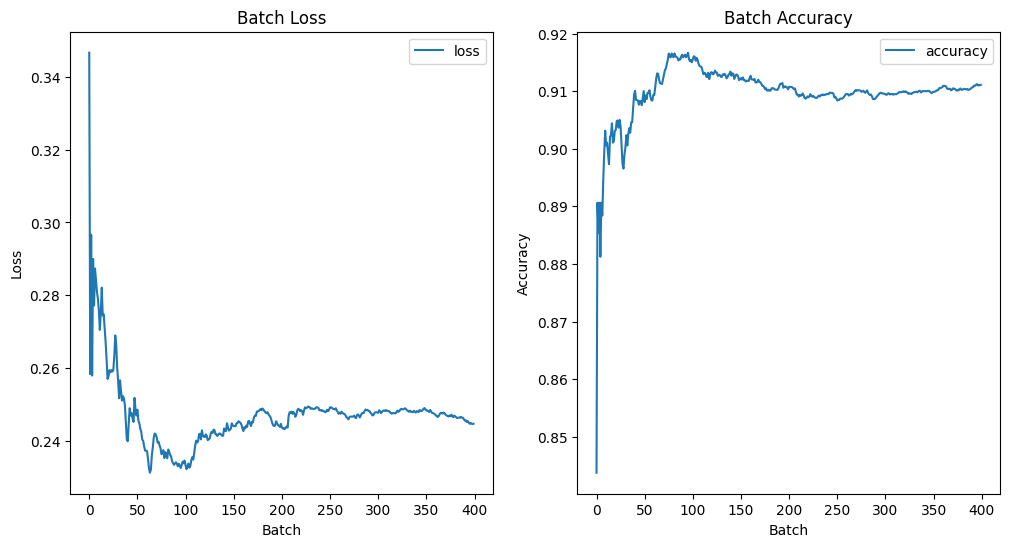

 499/1875 [======>.......................] - ETA: 2:11 - loss: 0.2453 - accuracy: 0.9109

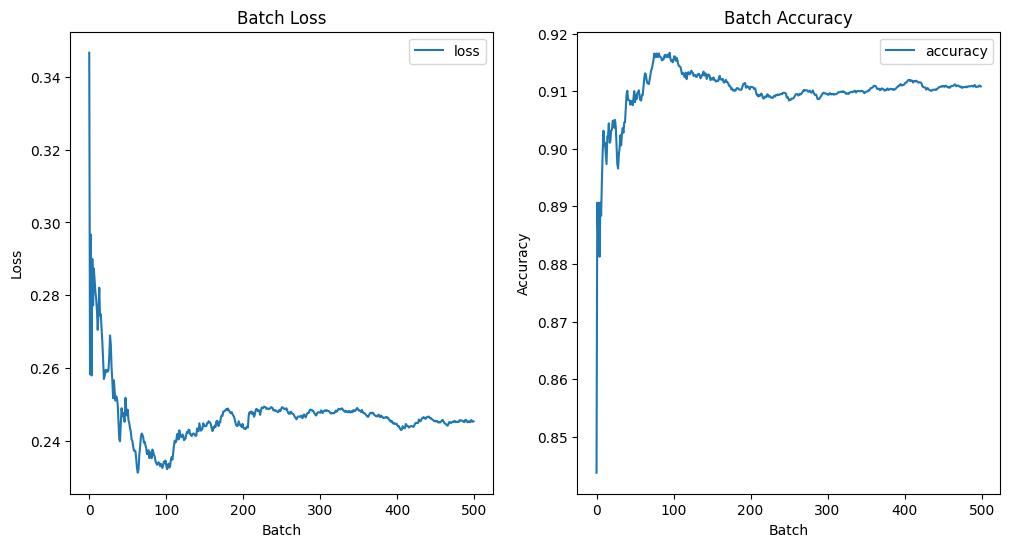

 599/1875 [========>.....................] - ETA: 1:55 - loss: 0.2485 - accuracy: 0.9095

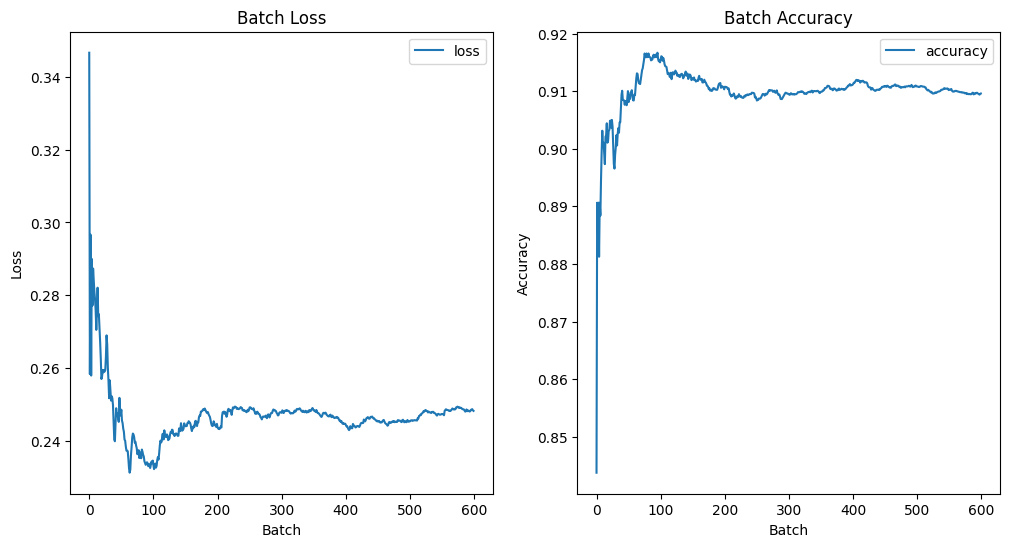

 699/1875 [==========>...................] - ETA: 1:42 - loss: 0.2474 - accuracy: 0.9101

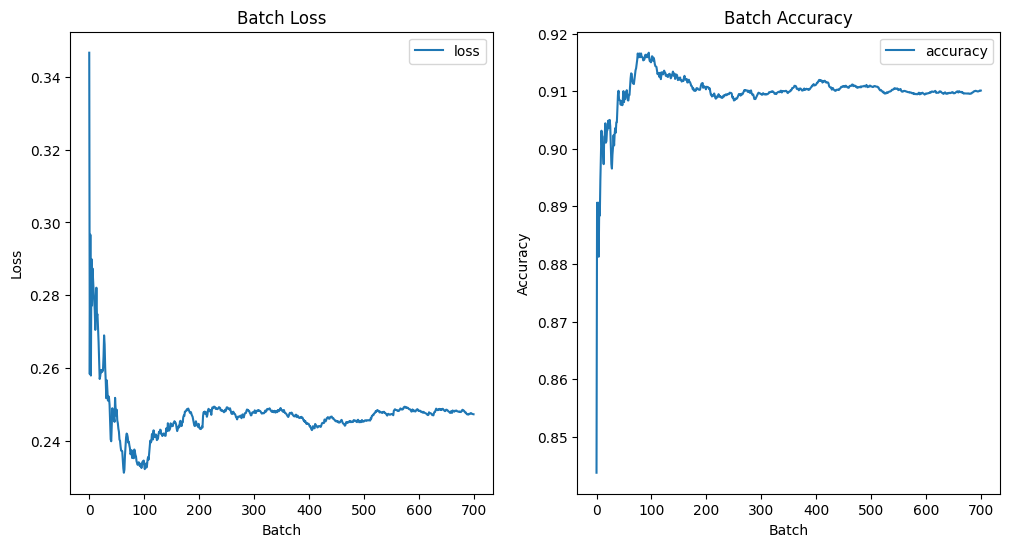

 799/1875 [===========>..................] - ETA: 1:31 - loss: 0.2476 - accuracy: 0.9098

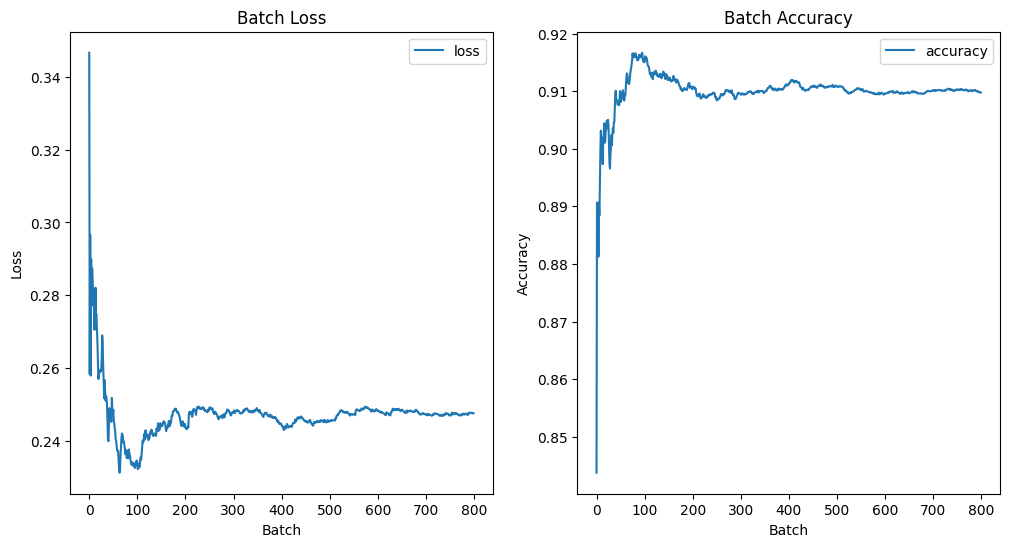

 899/1875 [=============>................] - ETA: 1:21 - loss: 0.2493 - accuracy: 0.9089

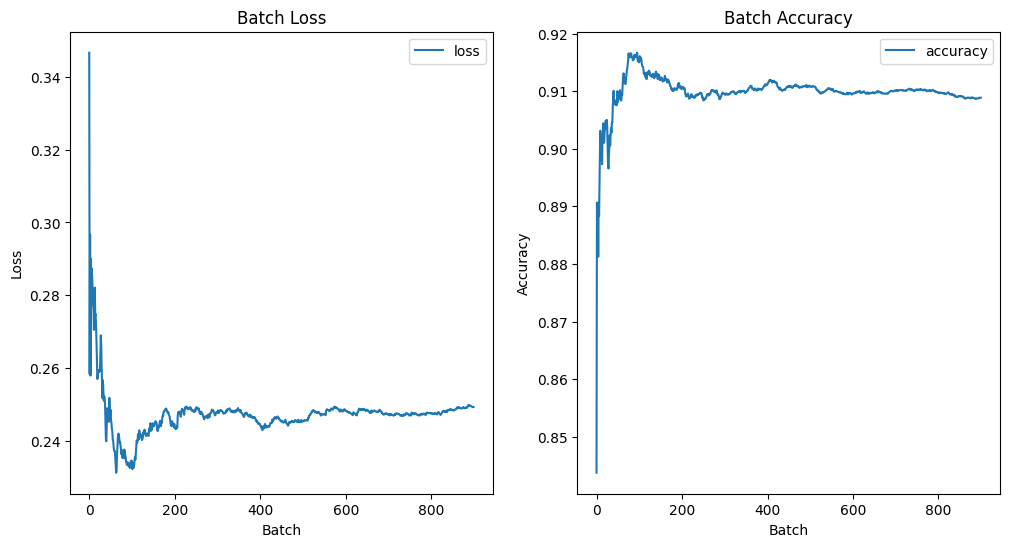

 999/1875 [==============>...............] - ETA: 1:11 - loss: 0.2475 - accuracy: 0.9098

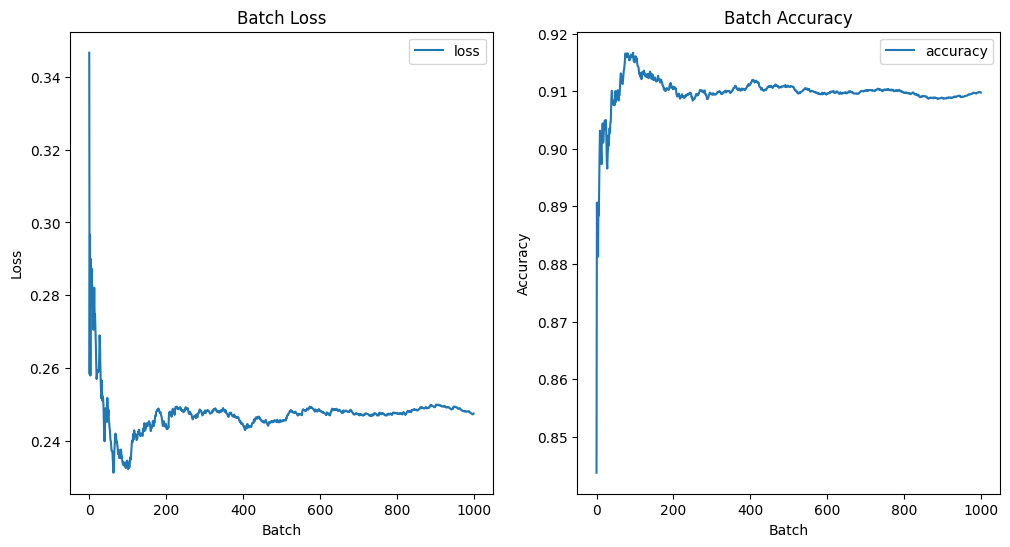

1875/1875 [==============================] - ETA: 0s - loss: 0.2481 - accuracy: 0.9090

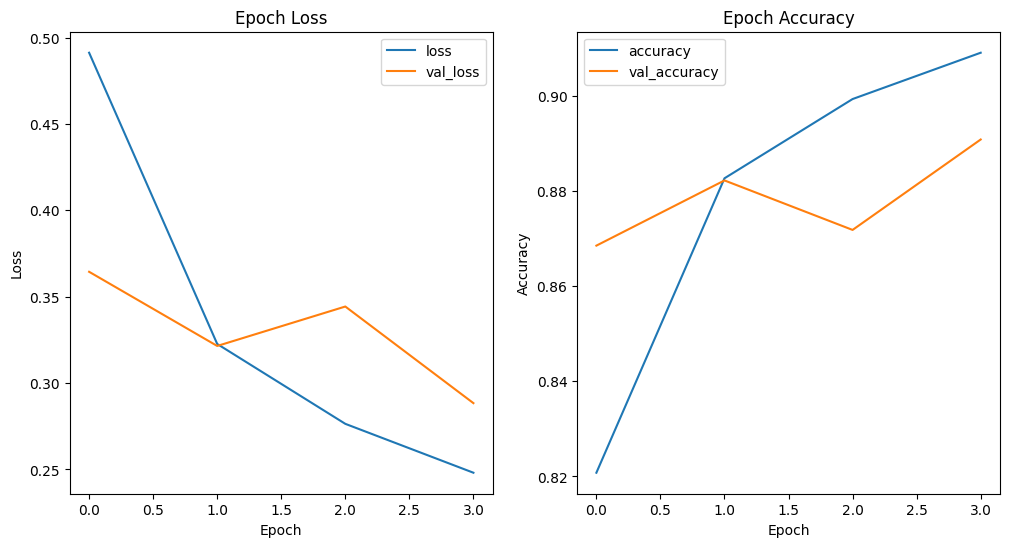

1875/1875 [==============================] - 145s 77ms/step - loss: 0.2481 - accuracy: 0.9090 - val_loss: 0.2884 - val_accuracy: 0.8908
Epoch 5/5


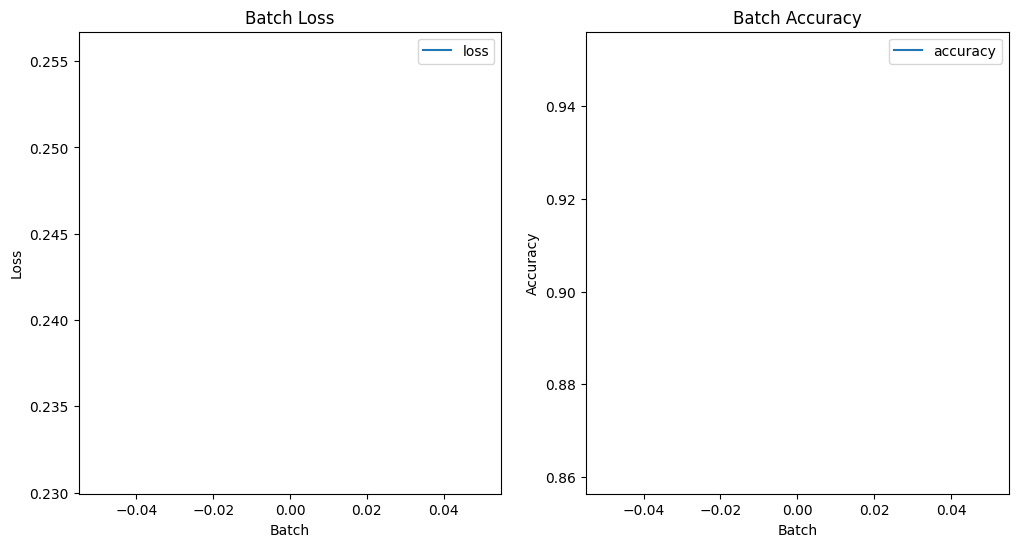

   1/1875 [..............................] - ETA: 29:51 - loss: 0.2433 - accuracy: 0.9062

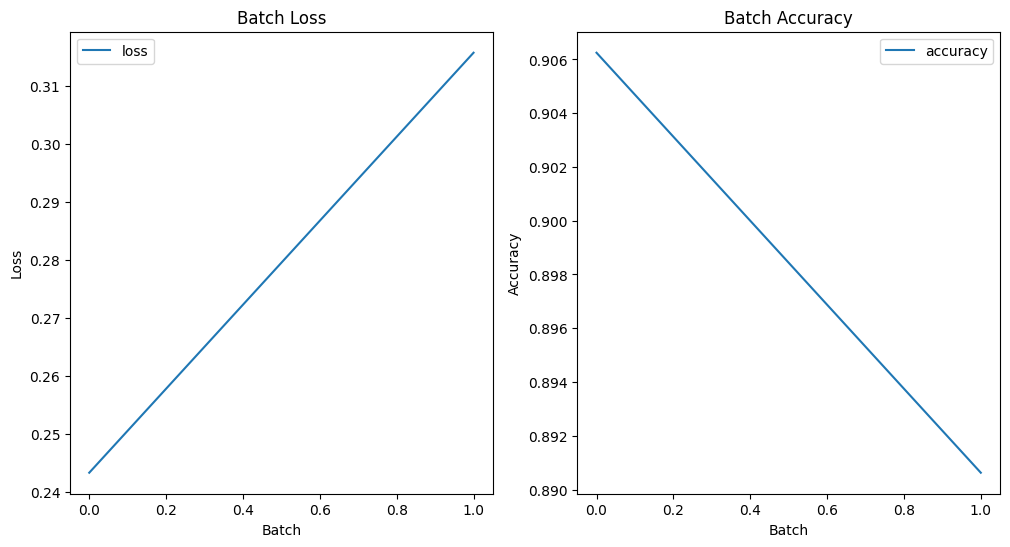

   2/1875 [..............................] - ETA: 30:52 - loss: 0.3158 - accuracy: 0.8906

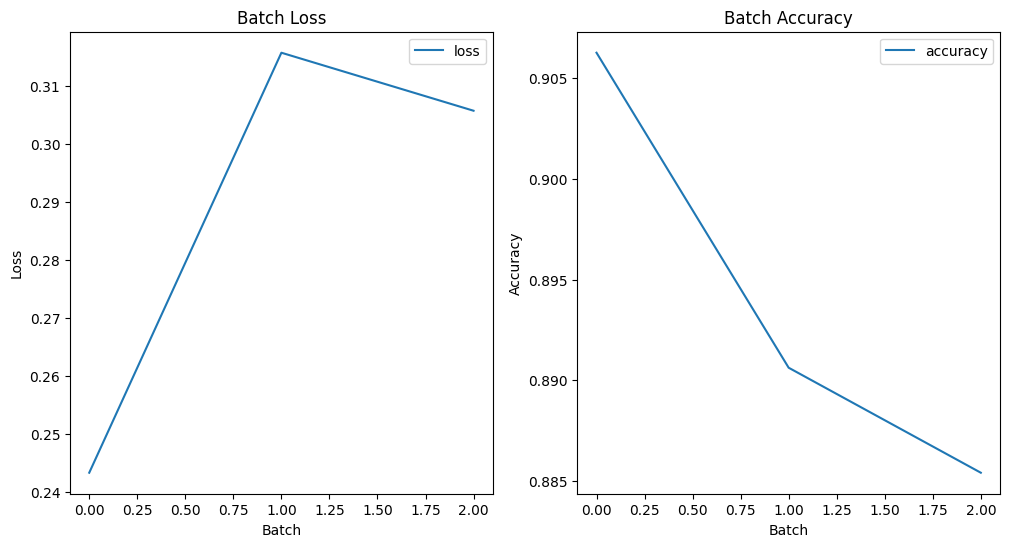

   3/1875 [..............................] - ETA: 29:39 - loss: 0.3057 - accuracy: 0.8854

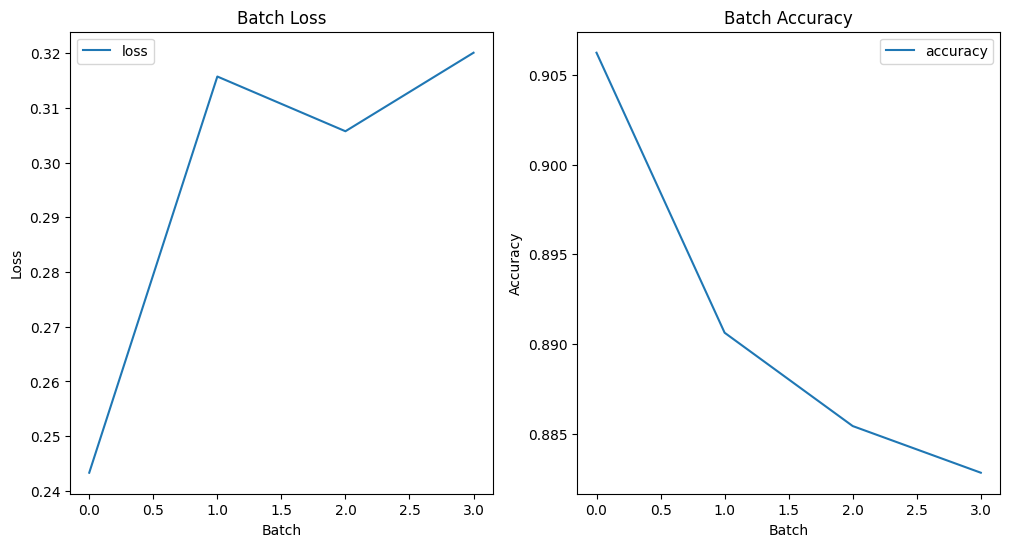

   4/1875 [..............................] - ETA: 29:57 - loss: 0.3201 - accuracy: 0.8828

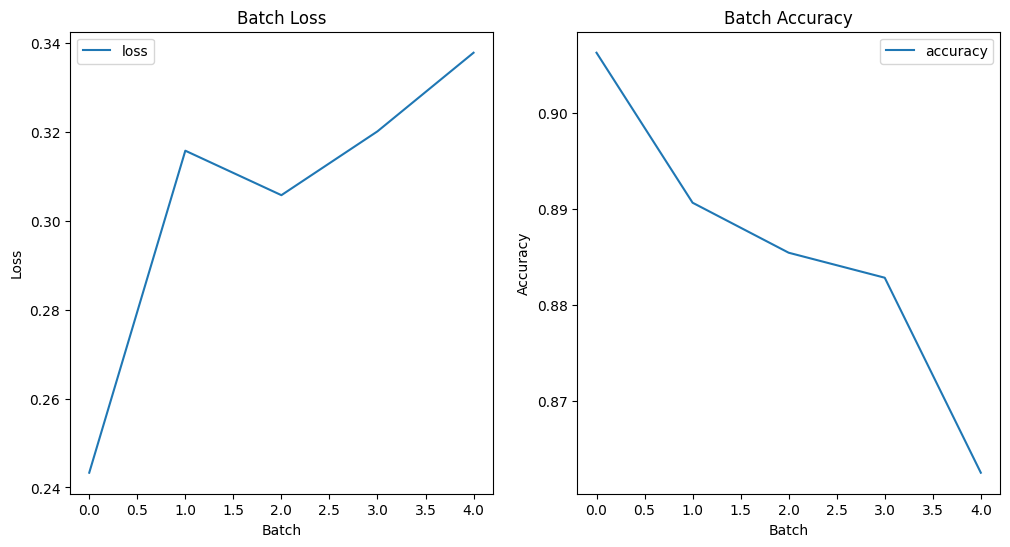

   5/1875 [..............................] - ETA: 30:16 - loss: 0.3378 - accuracy: 0.8625

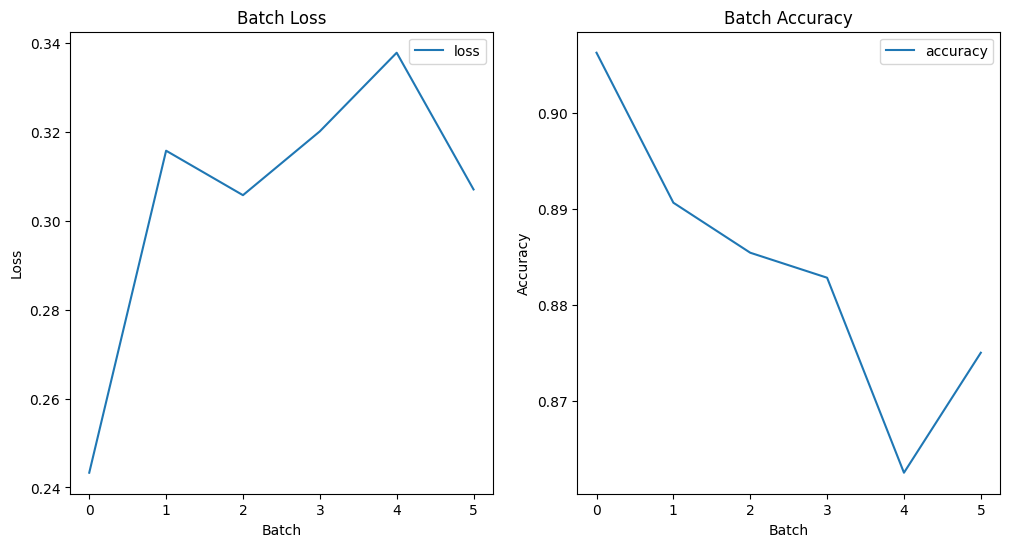

   6/1875 [..............................] - ETA: 30:12 - loss: 0.3070 - accuracy: 0.8750

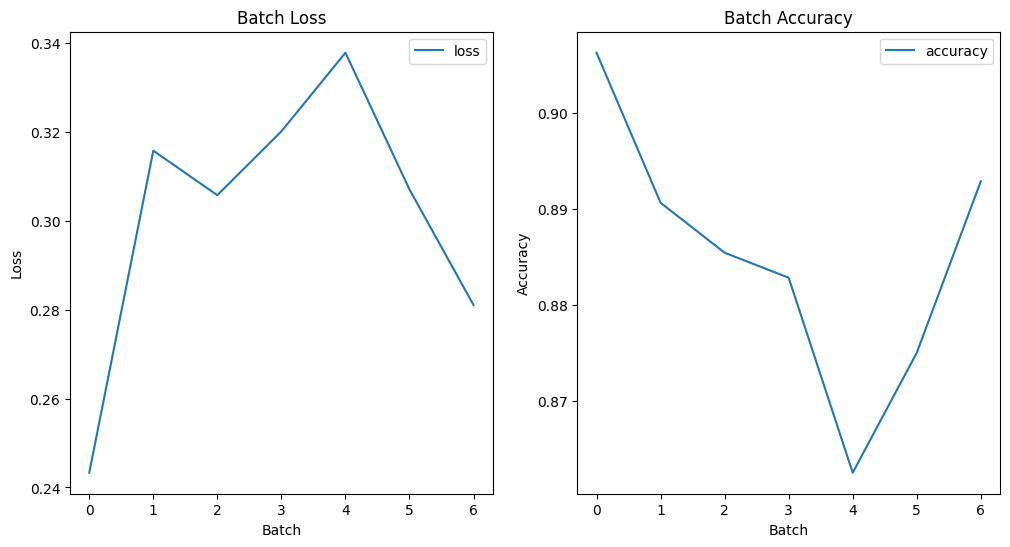

   7/1875 [..............................] - ETA: 29:06 - loss: 0.2810 - accuracy: 0.8929

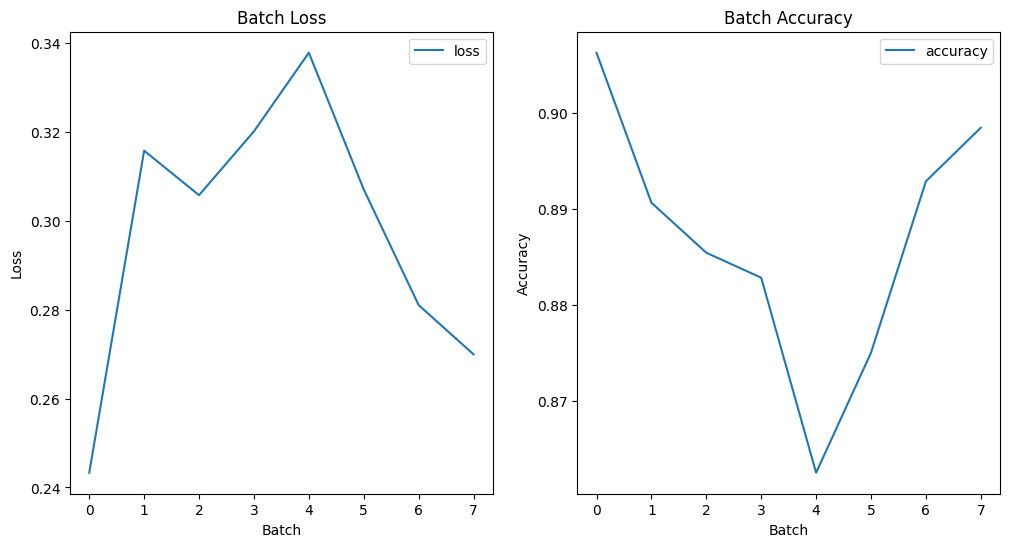

   8/1875 [..............................] - ETA: 30:44 - loss: 0.2699 - accuracy: 0.8984

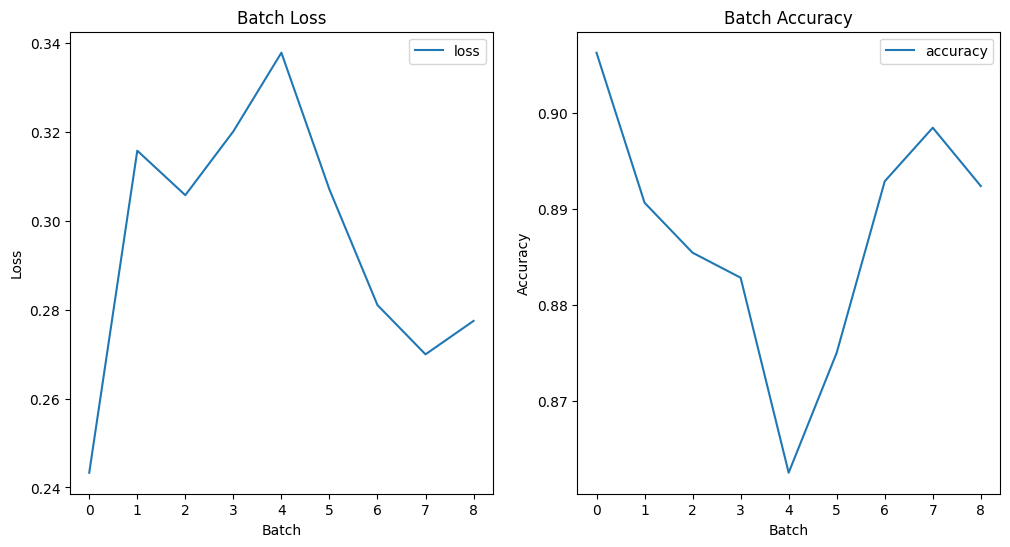

   9/1875 [..............................] - ETA: 29:50 - loss: 0.2775 - accuracy: 0.8924

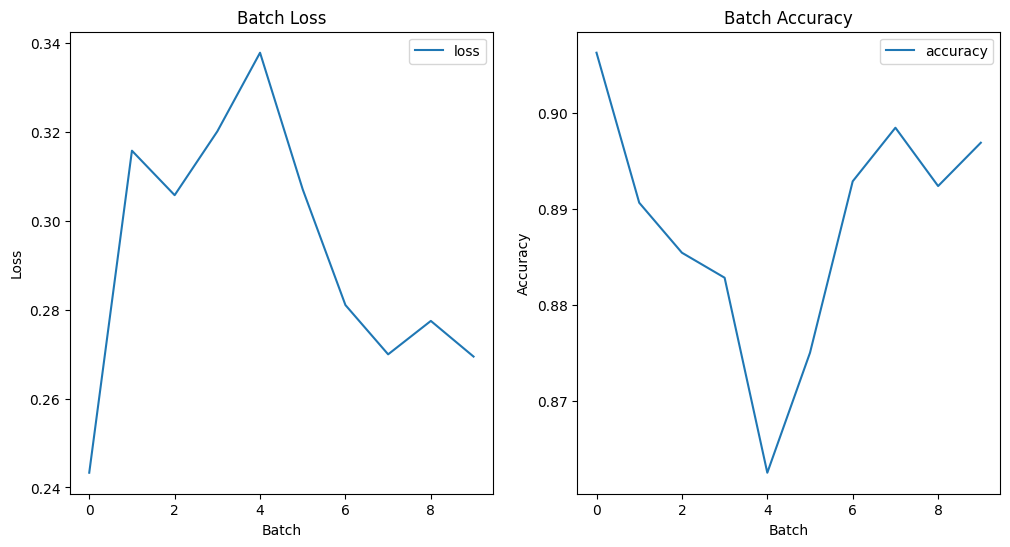

  18/1875 [..............................] - ETA: 16:06 - loss: 0.2698 - accuracy: 0.8976

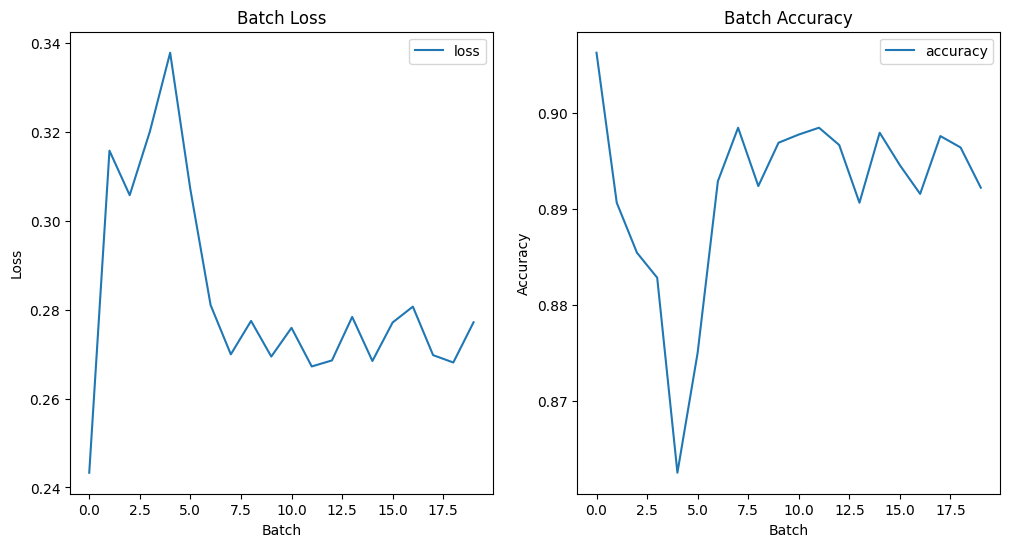

  29/1875 [..............................] - ETA: 11:16 - loss: 0.2500 - accuracy: 0.9084

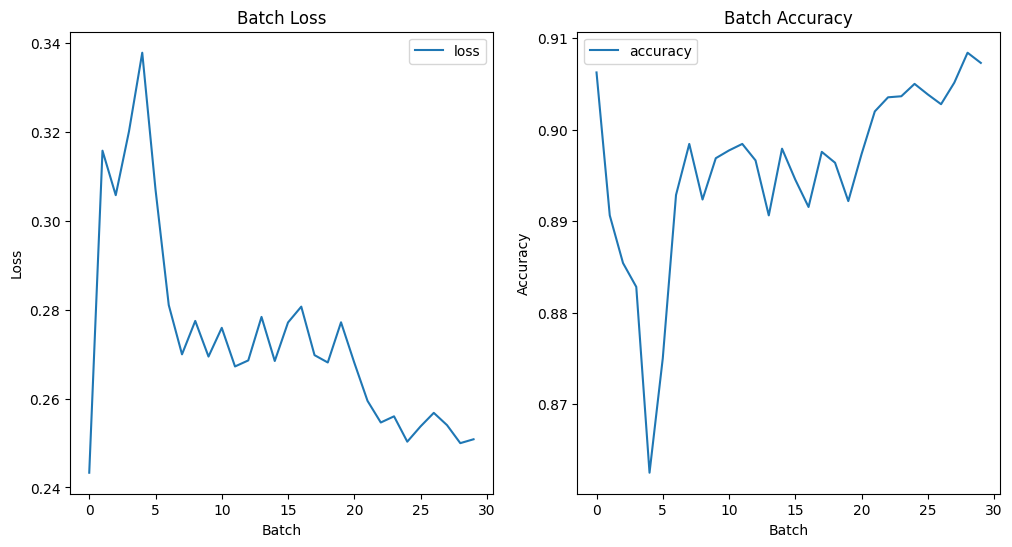

  39/1875 [..............................] - ETA: 9:17 - loss: 0.2354 - accuracy: 0.9127

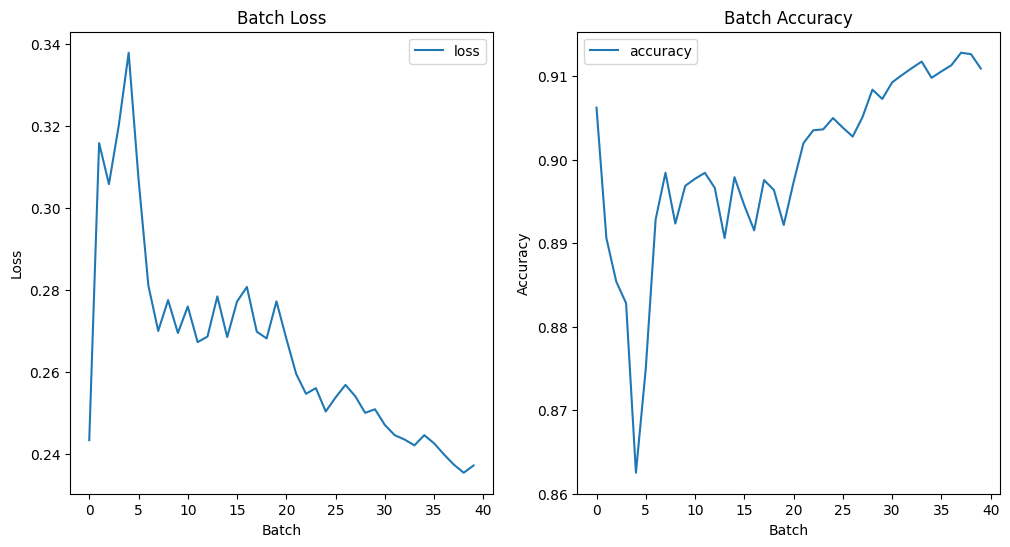

  49/1875 [..............................] - ETA: 8:08 - loss: 0.2444 - accuracy: 0.9082

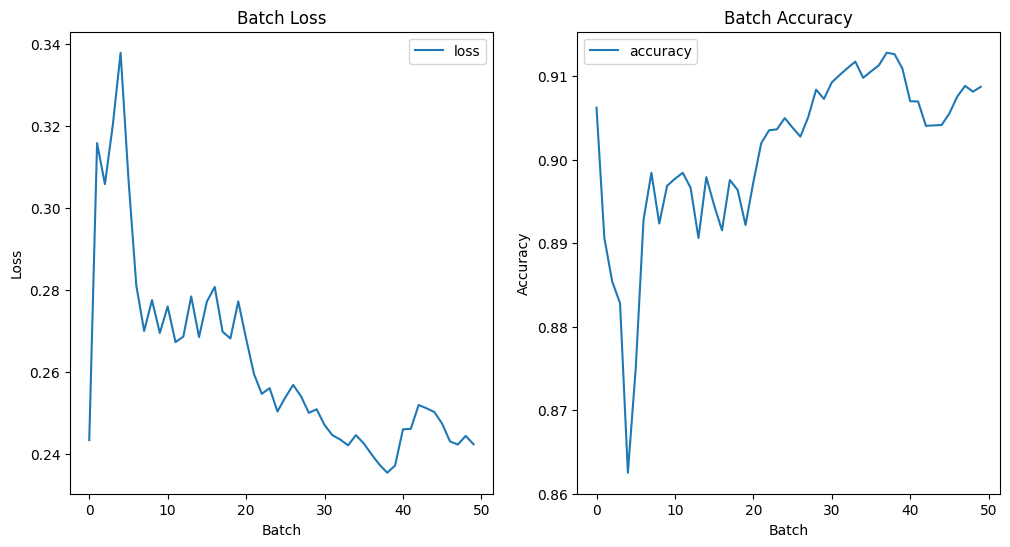

  59/1875 [..............................] - ETA: 7:22 - loss: 0.2409 - accuracy: 0.9073

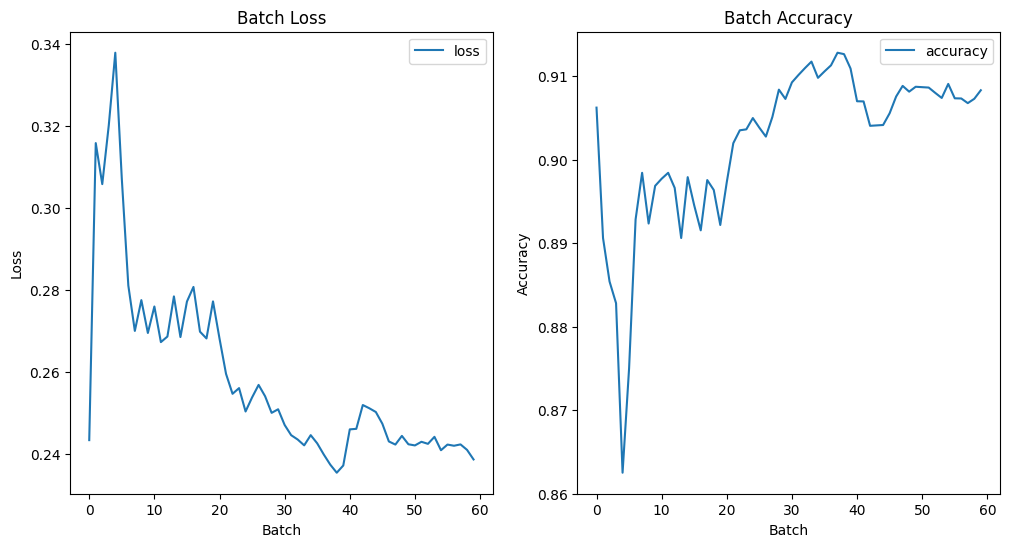

  69/1875 [>.............................] - ETA: 6:51 - loss: 0.2370 - accuracy: 0.9103

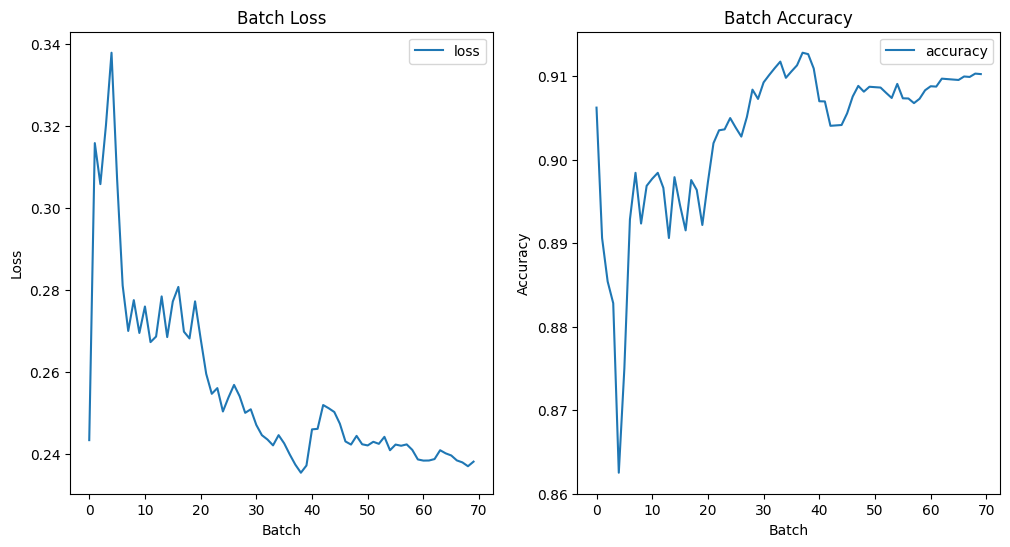

  79/1875 [>.............................] - ETA: 6:26 - loss: 0.2287 - accuracy: 0.9138

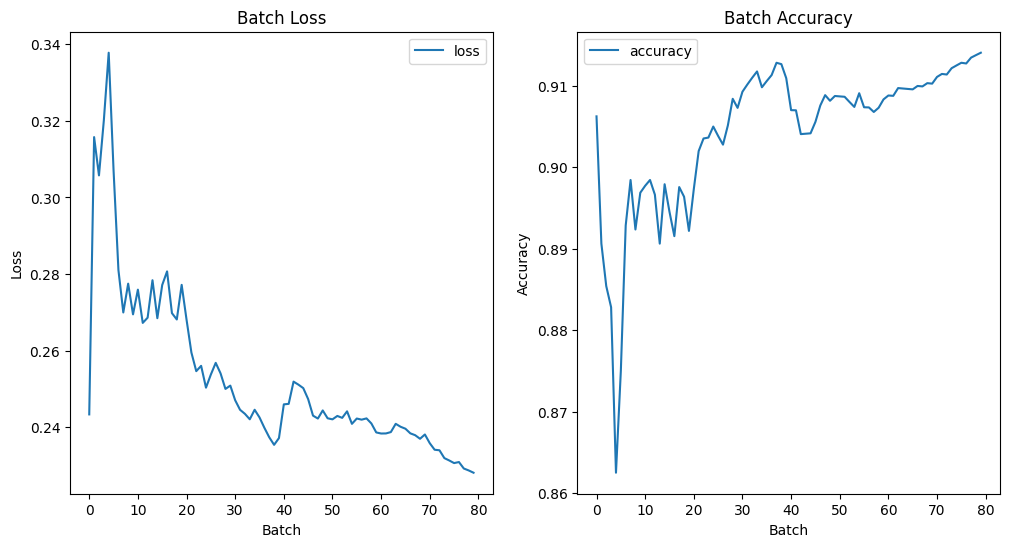

  89/1875 [>.............................] - ETA: 6:06 - loss: 0.2271 - accuracy: 0.9154

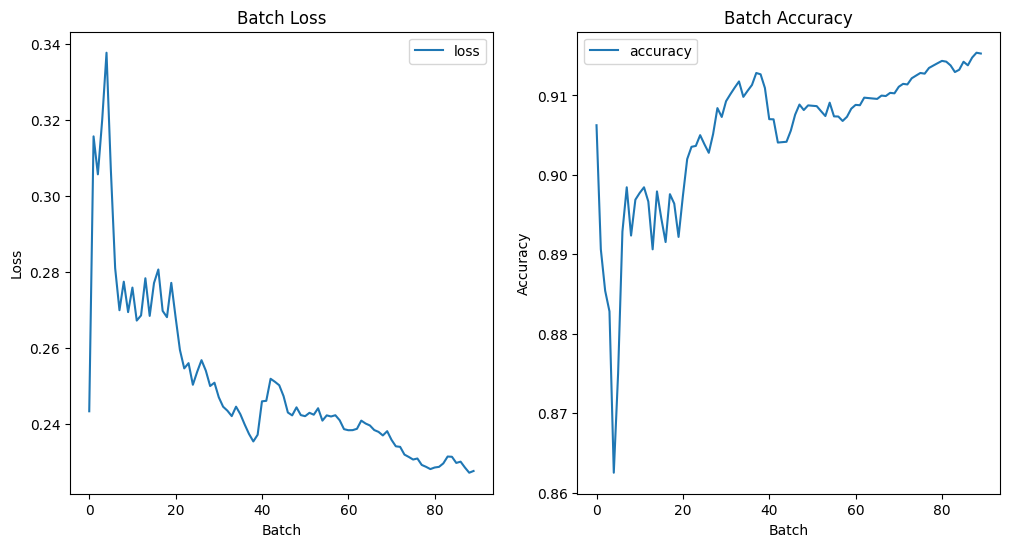

  99/1875 [>.............................] - ETA: 5:50 - loss: 0.2293 - accuracy: 0.9135

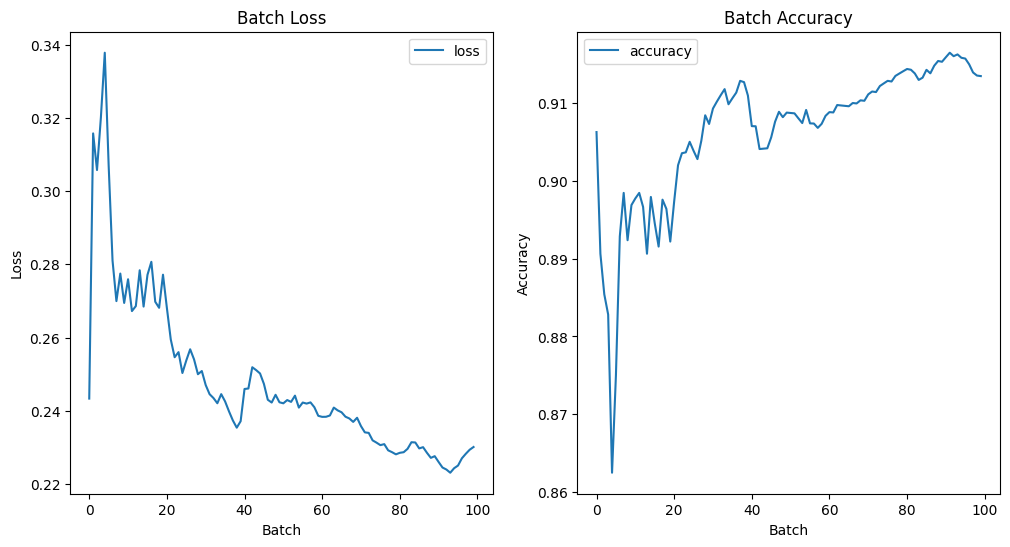

 199/1875 [==>...........................] - ETA: 3:44 - loss: 0.2369 - accuracy: 0.9110

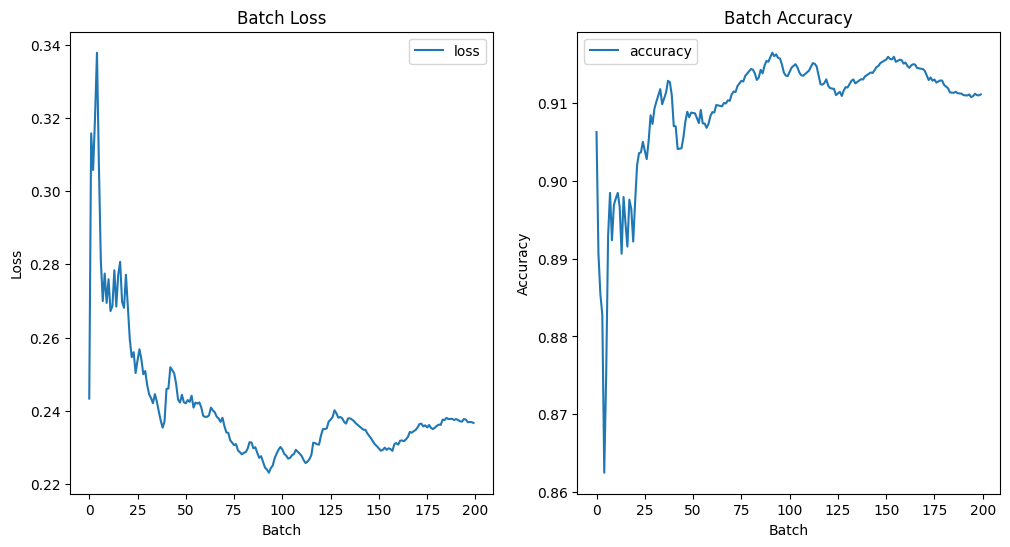

 299/1875 [===>..........................] - ETA: 2:55 - loss: 0.2321 - accuracy: 0.9126

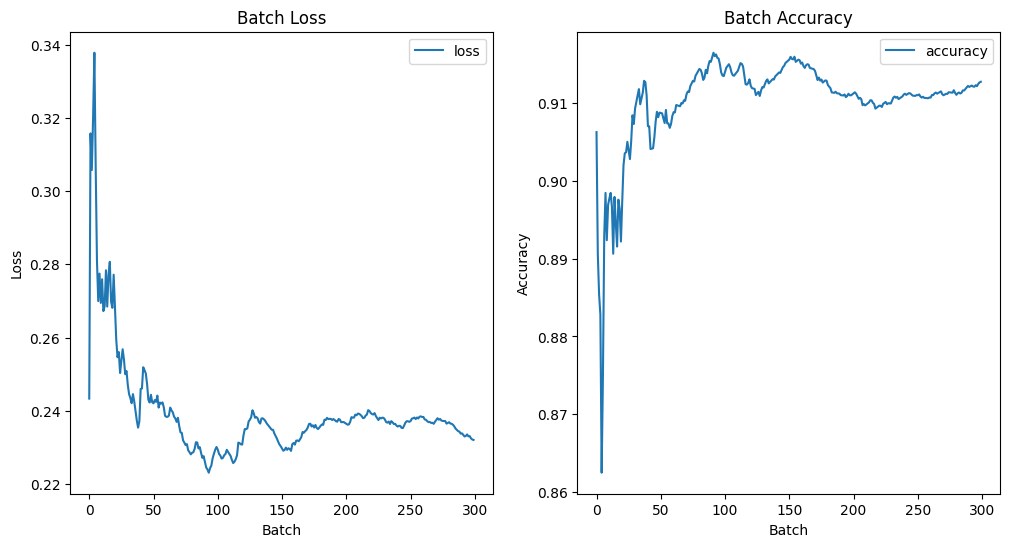

 399/1875 [=====>........................] - ETA: 2:28 - loss: 0.2238 - accuracy: 0.9167

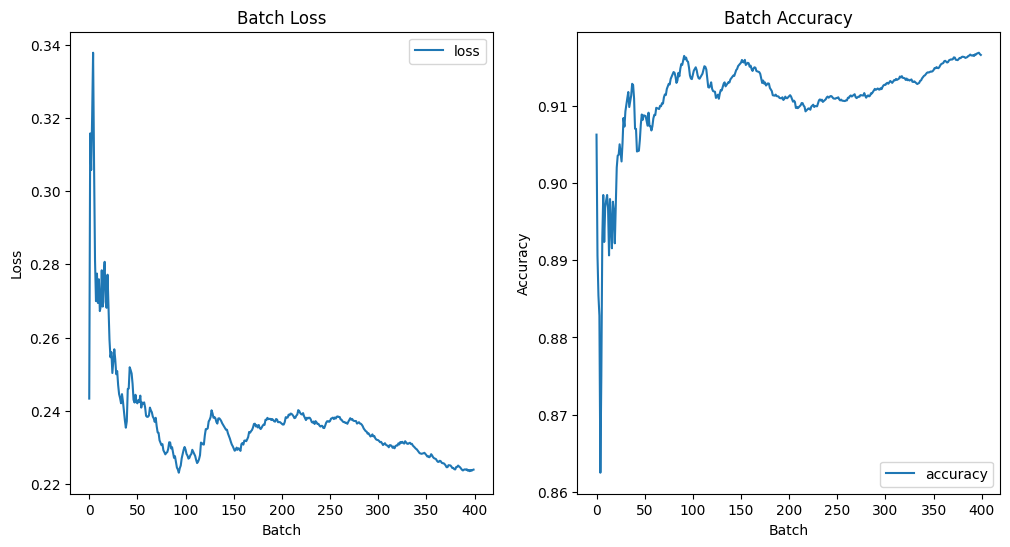

 499/1875 [======>.......................] - ETA: 2:10 - loss: 0.2230 - accuracy: 0.9170

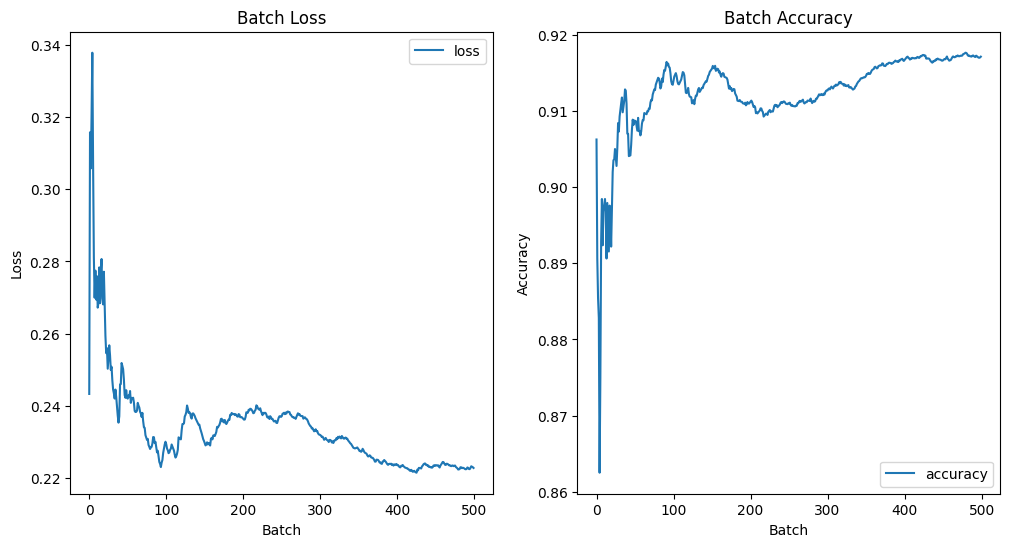

 599/1875 [========>.....................] - ETA: 1:55 - loss: 0.2215 - accuracy: 0.9179

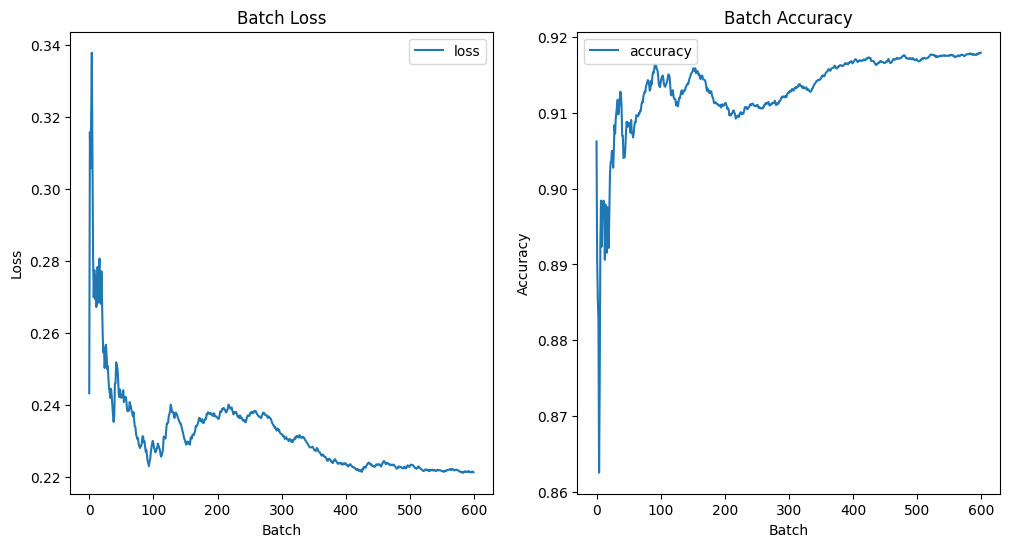

 699/1875 [==========>...................] - ETA: 1:42 - loss: 0.2229 - accuracy: 0.9172

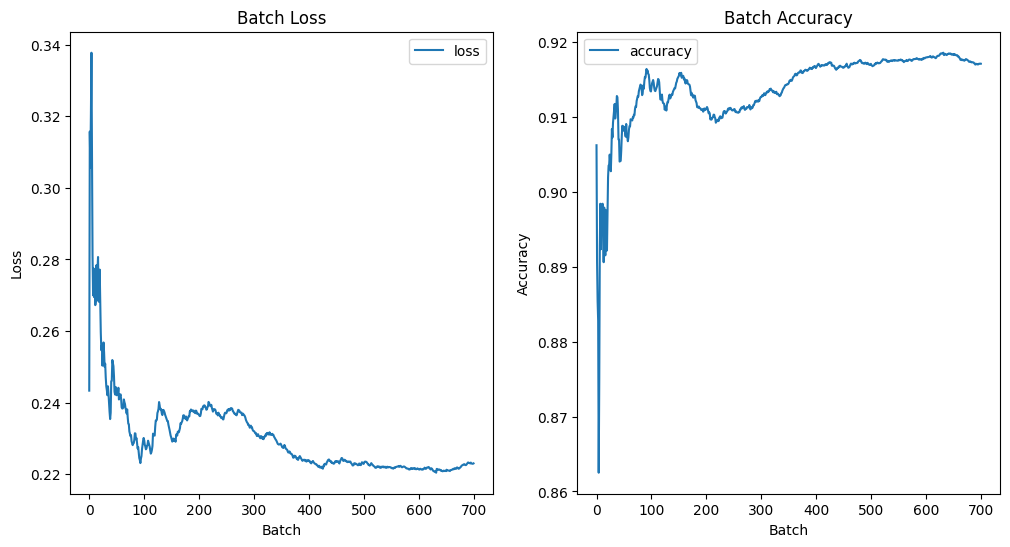

 799/1875 [===========>..................] - ETA: 1:32 - loss: 0.2240 - accuracy: 0.9160

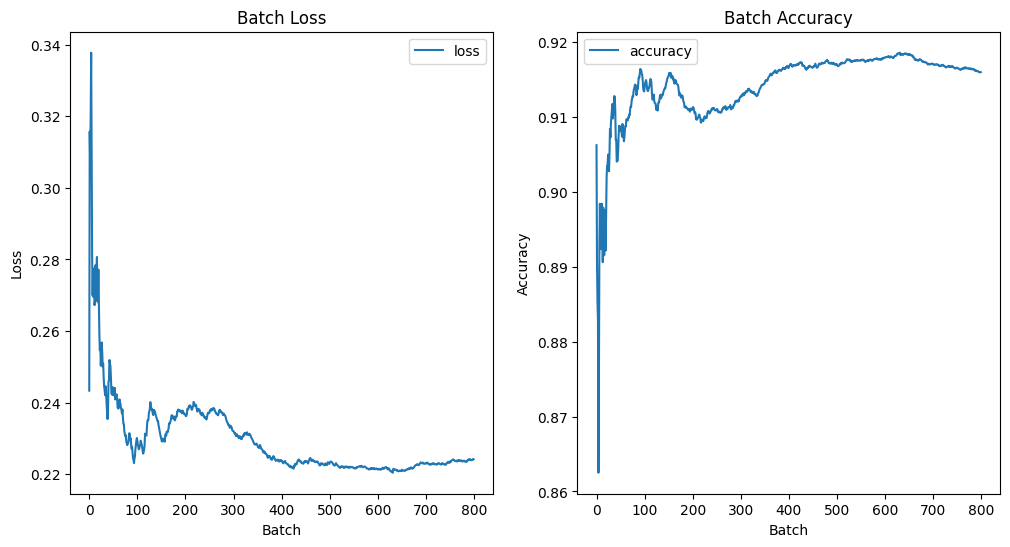

 899/1875 [=============>................] - ETA: 1:21 - loss: 0.2219 - accuracy: 0.9174

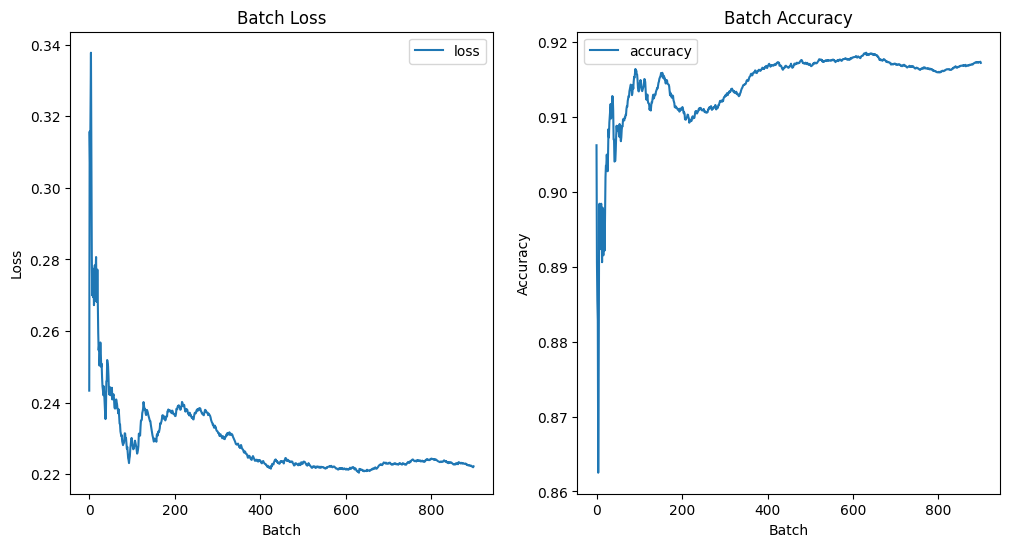

 999/1875 [==============>...............] - ETA: 1:11 - loss: 0.2226 - accuracy: 0.9175

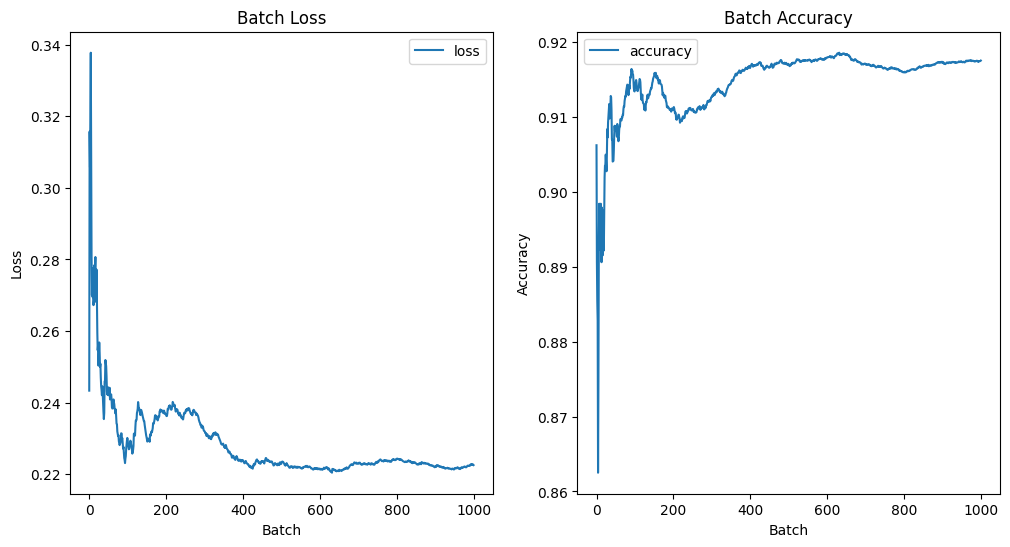

1875/1875 [==============================] - ETA: 0s - loss: 0.2237 - accuracy: 0.9168

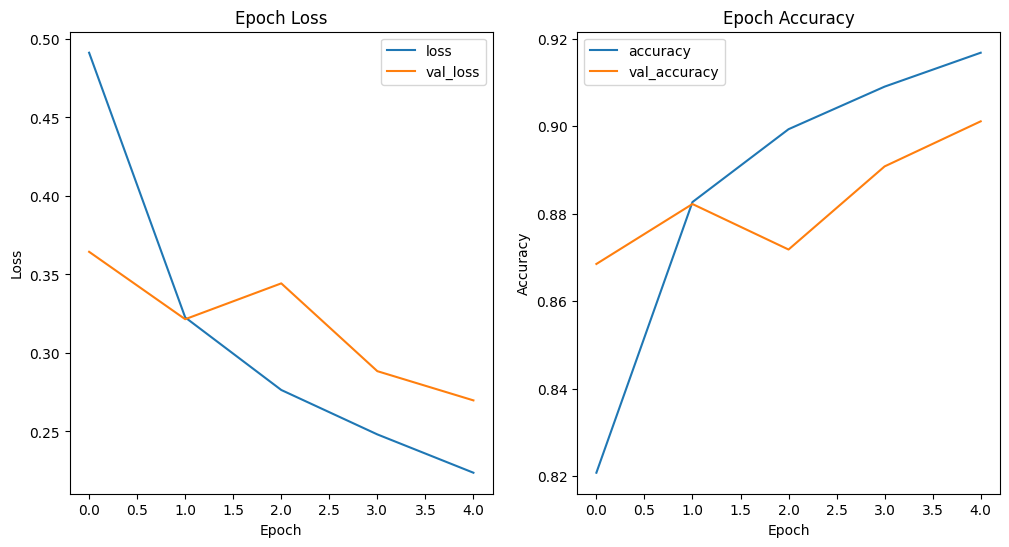

1875/1875 [==============================] - 143s 76ms/step - loss: 0.2237 - accuracy: 0.9168 - val_loss: 0.2698 - val_accuracy: 0.9011


In [8]:
# Training the model. This'll take awhile
history = model.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels), callbacks=[plot_losses])

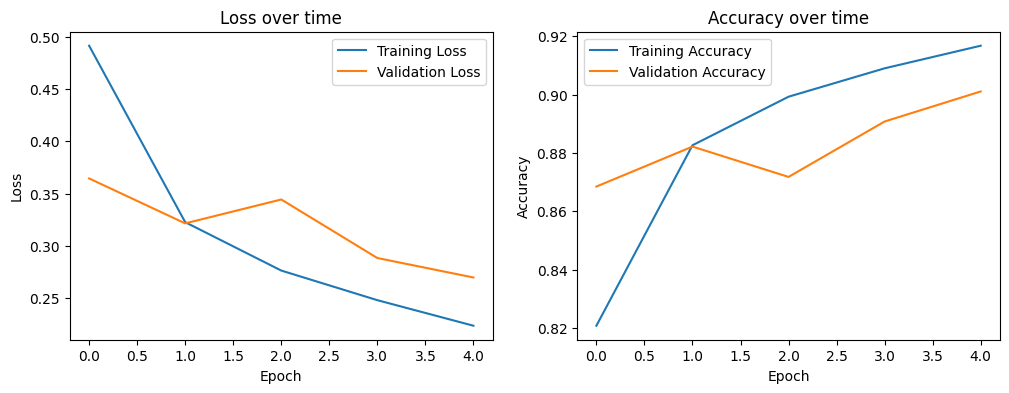

In [13]:
# Plotting training and validation accuracy per epoch
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over time')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over time')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.show()

In [10]:
# Using the model to make predictions
pred_labels = model.predict(test_images)
# get the label/index of the highest prediction score
# use np.argmax along axis=1

313/313 [==============================] - 5s 17ms/step


In [11]:
# we need to de-one hot encode the labels now
label_df = pd.DataFrame(test_labels)
label_df["labels"] = label_df.idxmax(1)
labels = label_df["labels"]

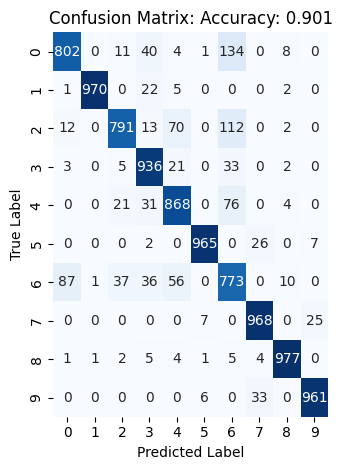

In [16]:
# Generating a confusion matrix
cm = confusion_matrix(labels, pred_labels)
acc = accuracy_score(labels, pred_labels)

plt.subplot(1, 2, 2)
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.title(f'Confusion Matrix: Accuracy: {acc:.3f}')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

plt.tight_layout()
plt.show()